# 1. Importation des données

In [4]:
 
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np 
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go
import plotly as py
from plotly import tools
from plotly.offline import iplot
df = pd.read_csv("Pakistan Largest Ecommerce Dataset.csv", parse_dates=["created_at", "Working Date"], low_memory=False)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   item_id                584524 non-null  float64       
 1   status                 584509 non-null  object        
 2   created_at             584524 non-null  datetime64[ns]
 3   sku                    584504 non-null  object        
 4   price                  584524 non-null  float64       
 5   qty_ordered            584524 non-null  float64       
 6   grand_total            584524 non-null  float64       
 7   increment_id           584524 non-null  object        
 8   category_name_1        584360 non-null  object        
 9   sales_commission_code  447349 non-null  object        
 10  discount_amount        584524 non-null  float64       
 11  payment_method         584524 non-null  object        
 12  Working Date           584524 non-null  da

## 1.2. Méthode importation depuis google Drive

### Chargement fichier CSV Annette: 

### Chargement fichier CSV CAMILLE : 

### Chargement fichier CSV THAO:

## 1.3. Nettoyage DF resumé A LANCER a la palce de 2 L'observation

In [10]:
 #suppression des lignes et des colonnes vides
df = df.dropna(axis = 1, how = 'all')                                               #Suppression des colonnes avec des valeurs manquantes
df = df.dropna(axis = 0, how = 'all')   

#traitement de la colonne "status" 
df['status'] =  df['status'].fillna(df['status'].mode()[0]) 
df.status = df.status.replace({"\\N" : "complete"})

#traitement de la colonne "category_name_1"
df.category_name_1 = df.category_name_1.replace({"\\N" : "Others"})                 #Remplacement dans la colonne category les /N par category Others
df['category_name_1'].fillna(value = "Others", inplace = True)                      #Remplacement dans la colonne category les NaN par category Others
df['sku'].fillna(value = "Others", inplace = True)                                  #Remplacement dans la colonne sku les NaN par category Others

#Remplacement dans la colonne sales_commission_code les NaN par No_code
                                 
df.sales_commission_code = df.sales_commission_code.replace({"\\N" : "No_code"})    #Remplacement dans la colonne sales_commission_code les /N par No_code
df.sales_commission_code.fillna(('No_code'), inplace = True)


#traitement de la colonne "Customer Since" et'Customer ID'
df['Customer Since'].fillna(df['Year']- df['Month'], inplace = True)                #Remplacement dans la colonne Customer Since les NaN par Year - Month
df['Customer ID']=df['Customer ID'].fillna(0)                                       #Remplacement dans la colonne Customer ID les NaN par 0

display(df.isna().sum())
display(df.head())                                                                      #Verification
#renommage des colonnes
new_col_names={" MV ":"mv",
              "category_name_1":"category_name",
              " Customer Since":"customer_since",
              "Customer ID":"customer_id",
              "BI Status":"bi_status"}
df=df.rename(new_col_names,axis=1)
# changement de types conformes
new_col_types={"item_id":"object",
              "customer_id":"object",
              "increment_id":"str",
               'qty_ordered' : 'float'}
df=df.astype(new_col_types)

#conversion des types de colonnes dates
df["created_at"]=pd.to_datetime(df["created_at"])
df["Customer Since"]=pd.to_datetime(df["Customer Since"])
#propostion de nettoyage notre DF df=df.drop(["Year", "Month", "Working Date"] axis=1) 


item_id                  0
status                   0
created_at               0
sku                      0
price                    0
qty_ordered              0
grand_total              0
increment_id             0
category_name_1          0
sales_commission_code    0
discount_amount          0
payment_method           0
Working Date             0
BI Status                0
 MV                      0
Year                     0
Month                    0
Customer Since           0
M-Y                      0
FY                       0
Customer ID              0
dtype: int64

item_id          status created_at  \
0  211131.0        complete 2016-07-01   
1  211133.0        canceled 2016-07-01   
2  211134.0        canceled 2016-07-01   
3  211135.0        complete 2016-07-01   
4  211136.0  order_refunded 2016-07-01   

                                                 sku   price  qty_ordered  \
0                                  kreations_YI 06-L  1950.0          1.0   
1  kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...   240.0          1.0   
2                                 Ego_UP0017-999-MR0  2450.0          1.0   
3                                     kcc_krone deal   360.0          1.0   
4                                        BK7010400AG   555.0          2.0   

   grand_total increment_id    category_name_1 sales_commission_code  ...  \
0       1950.0    100147443    Women's Fashion               No_code  ...   
1        240.0    100147444  Beauty & Grooming               No_code  ...   
2       2450.0    100147445    Women's Fashion               No_code  ...   
3         60.0    100147446  Beauty & Grooming           R-FSD-52352  ...   
4       1110.0    100147447            Soghaat               No_code  ...   

   payment_method Working Date BI Status      MV     Year  Month  \
0             cod   2016-07-01     #REF!   1,950   2016.0    7.0   
1             cod   2016-07-01     Gross     240   2016.0    7.0   
2             cod   2016-07-01     Gross   2,450   2016.0    7.0   
3             cod   2016-07-01       Net     360   2016.0    7.0   
4             cod   2016-07-01     Valid   1,110   2016.0    7.0   

   Customer Since     M-Y    FY Customer ID  
0          2016-7  7-2016  FY17         1.0  
1          2016-7  7-2016  FY17         2.0  
2          2016-7  7-2016  FY17         3.0  
3          2016-7  7-2016  FY17         4.0  
4          2016-7  7-2016  FY17         5.0  

[5 rows x 21 columns]

#`2. L'observation de DataFrame`

In [12]:
display(df.info())
display(df.head())
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 584524 entries, 0 to 584523
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   item_id                584524 non-null  object        
 1   status                 584524 non-null  object        
 2   created_at             584524 non-null  datetime64[ns]
 3   sku                    584524 non-null  object        
 4   price                  584524 non-null  float64       
 5   qty_ordered            584524 non-null  float64       
 6   grand_total            584524 non-null  float64       
 7   increment_id           584524 non-null  object        
 8   category_name          584524 non-null  object        
 9   sales_commission_code  584524 non-null  object        
 10  discount_amount        584524 non-null  float64       
 11  payment_method         584524 non-null  object        
 12  Working Date           584524 non-null  date

None

item_id          status created_at  \
0  211131.0        complete 2016-07-01   
1  211133.0        canceled 2016-07-01   
2  211134.0        canceled 2016-07-01   
3  211135.0        complete 2016-07-01   
4  211136.0  order_refunded 2016-07-01   

                                                 sku   price  qty_ordered  \
0                                  kreations_YI 06-L  1950.0          1.0   
1  kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...   240.0          1.0   
2                                 Ego_UP0017-999-MR0  2450.0          1.0   
3                                     kcc_krone deal   360.0          1.0   
4                                        BK7010400AG   555.0          2.0   

   grand_total increment_id      category_name sales_commission_code  ...  \
0       1950.0    100147443    Women's Fashion               No_code  ...   
1        240.0    100147444  Beauty & Grooming               No_code  ...   
2       2450.0    100147445    Women's Fashion               No_code  ...   
3         60.0    100147446  Beauty & Grooming           R-FSD-52352  ...   
4       1110.0    100147447            Soghaat               No_code  ...   

   payment_method Working Date bi_status       mv    Year  Month  \
0             cod   2016-07-01     #REF!   1,950   2016.0    7.0   
1             cod   2016-07-01     Gross     240   2016.0    7.0   
2             cod   2016-07-01     Gross   2,450   2016.0    7.0   
3             cod   2016-07-01       Net     360   2016.0    7.0   
4             cod   2016-07-01     Valid   1,110   2016.0    7.0   

   Customer Since     M-Y    FY customer_id  
0      2016-07-01  7-2016  FY17         1.0  
1      2016-07-01  7-2016  FY17         2.0  
2      2016-07-01  7-2016  FY17         3.0  
3      2016-07-01  7-2016  FY17         4.0  
4      2016-07-01  7-2016  FY17         5.0  

[5 rows x 21 columns]

price    qty_ordered   grand_total  discount_amount  \
count  5.845240e+05  584524.000000  5.845240e+05    584524.000000   
mean   6.348748e+03       1.296388  8.530619e+03       499.492775   
std    1.494927e+04       3.996061  6.132081e+04      1506.943046   
min    0.000000e+00       1.000000 -1.594000e+03      -599.500000   
25%    3.600000e+02       1.000000  9.450000e+02         0.000000   
50%    8.990000e+02       1.000000  1.960400e+03         0.000000   
75%    4.070000e+03       1.000000  6.999000e+03       160.500000   
max    1.012626e+06    1000.000000  1.788800e+07     90300.000000   

                Year          Month  
count  584524.000000  584524.000000  
mean     2017.044115       7.167654  
std         0.707355       3.486305  
min      2016.000000       1.000000  
25%      2017.000000       4.000000  
50%      2017.000000       7.000000  
75%      2018.000000      11.000000  
max      2018.000000      12.000000

## 2.1. Affichage les modalités prises par les variables, aussi appelées valeurs uniques.

In [14]:
df.columns
class color:
   BOLD = '\033[1m'
   END = '\033[0m'
print(color.BOLD +'Valeurs de SKU : '+ color.END, df['sku'].unique())
print("\n")
print(color.BOLD +'Valeurs de status : '+ color.END, df['status'].unique())
print("\n")
print(color.BOLD +'Les noms de catégory : '+ color.END, df['category_name'].unique())
print("\n")
print(color.BOLD +'Le mode de paiement: '+ color.END, df['payment_method'].unique())
print("\n")
print(color.BOLD +'BI status: '+ color.END, df['bi_status'].unique())
print("\n")
print(color.BOLD +'MV: '+ color.END, df['mv'].unique())
print("\n")
print(color.BOLD +'Le client à partir de : '+ color.END, df['Customer Since'].unique())
print("\n")
print(color.BOLD +'Financement year : '+ color.END, df['FY'].unique())
print("\n")
df.columns



Valeurs de SKU :  ['kreations_YI 06-L'
 'kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Body Spray Free'
 'Ego_UP0017-999-MR0' ... 'WOFVAL59D5EA84167F9-M' 'WOFNIG5B4D7EB0E9FDD-L'
 'WOFSCE5AE00357AECDE']


Valeurs de status :  ['complete' 'canceled' 'order_refunded' 'received' 'refund' 'closed'
 'fraud' 'holded' 'exchange' 'pending_paypal' 'paid' 'cod' 'pending'
 'processing' 'payment_review']


Les noms de catégory :  ["Women's Fashion" 'Beauty & Grooming' 'Soghaat' 'Mobiles & Tablets'
 'Appliances' 'Home & Living' "Men's Fashion" 'Kids & Baby' 'Others'
 'Entertainment' 'Computing' 'Superstore' 'Health & Sports' 'Books'
 'School & Education']


Le mode de paiement:  ['cod' 'ublcreditcard' 'mygateway' 'customercredit' 'cashatdoorstep'
 'mcblite' 'internetbanking' 'marketingexpense' 'productcredit'
 'financesettlement' 'Payaxis' 'jazzvoucher' 'jazzwallet' 'Easypay'
 'Easypay_MA' 'easypay_voucher' 'bankalfalah' 'apg']


BI status:  ['#REF!' 'Gross' 'Net' 'Valid']


MV:  [' 1,950 ' ' 240 ' ' 

Index(['item_id', 'status', 'created_at', 'sku', 'price', 'qty_ordered',
       'grand_total', 'increment_id', 'category_name', 'sales_commission_code',
       'discount_amount', 'payment_method', 'Working Date', 'bi_status', 'mv',
       'Year', 'Month', 'Customer Since', 'M-Y', 'FY', 'customer_id'],
      dtype='object')

## 2.2. Observation des valeurs manquantes

In [7]:
df.isnull().sum(axis = 0)  # Vérification des valeurs manquantes pour chaque colonne


item_id                   464051
status                    464066
created_at                464051
sku                       464071
price                     464051
qty_ordered               464051
grand_total               464051
increment_id              464051
category_name_1           464215
sales_commission_code     601226
discount_amount           464051
payment_method            464051
Working Date              464051
BI Status                 464051
 MV                       464051
Year                      464051
Month                     464051
Customer Since            464062
M-Y                       464051
FY                        464051
Customer ID               464062
Unnamed: 21              1048575
Unnamed: 22              1048575
Unnamed: 23              1048575
Unnamed: 24              1048575
Unnamed: 25              1048575
dtype: int64

Il y a beaucoup de valeurs manquantes. Les 5 dernières colonnes sont vides 

Les colonnes 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', Unnamed: 25' sont vides 

In [8]:
#en %
nans=df.isna().sum(axis=0)/1048575*100
nans


item_id                   44.255394
status                    44.256825
created_at                44.255394
sku                       44.257302
price                     44.255394
qty_ordered               44.255394
grand_total               44.255394
increment_id              44.255394
category_name_1           44.271034
sales_commission_code     57.337434
discount_amount           44.255394
payment_method            44.255394
Working Date              44.255394
BI Status                 44.255394
 MV                       44.255394
Year                      44.255394
Month                     44.255394
Customer Since            44.256443
M-Y                       44.255394
FY                        44.255394
Customer ID               44.256443
Unnamed: 21              100.000000
Unnamed: 22              100.000000
Unnamed: 23              100.000000
Unnamed: 24              100.000000
Unnamed: 25              100.000000
dtype: float64

## 2.3. Suppression des colonnes avec des valeurs manquantes

In [13]:
#suppression des lignes et des colonnes vides
df = df.dropna(axis = 1, how = 'all')                                               #Suppression des colonnes avec des valeurs manquantes
df = df.dropna(axis = 0, how = 'all')                                               #Suppression des lignes avec des valeurs manquantes

#traitement de la colonne "status" 
df['status'] =  df['status'].fillna(df['status'].mode()[0]) 
df.status = df.status.replace({"\\N" : "complete"})

#traitement de la colonne "category_name_1"
df.category_name= df.category_name.replace({"\\N" : "Others"})                 #Remplacement dans la colonne category les /N par category Others
df['category_name'].fillna(value = "Others", inplace = True)                      #Remplacement dans la colonne category les NaN par category Others
df['sku'].fillna(value = "Others", inplace = True)                                  #Remplacement dans la colonne sku les NaN par category Others

#Remplacement dans la colonne sales_commission_code les NaN par No_code
                                 
df.sales_commission_code = df.sales_commission_code.replace({"\\N" : "No_code"})    #Remplacement dans la colonne sales_commission_code les /N par No_code
df.sales_commission_code.fillna(('No_code'), inplace = True)


#traitement de la colonne "Customer Since" et'Customer ID'
df['customer_since'].fillna(df['Year']- df['Month'], inplace = True)                #Remplacement dans la colonne Customer Since les NaN par Year - Month
df['customer_id']=df['customer_id'].fillna(0)                                       #Remplacement dans la colonne Customer ID les NaN par 0

display(df.isna().sum())
display(df.head())                                                                      #Verification

KeyError: 'customer_since'

## 2.4. Analyse des colonnes dates 

In [145]:
#création d'un df_date pour manipuler et visualiser plus facilement le df 
df_date=df[["created_at","Working Date","Year","Month","Customer Since","M-Y","FY"]]
df_date.head()

created_at Working Date    Year  Month Customer Since     M-Y    FY
0 2016-07-01   2016-07-01  2016.0    7.0     2016-07-01  7-2016  FY17
1 2016-07-01   2016-07-01  2016.0    7.0     2016-07-01  7-2016  FY17
2 2016-07-01   2016-07-01  2016.0    7.0     2016-07-01  7-2016  FY17
3 2016-07-01   2016-07-01  2016.0    7.0     2016-07-01  7-2016  FY17
4 2016-07-01   2016-07-01  2016.0    7.0     2016-07-01  7-2016  FY17

In [147]:
#visualisation des lignes dont "created_at" et "Working date" sont différentes
df_date[df_date["created_at"]!=df_date["Working Date"]]


Empty DataFrame
Columns: [created_at, Working Date, Year, Month, Customer Since, M-Y, FY]
Index: []

In [148]:
#aucune lignes ne s'affiche, les colonnes sont identiques, nous pouvons en supprimer une
# Working Date sera la référence, 
df_date=df_date.drop("Working Date",axis=1)

In [24]:
df['Year'] = df['Year'].astype(int)  
df['Month'] = df['Month'].astype(int) 


#visualisation de différence entre "created_at" et "Year"
#conversion en un nombre entier pour supprimer le .0

df_date['Year'] = df_date['Year'].astype(int)

#récupération de l'année de "created_at" puis comparaison à "Year"

df_date['created_at_year'] = df_date['created_at'].apply(lambda date: date.split('/')[2]).astype(int)
df_date[df_date["created_at_year"]!=df_date["Year"]]


# aucune ligne n'apparait, Year n'est que l'année de created_at, cette colonne peut être supprimée
df_date=df_date.drop("Year",axis=1)
df_date=df_date.drop("created_at_year",axis=1)


#visualisation de différence entre "created_at" et "Month"
#conversion en un nombre entier pour supprimer le .0
df_date['Month'] = df_date['Month'].astype("int")
#récupération du mois de "created_at" puis comparaison à "Month"
df_date['created_at_month'] = df_date['created_at'].apply(lambda date: date.split('/')[0]).astype(int)
df_date[df_date["created_at_month"]!=df_date["Month"]]

# aucune ligne n'apparait, Month n'est que le mois de "created_at", cette colonne peut être supprimée
df_date=df_date.drop("Month", axis=1)
df_date=df_date.drop("created_at_month", axis=1)


# Customer since ne comporte pas le jour de la date, est que ce created at a d'autre jour que 1

df_date["jour_created_at"]=df_date["created_at"].apply(lambda date: date.split('/')[1]).astype(int)
df_date[df_date["jour_created_at"]!=1]
# il existe des dates avec comme jour autre chose que différents de 1 pour created_at

df_date=df_date.drop("jour_created_at",axis=1)

In [151]:
df_date[df_date["Customer Since"]!=df_date["M-Y"]]
#les colonnes ont 275087 ligne qui sont differents

created_at    Year  Month Customer Since     M-Y    FY
8840   2016-08-01  2016.0    8.0     2016-07-01  8-2016  FY17
8848   2016-08-01  2016.0    8.0     2016-07-01  8-2016  FY17
8850   2016-08-01  2016.0    8.0     2016-07-01  8-2016  FY17
8851   2016-08-01  2016.0    8.0     2016-07-01  8-2016  FY17
8852   2016-08-01  2016.0    8.0     2016-07-01  8-2016  FY17
...           ...     ...    ...            ...     ...   ...
584515 2018-08-28  2018.0    8.0     2018-06-01  8-2018  FY19
584516 2018-08-28  2018.0    8.0     2016-09-01  8-2018  FY19
584521 2018-08-28  2018.0    8.0     2018-07-01  8-2018  FY19
584522 2018-08-28  2018.0    8.0     2018-07-01  8-2018  FY19
584523 2018-08-28  2018.0    8.0     2018-07-01  8-2018  FY19

[275087 rows x 6 columns]

In [11]:
#created at et customer since ne sont pas les mêmes, voir dernières dates du derniers indices
#created at semble identique à M-Y
df_date["created_at_M-Y"]=df_date['created_at'].apply(lambda date: str(date.split('/')[0])+"-"+str(date.split('/')[2]))
df_date[df_date["M-Y"]!=df_date["created_at_M-Y"]]

AttributeError: 'Timestamp' object has no attribute 'split'

In [ ]:
df_date=df_date.drop("created_at_M-Y",axis=1)

In [152]:
df_date.head()
#les colonnes avec information utiles sont

created_at    Year  Month Customer Since     M-Y    FY
0 2016-07-01  2016.0    7.0     2016-07-01  7-2016  FY17
1 2016-07-01  2016.0    7.0     2016-07-01  7-2016  FY17
2 2016-07-01  2016.0    7.0     2016-07-01  7-2016  FY17
3 2016-07-01  2016.0    7.0     2016-07-01  7-2016  FY17
4 2016-07-01  2016.0    7.0     2016-07-01  7-2016  FY17

Conclusion colonnes dates

In [157]:
#conversion des types de colonnes dates
df["created_at"]=pd.to_datetime(df["created_at"])
df["customer_since"]=pd.to_datetime(df["customer_since"])
#propostion de nettoyage notre DF df=df.drop(["Year", "Month", "Working Date"] axis=1) 


## 2.5 Suppression et changement de types

In [159]:
#renommage des colonnes
new_col_names={" MV ":"mv",
              "category_name_1": "category_name",
              "Customer Since":"customer_since",
              "Customer ID":"customer_id",
              "BI Status":"bi_status"}
df=df.rename(new_col_names,axis=1)
# changement de types conformes
new_col_types={"item_id":"object",
              "customer_id":"object",
              "increment_id":"str",
               'qty_ordered' : 'float'}
df=df.astype(new_col_types)

# 3.VARIABLES "CHIFFRES D'AFFAIRE", "STATUTS" DF_2


In [160]:
#suppression des colonnes dates redondantes
df_2=df.drop(["Working Date","Month"],1)

#nouvelles colonnes prix pour calculer le cout total de la ligne avec et sans discount
df_2["total_price_wo_disc"]=df_2.qty_ordered*df_2.price
df_2["total_price_wt_disc"]=df_2.qty_ordered*df_2.price-df_2.discount_amount
#harmonisation des status des commandes
df_2['status'] = df_2.status.replace({'complete': 'completed',
                               'received': 'completed',
                               'cod': 'completed',
                               'paid': 'completed',
                               'closed': 'completed',
                               'exchange': 'canceled',
                               'canceled': 'canceled',
                               'order_refunded': 'canceled',
                               'refund': 'canceled',
                               'fraud': 'canceled',
                               'payment_review': 'canceled',
                               'pending': 'canceled',
                               'processing': 'canceled',
                               'holded': 'canceled',
                               'pending_paypal': 'canceled'})

# selection des commandes uniquement completed
df_2=df_2[df_2.status=='completed']
df_2.shape #Nous avons 315 506 lignes des commandes en status completed 


C:\Users\Thao TO\AppData\Local\Temp\ipykernel_18536\1688287505.py:2: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



(315506, 21)

In [161]:
## création du dataframe order pour reconstituer les factures
#fonction pour compter le nombre de références différences
nb_products = lambda sku: len(np.unique(sku))
# création des différentes colonnes
functions_to_apply = {'qty_ordered':'sum',                  #nb de produits total dans la factures
                      'sku': nb_products,                   #nb de référence différentes
                     'discount_amount':['min','max',"sum"], #différent calcul de discount
                     'grand_total':"max",                   # pour vérification
                     'total_price_wo_disc':'sum',           # prix total de la facture sans discount
                     'total_price_wt_disc':'sum',
                     "status":"unique"}           # prix total de la facture avec discount
order=df_2.groupby("increment_id").agg(functions_to_apply).reset_index()
#renommage des colonnes pour supprimer le double index
order.columns=["increment_id","total_qty","nb_sku","disc_min","disc_max","disc_sum","gd_total",
              'total_order_wo_disc','total_order_wt_disc',"status"]

#Nous avons 206827 factures unique 

In [162]:
# recuperation des increment id dont le disc min= discount max 
#c.à.d. le discount est commun à toute la facture et non individualisé par ligne
ls=order[(order.disc_sum!=0)&(order.nb_sku>1)&(order.disc_max==order.disc_min)].increment_id.values
ls
df_2=df_2[~df_2.increment_id.isin(ls)] #suppretion des ligne ou le discount est sur la totalité de la facture 
#suppression de la colonne grand total
df_2=df_2.drop("grand_total",1)
df_2.shape
#après la suppretion des lignes avec discount sur la totalité de la factures nous avons le Data frame de 300 810 lignes

df_2.total_price_wt_disc = df_2.total_price_wt_disc/100 #convertion en USD


C:\Users\Thao TO\AppData\Local\Temp\ipykernel_18536\3207207198.py:7: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.



In [163]:
df_2.isnull().sum(axis = 0)

item_id                  0
status                   0
created_at               0
sku                      0
price                    0
qty_ordered              0
increment_id             0
category_name            0
sales_commission_code    0
discount_amount          0
payment_method           0
bi_status                0
mv                       0
Year                     0
customer_since           0
M-Y                      0
FY                       0
customer_id              0
total_price_wo_disc      0
total_price_wt_disc      0
dtype: int64

# 4.DATAVIZ

## 4.1 Distribution des chiffres d'affaires, Relation entre la catégorie et le quantité de vente

4.1.1. Verification des valeurs aberantes

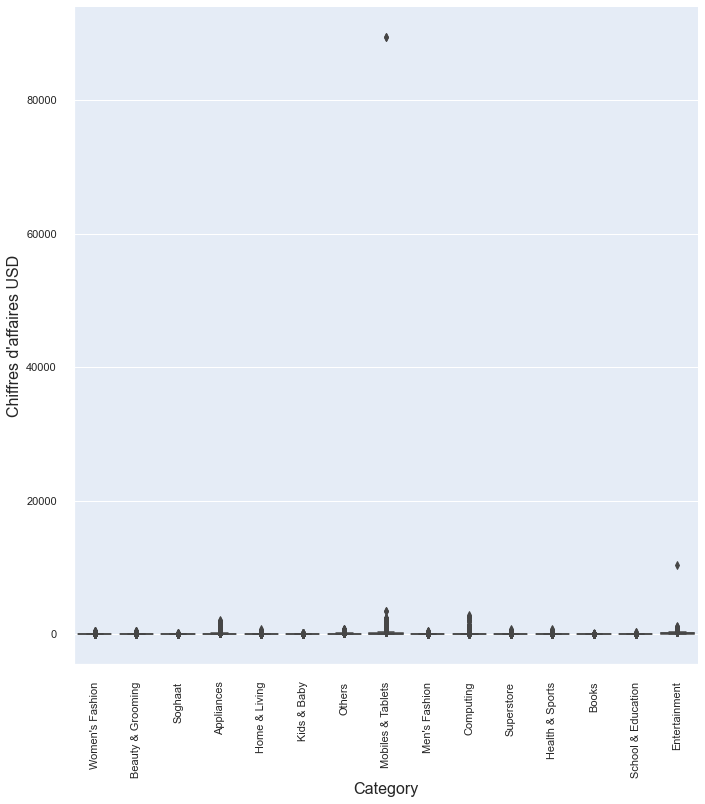

In [164]:
sns.catplot(x='category_name', y='total_price_wt_disc', data= df_2, kind='box', height=10, aspect=5/5) #verification les valeurs aberantes
plt.xticks(rotation=90)
plt.xlabel('Category', fontsize=16)
plt.ylabel("Chiffres d'affaires USD", fontsize=16);

Nous avons des valeurs aberante dans la catégorie Mobile qui peuvent influencer sur notre future analise

In [166]:
df_2[df_2.total_price_wt_disc>=10000]

item_id     status created_at                      sku    price  \
190608  451416.0  completed 2017-04-20          Samsung_40K5000  49499.0   
240078  508368.0  completed 2017-06-09       IDROID_BALRX7-Gold   8944.0   
240079  508369.0  completed 2017-06-09  IDROID_BALRX7-Jet black   8944.0   

        qty_ordered increment_id      category_name sales_commission_code  \
190608         21.0    100296055      Entertainment          R-KHS-103986   
240078       1000.0    100323649  Mobiles & Tablets               No_code   
240079       1000.0    100323649  Mobiles & Tablets               No_code   

        discount_amount  payment_method bi_status           mv    Year  \
190608              0.0  cashatdoorstep       Net   1,039,479   2017.0   
240078              0.0     jazzvoucher       Net   8,944,000   2017.0   
240079              0.0     jazzvoucher       Net   8,944,000   2017.0   

       customer_since     M-Y    FY customer_id  total_price_wo_disc  \
190608     2017-04-01  4-2017  FY17     42128.0            1039479.0   
240078     2017-06-01  6-2017  FY17     50387.0            8944000.0   
240079     2017-06-01  6-2017  FY17     50387.0            8944000.0   

        total_price_wt_disc  
190608             10394.79  
240078             89440.00  
240079             89440.00

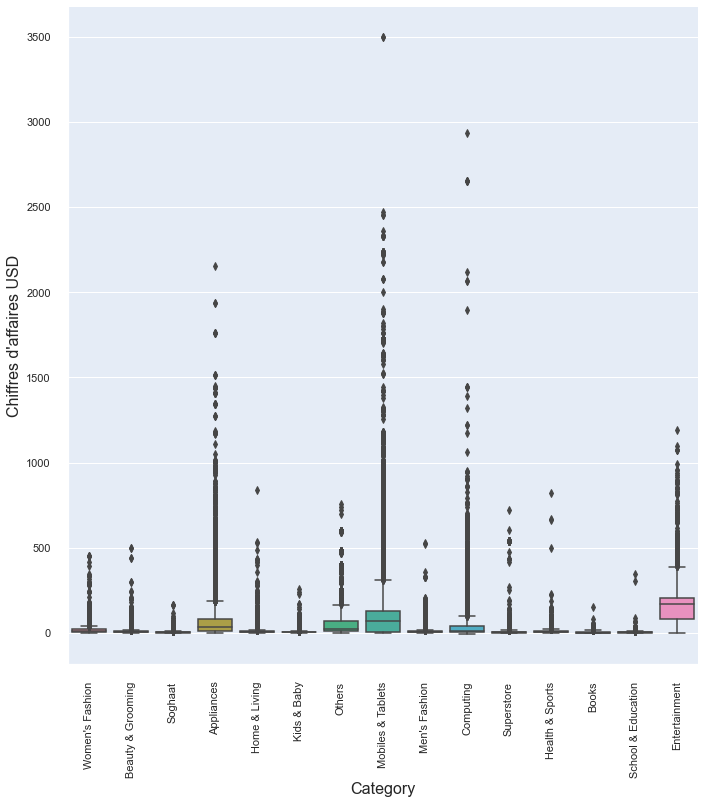

In [167]:
df_2=df_2.drop(df_2[df_2.total_price_wt_disc >= 10000].index,axis=0) #suppretion des valeurs aberantes

sns.catplot(x='category_name', y='total_price_wt_disc', data=df_2, kind='box', height=10, aspect=5/5) #verification les valeurs aberantes
plt.xticks(rotation=90)
plt.xlabel('Category', fontsize=16)
plt.ylabel("Chiffres d'affaires USD", fontsize=16);

Nous avons des valeurs aberante dans la catégorie Mobile qui peuvent influencer sur notre future analise

### 5.1.2. Visualisation des top des ventes

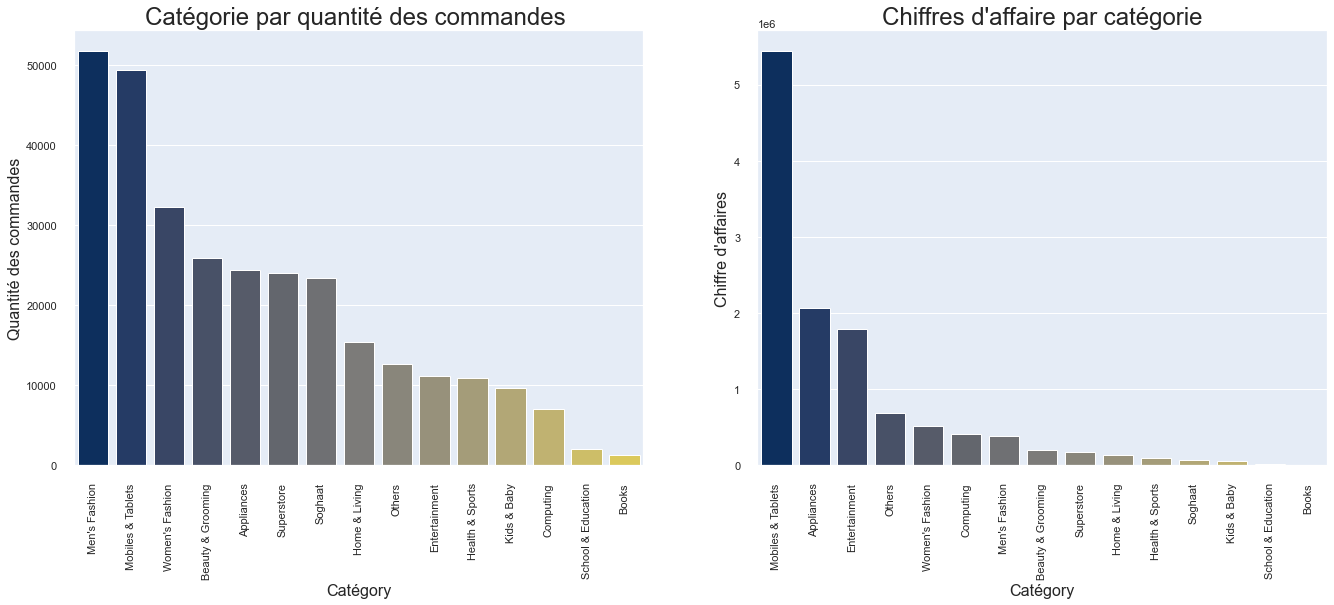

In [168]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
plt.figure(figsize=(20, 8))
plt.subplot(121)
plt.title(label='Catégorie par quantité des commandes ', fontsize=24)
sns.countplot(x="category_name", data=df_2, palette="cividis", order = df_2.category_name.value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Catégory', fontsize=16)
plt.ylabel('Quantité des commandes', fontsize=16)

           
plt.subplot(122)

category_CA = df_2['total_price_wt_disc'].groupby(df_2['category_name']).agg('sum').sort_values(ascending=True)


plt.title(label="Chiffres d'affaire par catégorie", fontsize=24)

order_list = list(category_CA.sort_values(ascending=False).index)
sns.barplot(y=category_CA.values, x=category_CA.index, order=order_list, palette='cividis')
plt.xlabel('Catégory', fontsize=16)
plt.ylabel("Chiffre d'affaires", fontsize=16)

plt.xticks(rotation=90);

In [169]:
# Meilleur vente
cat =df_2.groupby('category_name')
hpc= cat['price'].agg(np.sum)
bsc= cat['qty_ordered'].agg(np.sum)
bca = cat['total_price_wt_disc'].agg(np.sum)

print("Meilleur vente par Quantité\n", bsc)
print('\n')
print("Meilleur vente par Category\n", bca)

Meilleur vente par Quantité
 category_name
Appliances            26823.0
Beauty & Grooming     32939.0
Books                  1793.0
Computing              7541.0
Entertainment         11516.0
Health & Sports       13267.0
Home & Living         17244.0
Kids & Baby           10698.0
Men's Fashion         56093.0
Mobiles & Tablets     53051.0
Others                29979.0
School & Education     2413.0
Soghaat               30551.0
Superstore            43596.0
Women's Fashion       34785.0
Name: qty_ordered, dtype: float64


Meilleur vente par Category
 category_name
Appliances            2.068090e+06
Beauty & Grooming     1.965090e+05
Books                 5.758731e+03
Computing             4.027085e+05
Entertainment         1.794082e+06
Health & Sports       8.873079e+04
Home & Living         1.267501e+05
Kids & Baby           5.386752e+04
Men's Fashion         3.882926e+05
Mobiles & Tablets     5.440701e+06
Others                6.896185e+05
School & Education    9.582958e+03
Soghaat 

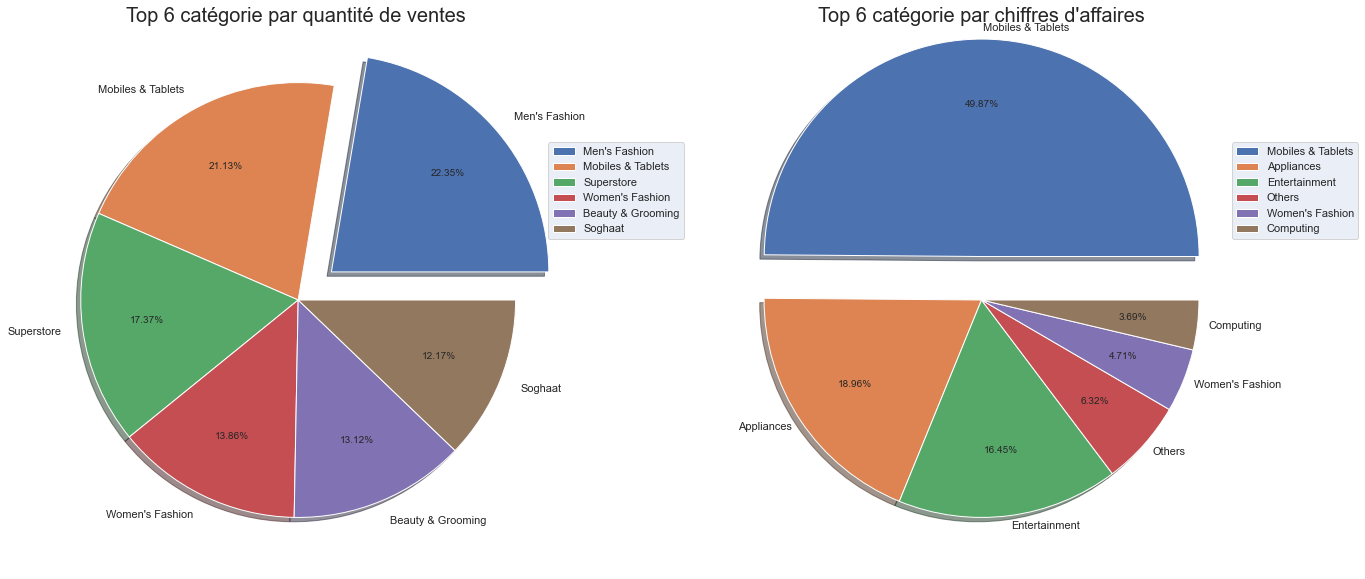

In [170]:
top_qty = bsc.sort_values(ascending=False).head(6)
top_qty
top_ca = bca.sort_values(ascending=False).head(6)
plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.pie(x=top_qty.values, labels = top_qty.index, 
        explode = [0.2, 0, 0, 0, 0, 0],
           autopct = lambda x: str(round(x, 2)) + '%',
           pctdistance = 0.7, labeldistance = 1.1,
           shadow = True)
plt.title(label='Top 6 catégorie par quantité de ventes ', fontsize=20)
           
plt.legend(loc="upper left", bbox_to_anchor=(0.95, 0.8));

plt.subplot(122)
plt.pie(x=top_ca.values, labels = top_ca.index, 
        explode = [0.2, 0, 0, 0, 0, 0],
           autopct = lambda x: str(round(x, 2)) + '%',
           pctdistance = 0.7, labeldistance = 1.05,
           shadow = True)
plt.title(label="Top 6 catégorie par chiffres d'affaires", fontsize=20)
           
plt.legend(loc="upper left", bbox_to_anchor=(0.95, 0.8));
# Top 5 des articles les plus vendus sont "Mobiles & Tablets", "Men's Fashion" , "Others", "Superstore", "Women's Fashion"

La catégorie Mobile et Tablets est nettement en tête de vente par la quantité des commandes  et par les chiffres d'affaires. Par contre après on peux voir le décalage par exemple la catégorie Men's fashion est en 2 place par quantité et en 7 par CA.

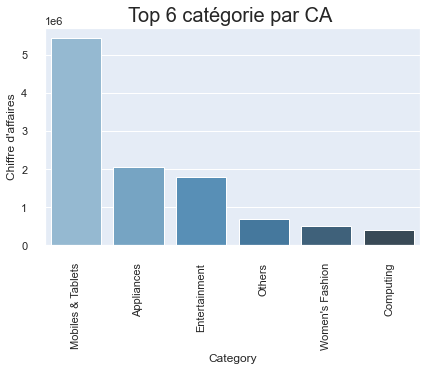

In [171]:
category_CA2 = df_2['total_price_wt_disc'].groupby(df_2['category_name']).agg('sum').sort_values(ascending=False).head(6)

sns.barplot(x=category_CA2.index, y=category_CA2.values,  palette='Blues_d')
plt.title(label='Top 6 catégorie par CA ', fontsize=20)
plt.xlabel('Category', fontsize=12)
plt.ylabel("Chiffre d'affaires", fontsize=12)

plt.xticks(rotation=90);

### 5.1.3. Analyse des liaisons entre les variables 



Catégorie et Chifre d'affaires (total_price_wt_disc)


In [172]:
import statsmodels.api 
result = statsmodels.formula.api.ols('total_price_wt_disc ~ category_name', data=df_2).fit()
table = statsmodels.api.stats.anova_lm(result)
table

df        sum_sq       mean_sq            F  PR(>F)
category_name      14.0  6.608654e+08  4.720467e+07  5624.790634     0.0
Residual       300792.0  2.524323e+09  8.392254e+03          NaN     NaN

Catégorie et la quantité vendu (qty_ordered)

In [173]:
# Analyse des liaisons entre variable Catégorie et la quantité vendu (qty_ordered)
result = statsmodels.formula.api.ols('qty_ordered ~ category_name', data=df).fit()
table = statsmodels.api.stats.anova_lm(result)
table

df        sum_sq      mean_sq           F  PR(>F)
category_name      14.0  9.164287e+04  6545.919064  413.981625     0.0
Residual       584509.0  9.242315e+06    15.812101         NaN     NaN

P-value < 5% nous confirme les modalités testées ont un effet statistique significatif sur la variable cible.

### 5.1.4. Evolution des ventes

Les données proposées dans ce DF s'étalent de juillet 2016 à Août 2018. Il n’y a donc 1 année calandaire complète 2017 et  2 années fiscales 2017 et 2018 qui sont  complètes. L’année 2018 (FY 2019) est intéressante pour l'analyse car on peut observer les tendances. 




In [174]:
df_2["FY"].value_counts()
year = df_2['total_price_wt_disc'].groupby(df_2["created_at"].dt.year).agg('sum').sort_values(ascending=False) #analyse de CA par l'année
year.index

Int64Index([2017, 2018, 2016], dtype='int64', name='created_at')

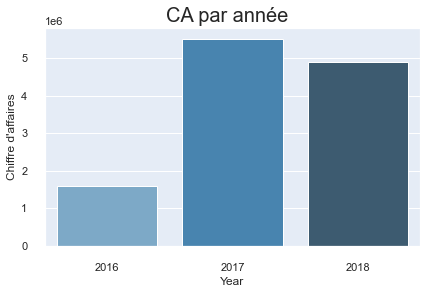

In [175]:
sns.barplot(x=year.index, y=year.values,  palette='Blues_d')
plt.title(label='CA par année  ', fontsize=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel("Chiffre d'affaires", fontsize=12);

In [176]:
df_2["FY"].value_counts()
FY = df_2['total_price_wt_disc'].groupby(df_2["FY"]).agg('sum').sort_values(ascending=False) #analyse de CA par FY
FY

FY
FY18    8.416395e+06
FY17    3.122418e+06
FY19    4.803027e+05
Name: total_price_wt_disc, dtype: float64

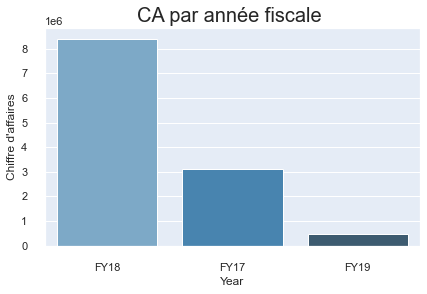

In [177]:
sns.barplot(x=FY.index, y=FY.values,  palette='Blues_d')
plt.title(label='CA par année fiscale ', fontsize=20)
plt.xlabel('Year', fontsize=12)
plt.ylabel("Chiffre d'affaires", fontsize=12);

On peut voir que de mois de l'année FY 2019 ne sont pas suffisants pour la comparaison. Par contre en se basant sur l'année calendaire on remarque l'évolution des ventes en 2017 qui continue en 2018 car que en 8 mois les chiffres d'affaires en 2018 ont déjà presque le même niveau que sur 12 mois en 2017. 

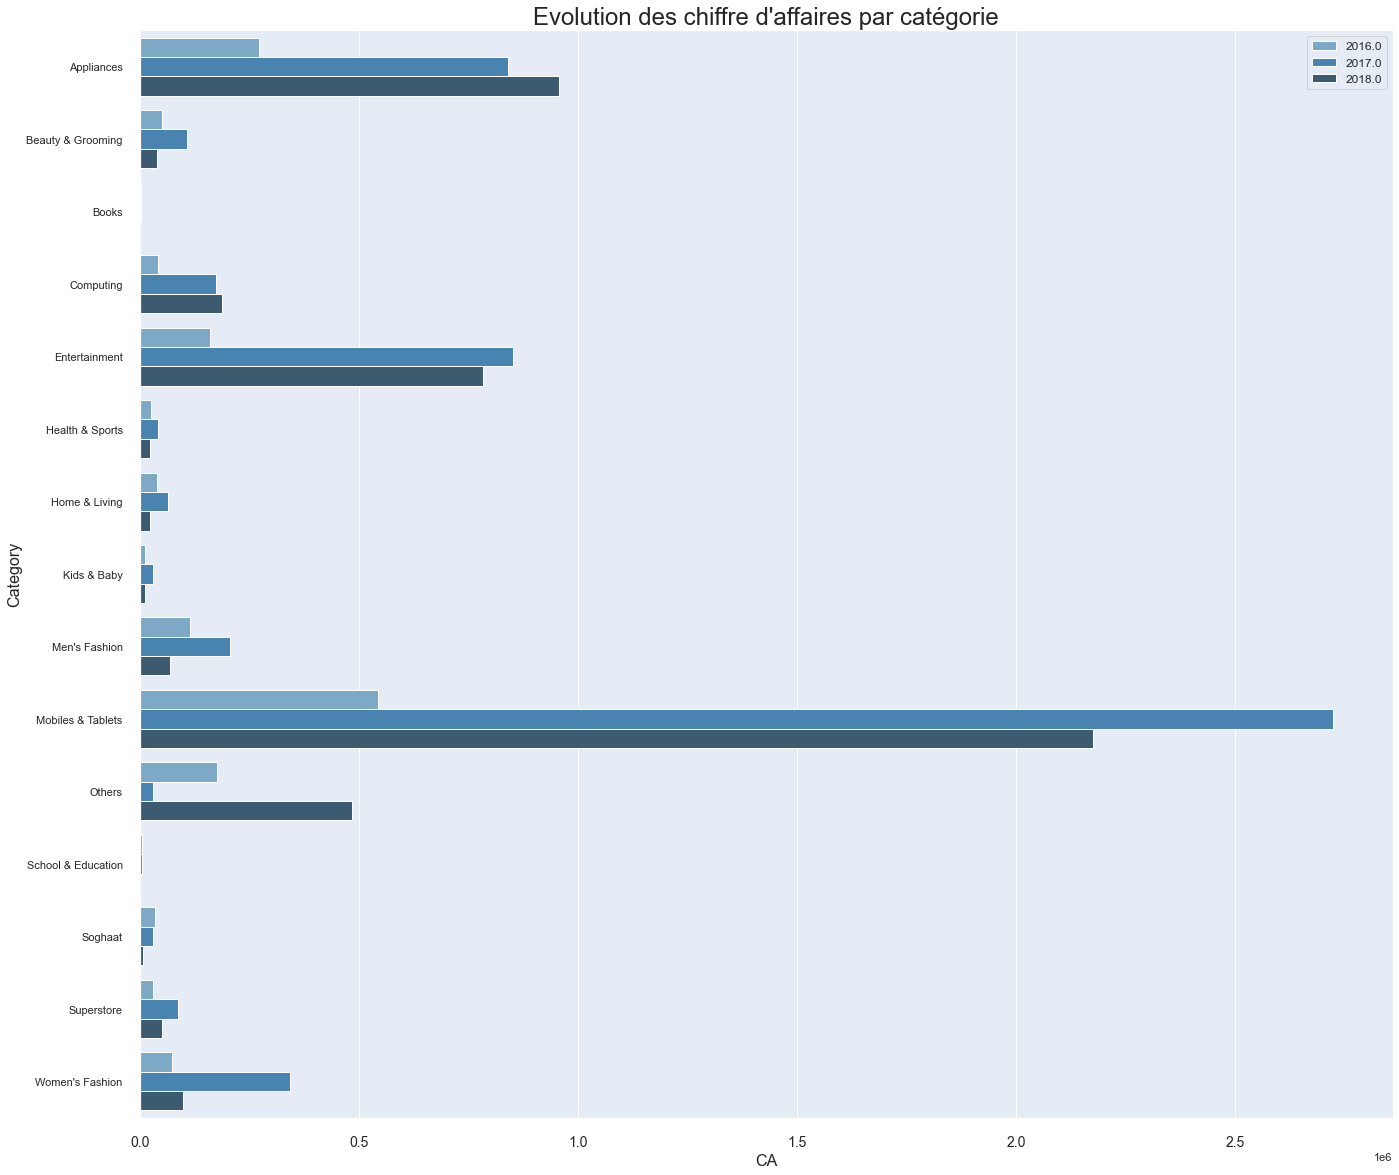

In [178]:
plt.figure(figsize=(20, 20))
CA_cat=df_2.groupby(['category_name' , 'Year'])['total_price_wt_disc'].sum().reset_index()
sns.barplot(x='total_price_wt_disc', y='category_name', data = CA_cat, palette='Blues_d', hue='Year')
plt.title(label="Evolution des chiffre d'affaires par catégorie", fontsize=24)
plt.xlabel('CA', fontsize=16)
plt.ylabel('Category', fontsize=16)
plt.xticks(fontsize=14)
plt.legend(loc='best', fontsize = 'large');


In [179]:
display(CA_cat)

category_name    Year  total_price_wt_disc
0           Appliances  2016.0         2.710776e+05
1           Appliances  2017.0         8.408354e+05
2           Appliances  2018.0         9.561770e+05
3    Beauty & Grooming  2016.0         5.006246e+04
4    Beauty & Grooming  2017.0         1.074353e+05
5    Beauty & Grooming  2018.0         3.901121e+04
6                Books  2016.0         2.893463e+03
7                Books  2017.0         1.784497e+03
8                Books  2018.0         1.080770e+03
9            Computing  2016.0         4.056395e+04
10           Computing  2017.0         1.749258e+05
11           Computing  2018.0         1.872187e+05
12       Entertainment  2016.0         1.609313e+05
13       Entertainment  2017.0         8.507165e+05
14       Entertainment  2018.0         7.824339e+05
15     Health & Sports  2016.0         2.528478e+04
16     Health & Sports  2017.0         4.115723e+04
17     Health & Sports  2018.0         2.228878e+04
18       Home & Living  2016.0         3.972332e+04
19       Home & Living  2017.0         6.390969e+04
20       Home & Living  2018.0         2.311713e+04
21         Kids & Baby  2016.0         1.270478e+04
22         Kids & Baby  2017.0         2.920574e+04
23         Kids & Baby  2018.0         1.195701e+04
24       Men's Fashion  2016.0         1.142236e+05
25       Men's Fashion  2017.0         2.051289e+05
26       Men's Fashion  2018.0         6.894010e+04
27   Mobiles & Tablets  2016.0         5.425927e+05
28   Mobiles & Tablets  2017.0         2.723314e+06
29   Mobiles & Tablets  2018.0         2.174794e+06
30              Others  2016.0         1.759094e+05
31              Others  2017.0         2.896236e+04
32              Others  2018.0         4.847468e+05
33  School & Education  2016.0         4.143294e+03
34  School & Education  2017.0         3.998713e+03
35  School & Education  2018.0         1.440950e+03
36             Soghaat  2016.0         3.543532e+04
37             Soghaat  2017.0         3.090208e+04
38             Soghaat  2018.0         6.195369e+03
39          Superstore  2016.0         3.114479e+04
40          Superstore  2017.0         8.614987e+04
41          Superstore  2018.0         5.083422e+04
42     Women's Fashion  2016.0         7.245538e+04
43     Women's Fashion  2017.0         3.434894e+05
44     Women's Fashion  2018.0         9.781757e+04

Les catégories qui rapportent le plus de chiffres sont Mobiles&Tabletes, Computing, Entrainemet et Appliance et il ya une évolution d'une année à l'autre.

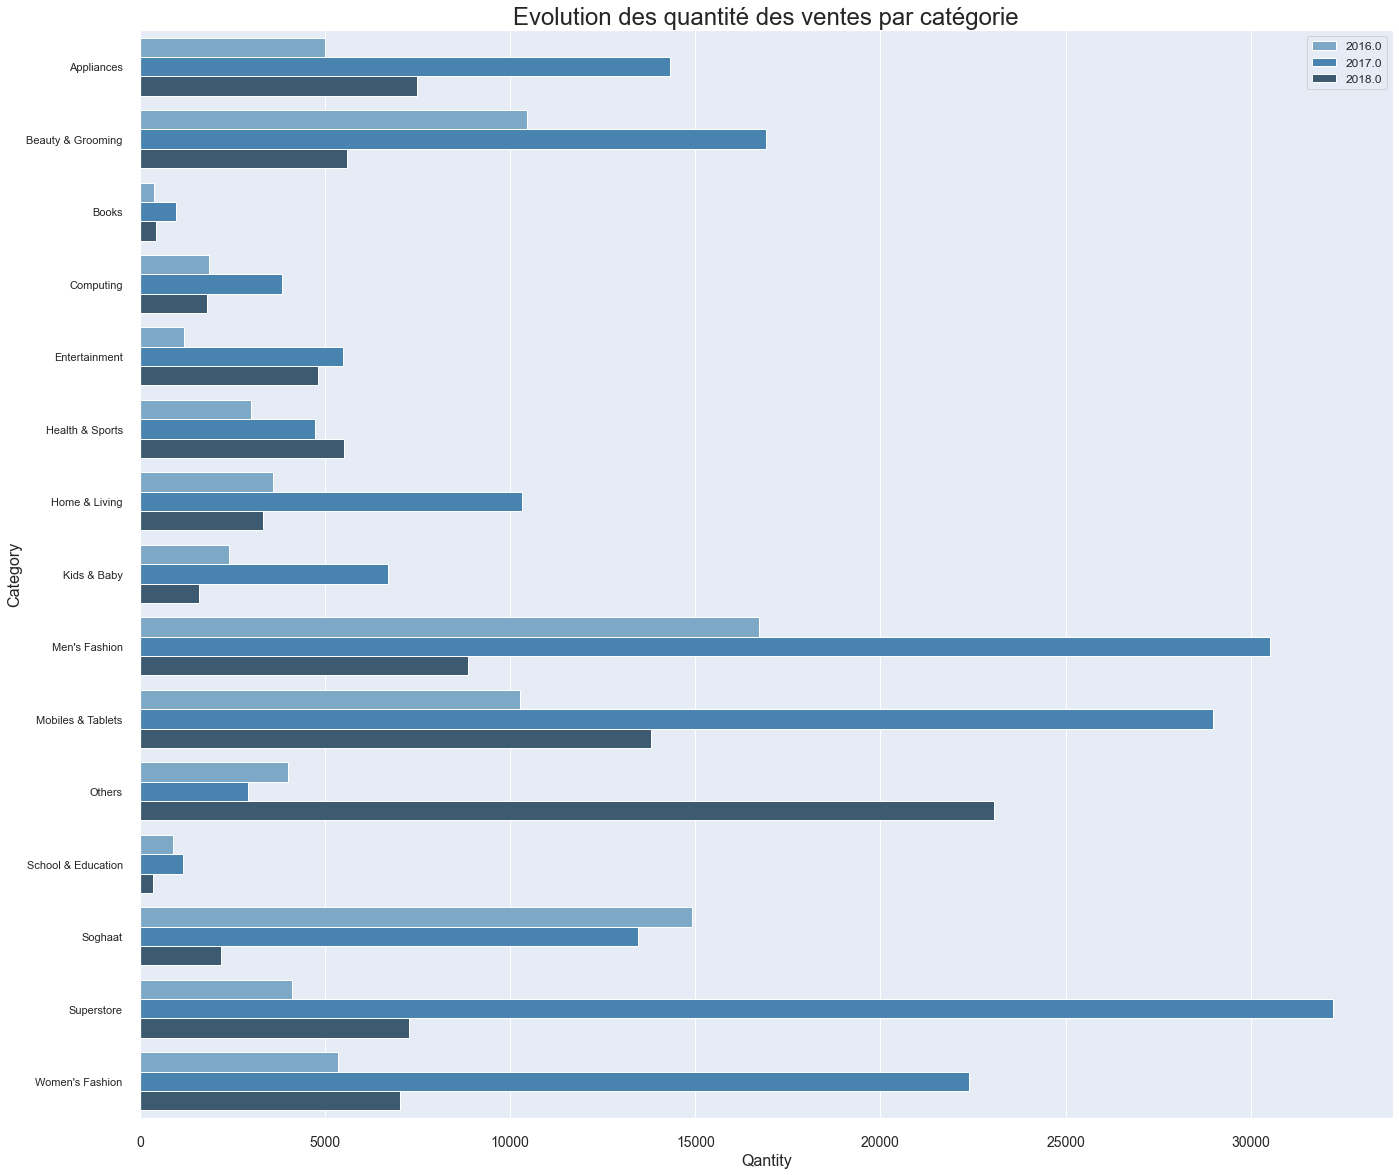

In [180]:
# évolution des quantité des ventes par catégorie
plt.figure(figsize=(20, 20))
anne = df_2["created_at"].dt.year
CA_cat=df_2.groupby(['category_name' , 'Year'])['qty_ordered'].sum().reset_index()
sns.barplot(x='qty_ordered', y='category_name', data = CA_cat, palette='Blues_d', hue='Year')
plt.title(label="Evolution des quantité des ventes par catégorie", fontsize=24)
plt.xlabel('Qantity', fontsize=16)
plt.ylabel('Category', fontsize=16)
plt.xticks(fontsize=14)
plt.legend(loc='best', fontsize = 'large');



Par quantité vendu l'image est un peu différente, l'année 2017 et largement en tête, mais malgré l'explosion des ventes dans certaines catégories il y a beaucoup de ventes à petit prix.   

In [181]:
# Groupement des categories par an, en créant une nouvelle data de categorie 'cat_year_wise' 
cat_year_wise = pd.crosstab(df_2.category_name, df_2["created_at"].dt.year) # margins = True
display(cat_year_wise)
# Catégorie des meilleures ventes annuelles

print("Meilleures ventes annuelles:\n", cat_year_wise.idxmax()) # max

created_at           2016   2017   2018
category_name                          
Appliances           4798  13183   6354
Beauty & Grooming    9804  11804   4195
Books                 329    694    285
Computing            1780   3569   1627
Entertainment        1188   5450   4498
Health & Sports      2710   4318   3879
Home & Living        3185   9239   2929
Kids & Baby          2289   5947   1445
Men's Fashion       15581  27968   8160
Mobiles & Tablets    9956  27058  12379
Others               3688   1718   7241
School & Education    800    937    316
Soghaat             12065   9677   1612
Superstore           3676  16893   3415
Women's Fashion      5226  20373   6569

Meilleures ventes annuelles:
 created_at
2016        Men's Fashion
2017        Men's Fashion
2018    Mobiles & Tablets
dtype: object


In [182]:
df_2['M-Y'] = pd.to_datetime(df_2['M-Y'])
df_nombre_cde = pd.crosstab(df_2['M-Y'], df_2['category_name'])

In [183]:
import datetime
from bokeh.plotting import figure, show, output_notebook
output_notebook()
from bokeh.models import  LabelSet, ColumnDataSource
from bokeh.models import Range1d, OpenURL, TapTool, HoverTool, DatetimeTickFormatter
from bokeh.transform import linear_cmap
from datetime import datetime
from bokeh.models import BoxAnnotation

source = ColumnDataSource(df_nombre_cde)


p = figure(width=1100,height=400, x_axis_type='datetime',
           title = "Evolution des ventes par mois")
hover = HoverTool(
        tooltips=[
            ("date", '@x{%Y-%m-%d}'),            
            ("Qty", "@y")],
            formatters={'@x' : 'datetime'})
            
     
p.line(x = df_nombre_cde.index, y=df_nombre_cde['Mobiles & Tablets'], color='blue', line_width=2, legend_label='Mobiles & Tablets')
p.line(x = df_nombre_cde.index, y=df_nombre_cde['Appliances'], line_width=2, color='red', legend_label='Appliances')
p.line(x = df_nombre_cde.index, y=df_nombre_cde['Computing'], color='steelblue', line_width=2, legend_label='Computing')
p.line(x = df_nombre_cde.index, y=df_nombre_cde['Superstore'], line_width=2, color='yellow', legend_label='Superstore')
p.line(x = df_nombre_cde.index, y=df_nombre_cde['Entertainment'], color='orange', line_width=2, legend_label='Entertainment')
p.line(x = df_nombre_cde.index, y=df_nombre_cde["Men's Fashion"], line_width=2, color='purple', legend_label="Men's Fashion")
p.line(x = df_nombre_cde.index, y=df_nombre_cde["Women's Fashion"], color='rosybrown', line_width=2, legend_label="Women's Fashion")
p.line(x = df_nombre_cde.index, y=df_nombre_cde['Others'], line_width=2, color='lawngreen', legend_label='Others')

p.add_tools(hover)
p.legend.click_policy = 'hide'

box_left = pd.to_datetime('2017-10-01-')
box_right = pd.to_datetime('2017-12-01')


box = BoxAnnotation(left=box_left, right=box_right,
                    line_width=1, line_color='black', line_dash='dashed',
                    fill_alpha=0.2, fill_color='orange')

p.add_layout(box)

show(p)



Loading BokehJS ...

Nous pouvons voir le pic en Novembre pour presque toutes les catégories et un petit augmentation en  Mars, Avril, Mai que pour certaines catégories. 
Regardons les ventes par mois : 

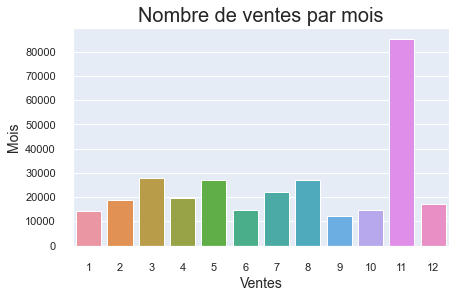

In [184]:
sns.countplot(x=df_2["created_at"].dt.month); 
plt.title("Nombre de ventes par mois", fontsize=20)
plt.xlabel('Ventes', fontsize=14)
plt.ylabel('Mois', fontsize=14);

Le mois de Novembre est largement au-dessus. Il est intéressant d'entrer en détail pour chaque catégorie pour prévoir le stock et   éviter les ruptures.

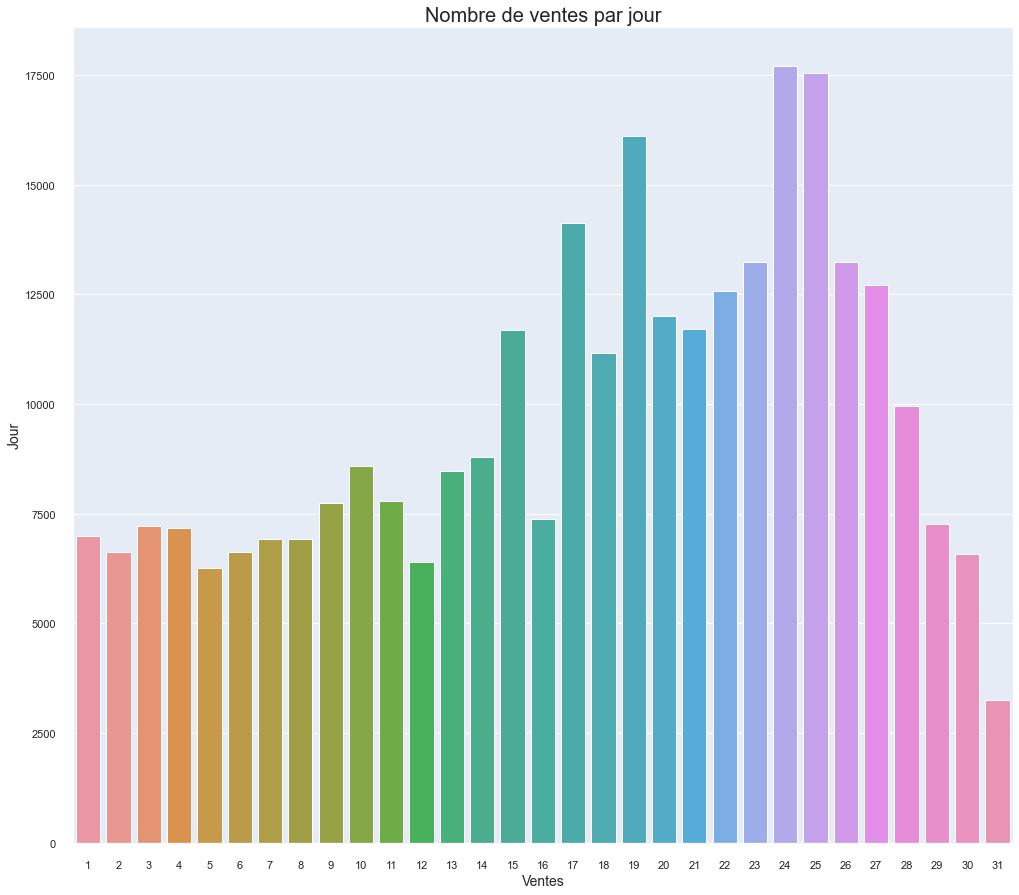

In [185]:
plt.figure(figsize=(15, 15))
sns.countplot(x=df_2["created_at"].dt.day); 
plt.title("Nombre de ventes par jour", fontsize=20)
plt.xlabel('Ventes', fontsize=14)
plt.ylabel('Jour', fontsize=14);
#les ventes augmentent à la fin de mois

## 5.2. Analise des status des commandes 

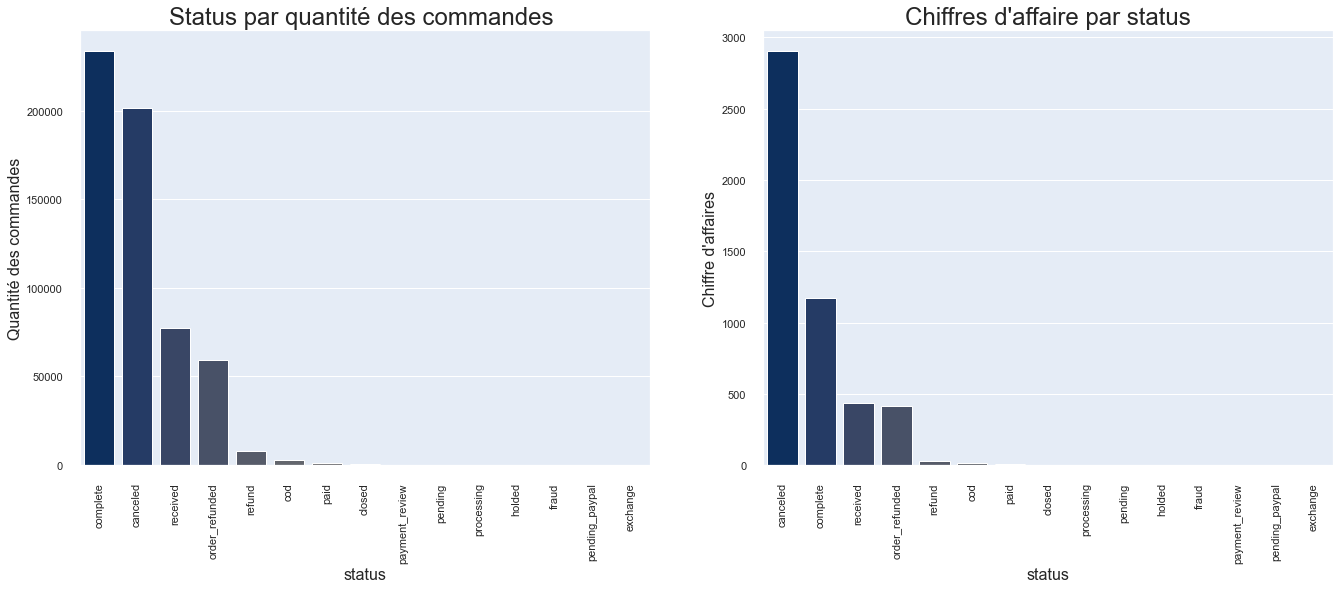

In [186]:
# Status par quantité des commandes
# Chiffres d'affaire par status

plt.figure(figsize=(20, 8))
plt.subplot(121)
plt.title(label='Status par quantité des commandes ', fontsize=24)
sns.countplot(x="status", data=df, palette="cividis", order = df.status.value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('status', fontsize=16)
plt.ylabel('Quantité des commandes', fontsize=16)

           
plt.subplot(122)

status_CA = df['grand_total'].groupby(df['status']).agg('sum').sort_values(ascending=True)
vals = [val / 1000000 for val in status_CA.values] 

plt.title(label="Chiffres d'affaire par status", fontsize=24)

order_list = list(status_CA.sort_values(ascending=False).index)
sns.barplot(y=vals, x=status_CA.index, order=order_list, palette='cividis')
plt.xlabel('status', fontsize=16)
plt.ylabel("Chiffre d'affaires", fontsize=16)

plt.xticks(rotation=90);

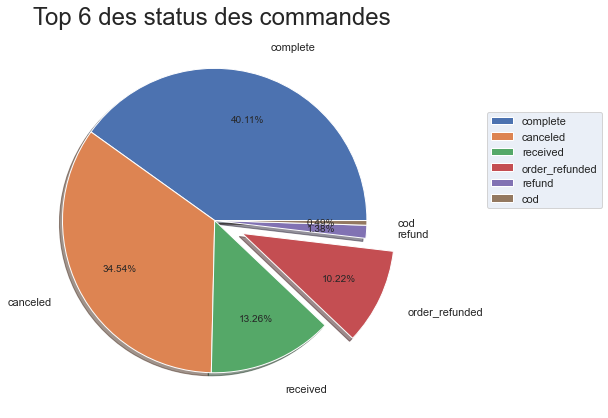

In [187]:
# Top 6 des status des commandes
df.head(6).status

plt.figure(figsize = (7, 7))
plt.title("Top 6 des status des commandes ", fontsize=24)
plt.pie(x = df['status'].value_counts().head(6),
        labels      = ['complete', 'canceled', 'received', 'order_refunded', 'refund', 'cod'],
        pctdistance = 0.7, labeldistance = 1.2,
        shadow = True,
        explode = [0, 0, 0, 0.2, 0, 0],
        autopct = lambda x: str(round(x, 2)) + '%')
plt.legend(loc="upper left", bbox_to_anchor=(1.2, 0.8));

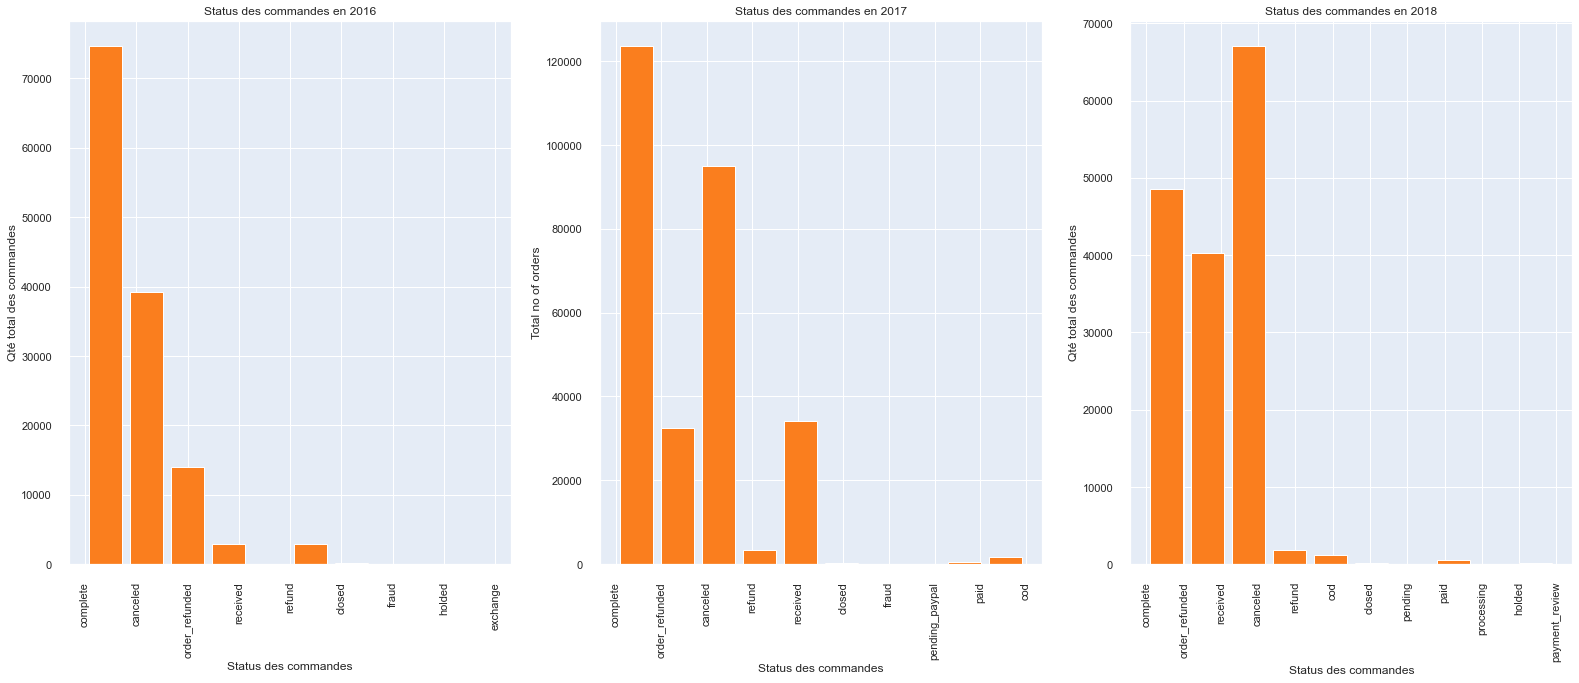

In [188]:
stats_2016 = df[df["Year"]== 2016].status
stats_2017 = df[df["Year"]== 2017].status 
stats_2018 = df[df["Year"]== 2018].status
plt.figure(figsize=(24 , 10))

#L'evolution des status en  2017
plt.subplot(1,3,1)
plt.title('Status des commandes en 2016')
plt.xlabel('Status des commandes')
plt.ylabel('Qté total des commandes')
plt.xticks(rotation = 90)
plt.hist(stats_2016, color = '#fa7e1e', rwidth = 0.8)

#histogram for 2018
plt.subplot(1,3,2)
plt.title('Status des commandes en 2017')
plt.xlabel('Status des commandes')
plt.ylabel('Total no of orders')
plt.xticks(rotation = 90)
plt.hist(stats_2017, color = '#fa7e1e', rwidth = 0.8)

#histogram for 2019
plt.subplot(1,3,3)
plt.title('Status des commandes en 2018')
plt.xlabel('Status des commandes')
plt.ylabel('Qté total des commandes')
plt.xticks(rotation = 90)
plt.hist(stats_2018, color = '#fa7e1e', rwidth = 0.8)
plt.show();

Distribution des stautus par catégorie 

In [189]:
import plotly.express as px
status=df.groupby(['category_name','status'])['grand_total'].sum().reset_index()
graph=px.bar(status,x='category_name',y='grand_total', color='status', color_continuous_scale=px.colors.sequential.Rainbow, title ='Status des commandes par catégories')

graph.show()

Nous avons plus de 10 status similaire la groupage va faciliter notre analyse :
Complété = Completed
Annulé = Canceled
En cours = Pending

In [190]:
df['status'] = df.status.replace({'complete': 'Completed',
                               'received': 'Completed',
                               'cod': 'Completed',
                               'paid': 'Completed',
                               'closed': 'Completed',
                               'exchange': 'Completed',
                               'canceled': 'Canceled',
                               'order_refunded': 'Canceled',
                               'refund': 'Canceled',
                               'fraud': 'Canceled',
                               'payment_review': 'Pending',
                               'pending': 'Pending',
                               'processing': 'Pending',
                               'holded': 'Pending',
                               'pending_paypal': 'Pending'})
df['status']

0         Completed
1          Canceled
2          Canceled
3         Completed
4          Canceled
            ...    
584519    Completed
584520      Pending
584521      Pending
584522      Pending
584523      Pending
Name: status, Length: 584524, dtype: object

In [191]:
import plotly.express as px
status=df.groupby(['category_name','status'])['grand_total'].sum().reset_index()
graph=px.bar(status,x='category_name', y='grand_total', color='status', color_continuous_scale=px.colors.sequential.Rainbow, title ='Status des commandes par catégories')

graph.show()

Text(0.5, 1.0, 'Status des commandes')

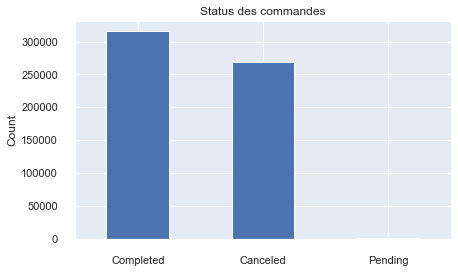

In [192]:
df['status'].value_counts().plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.title('Status des commandes')

In [193]:
df['status'].value_counts()

Completed    315510
Canceled     268838
Pending         176
Name: status, dtype: int64

In [194]:
df_2['status'].value_counts()

completed    300807
Name: status, dtype: int64

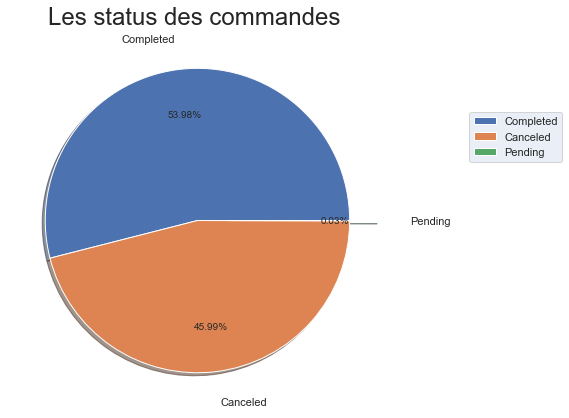

In [195]:
s =df['status'].value_counts()
plt.figure(figsize = (7, 7))
plt.title("Les status des commandes ", fontsize=24)
plt.pie(x = s,
        labels = s.index,
        pctdistance = 0.7, labeldistance = 1.2,
        shadow = True,
        explode = [0, 0, 0.2],
        autopct = lambda x: str(round(x, 2)) + '%')
plt.legend(loc="upper left", bbox_to_anchor=(1.2, 0.8));

Par catégorie il est évident que notre top en chiffre d’affaires  a plus des commandes annulé (Mobile, Applience, Entrenement, Computuring ) 

La distribution des catégories par status completed 

In [196]:
vente_comp = df.loc[df["status"] == "Completed"]["category_name"].value_counts().to_frame("category_name")
vente_comp

category_name
Men's Fashion               53254
Mobiles & Tablets           50298
Women's Fashion             34484
Beauty & Grooming           27492
Superstore                  27194
Appliances                  25540
Soghaat                     24149
Home & Living               16241
Others                      12701
Health & Sports             11657
Entertainment               11495
Kids & Baby                 10223
Computing                    7258
School & Education           2177
Books                        1347

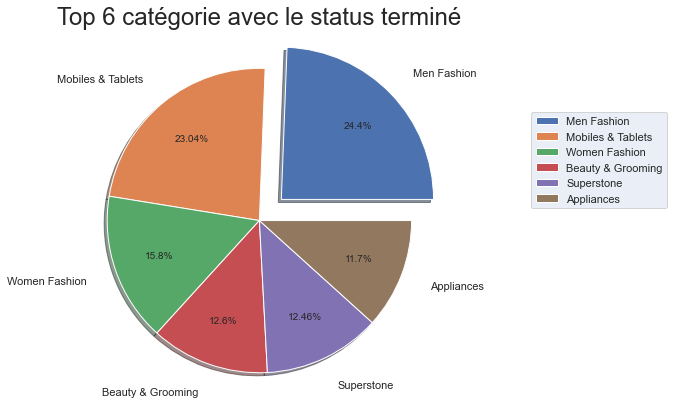

In [197]:
plt.figure(figsize = (7, 7))
plt.title("Top 6 catégorie avec le status terminé", fontsize=24)
plt.pie(x = vente_comp['category_name'].head(6),
        labels      = ['Men Fashion', 'Mobiles & Tablets', 'Women Fashion', 'Beauty & Grooming', 'Superstone', 'Appliances'  ],
        pctdistance = 0.7, labeldistance = 1.2,
        shadow = True,
        explode = [0.2, 0, 0, 0, 0, 0],
        autopct = lambda x: str(round(x, 2)) + '%')
plt.legend(loc="upper left", bbox_to_anchor=(1.2, 0.8));

La distribution des catégories par status canceled

In [198]:
vente_can = df.loc[df["status"] == "Canceled"]["category_name"].value_counts().to_frame("category_name")
vente_can

category_name
Mobiles & Tablets           65376
Men's Fashion               38933
Appliances                  26857
Women's Fashion             25229
Others                      24527
Superstore                  16390
Entertainment               14817
Beauty & Grooming           13998
Home & Living               10258
Soghaat                      9849
Computing                    8671
Kids & Baby                  6271
Health & Sports              5839
School & Education           1300
Books                         523

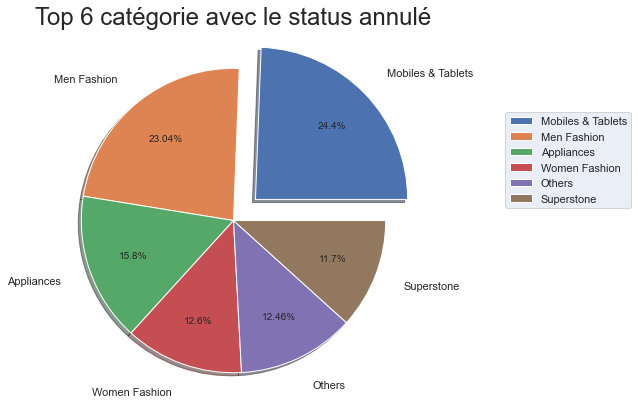

In [199]:
plt.figure(figsize = (7, 7))
plt.title("Top 6 catégorie avec le status annulé", fontsize=24)
plt.pie(x = vente_comp['category_name'].head(6),
        labels      = ['Mobiles & Tablets', 'Men Fashion', 'Appliances', 'Women Fashion', 'Others', 'Superstone'],
        pctdistance = 0.7, labeldistance = 1.2,
        shadow = True,
        explode = [0.2, 0, 0, 0, 0, 0],
        autopct = lambda x: str(round(x, 2)) + '%')
plt.legend(loc="upper left", bbox_to_anchor=(1.2, 0.8));

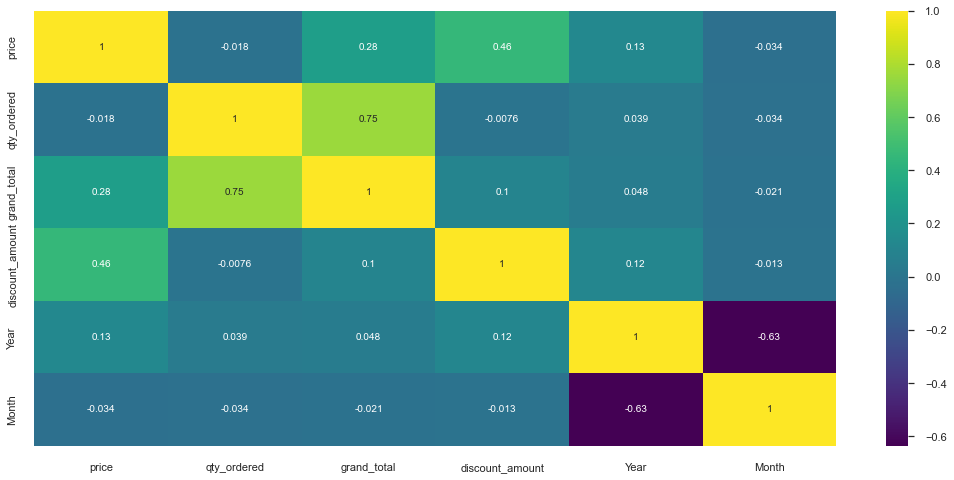

In [200]:
# Vérification des correlation entre les variables
plt.figure(figsize = (16 , 8))
sns.heatmap(df.corr() ,annot = True ,cmap='viridis')
plt.show()

## 5.3. Analyse des produits

In [201]:
#Nom de Produit le plus commandé
df_2['sku'].value_counts().idxmax()

'MATSAM59DB75ADB2F80'

In [202]:
#Top 10 meilleures commandes de produits en 2016-2018

most_sold = pd.DataFrame(df_2['sku'].value_counts())
top_10_most_sold = most_sold[0:10]
top_10_most_sold['Top 10 meilleures commandes de produits'] = top_10_most_sold.index
top_10_most_sold.reset_index(drop = True)
top_10_most_sold.columns = ['Nombres', 'Top 10 meilleures commandes de produits'] 
top_10_most_sold

C:\Users\Thao TO\AppData\Local\Temp\ipykernel_18536\4011633041.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Nombres Top 10 meilleures commandes de produits
MATSAM59DB75ADB2F80               2865                     MATSAM59DB75ADB2F80
kcc_krone deal                    1599                          kcc_krone deal
Al Muhafiz Sohan Halwa Almond     1552           Al Muhafiz Sohan Halwa Almond
emart_00-7                        1082                              emart_00-7
RS_Plain Rusk Pack of 3            728                 RS_Plain Rusk Pack of 3
unilever_Deal-6                    688                         unilever_Deal-6
Al Muhafiz Sohan Halwa Walnut      670           Al Muhafiz Sohan Halwa Walnut
MATSAM5A7463EE3C1A5                665                     MATSAM5A7463EE3C1A5
Rubian_U8 Smart Watch              650                   Rubian_U8 Smart Watch
RS_Soan Papri-250gm                615                     RS_Soan Papri-250gm

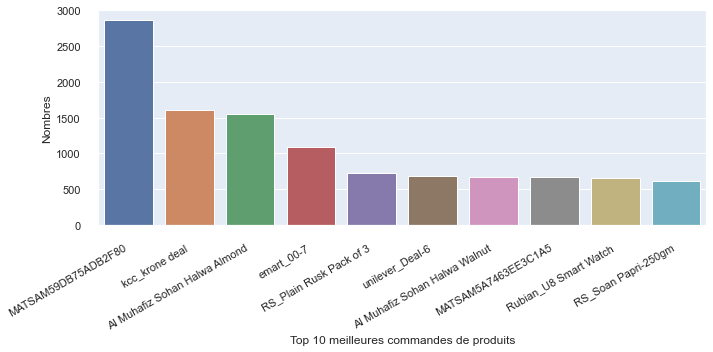

In [203]:
# Top 10 meilleures commandes de produits

fig, ax = plt.subplots(figsize=(10, 5))

sns.barplot(x = top_10_most_sold['Top 10 meilleures commandes de produits'], y = top_10_most_sold['Nombres'], data = top_10_most_sold)

# add Labels
ax.set(xlabel = "Top 10 meilleures commandes de produits")
ax.set(ylabel = 'Nombres')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 30, horizontalalignment = 'right')
plt.tight_layout()
plt.show()

In [204]:
# sku classé par an
sku_by_year = pd.crosstab(df_2.sku, df_2["created_at"].dt.year)
sku_by_year.sort_values(by = 2016, ascending = False)

created_at                     2016  2017  2018
sku                                            
Al Muhafiz Sohan Halwa Almond  1387   165     0
kcc_krone deal                 1309   290     0
unilever_Deal-6                 640    48     0
RS_Plain Rusk                   613     0     0
emart_00-7                      610   472     0
...                             ...   ...   ...
MATSAM5B4F47585928D               0     0     2
MATSAM5B54B81CC81AC               0     0     1
MATSAM5B61B44460F2F               0     0    13
MATSAM5B67453D6EA8D               0     0     2
MEFDES59D61FCD38FEA-9             0     1     0

[61188 rows x 3 columns]

In [205]:
# Produit le plus commandé chaque année
sku_by_year = pd.crosstab(df_2.sku, df_2["created_at"].dt.year).idxmax()
sku_by_year

created_at
2016    Al Muhafiz Sohan Halwa Almond
2017              MATSAM59DB75ADB2F80
2018              MATSAM5A7463EE3C1A5
dtype: object

In [206]:
by_year = df_2.groupby(df_2["created_at"].dt.year).count()['sku']
by_year

created_at
2016     77075
2017    158828
2018     64904
Name: sku, dtype: int64

## 5.4. Visualisation de mode de paiement et la fréquence de l'état de la commande

In [1]:
# nombre de moyen de payemment pour le DF original
df['payment_method'].nunique()
# nom de moyen de payemment
pd.DataFrame(df['payment_method'].unique()).transpose()
df_payment_method = pd.DataFrame(df_2.payment_method.value_counts())
df_payment_method = df_payment_method.sort_values(by = 'payment_method', ascending = False)
df_payment_method.transpose()



NameError: name 'df' is not defined

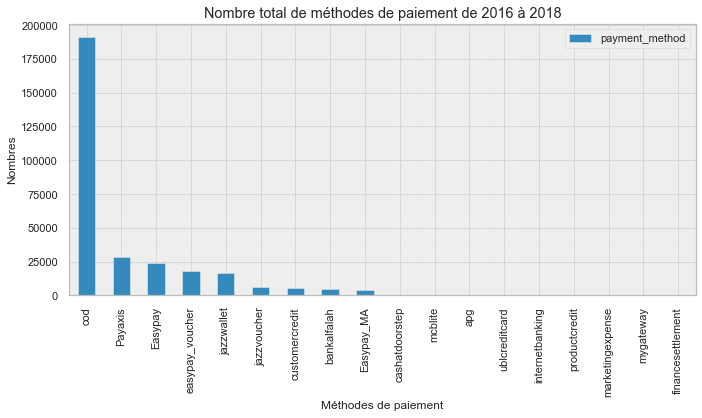

In [208]:
plt.style.use('bmh')

df_payment_method.plot.bar(title = 'Nombre total de méthodes de paiement de 2016 à 2018', 
                           xlabel = 'Méthodes de paiement', 
                           ylabel = 'Nombres', 
                           figsize = (10, 5))
plt.show()

C:\Apps\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



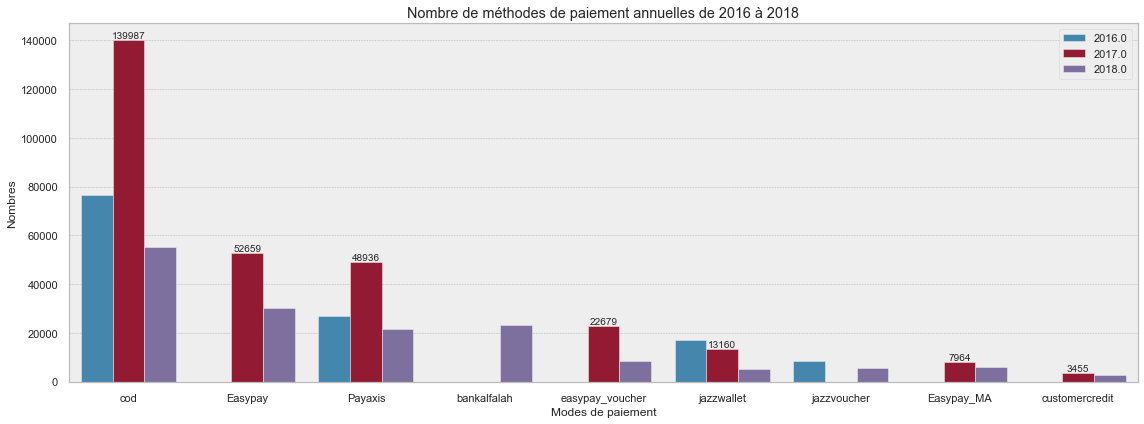

In [209]:

df_payMethod_year = pd.DataFrame(df[['payment_method', 'Year']].value_counts())
df_payMethod_year = df_payMethod_year.reset_index()
df_payMethod_year.columns = ['Payment Methods', 'Year', 'Count']
data = df_payMethod_year.sort_values(by = 'Count', ascending = False).head(20)


fig, ax = plt.subplots(figsize = (16, 6))

sns.barplot('Payment Methods', 'Count', hue = 'Year', data = data)

ax.bar_label(ax.containers[-2], fmt = '\n%.0f', label_type = 'edge')

ax.set(xlabel = 'Modes de paiement')
ax.set(ylabel = 'Nombres')
ax.set(title = 'Nombre de méthodes de paiement annuelles de 2016 à 2018')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 0, horizontalalignment = 'center')
ax.legend(loc = 1)
plt.tight_layout()
plt.show()

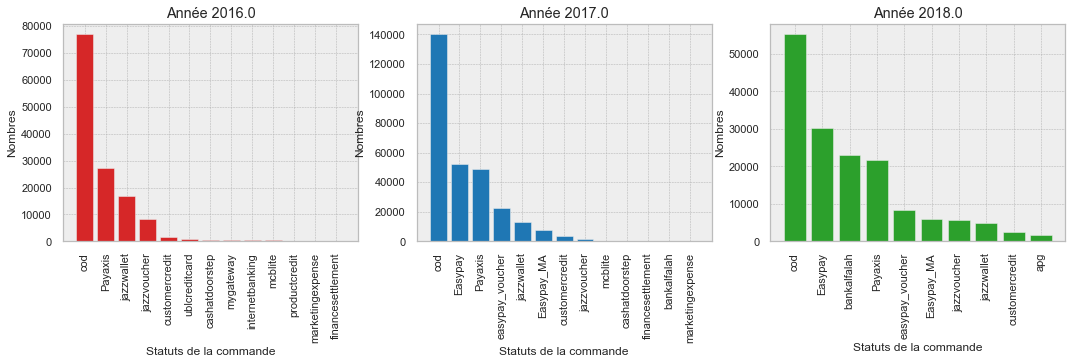

In [210]:
years = df_payMethod_year.Year.unique()
years = sorted(years)


mycolors = ['tab:red', 'tab:blue', 'tab:green'] 


fig, ax = plt.subplots(1, len(years), sharey = False, figsize = (16, 4))

for i, j in enumerate(years):
    
    data = df_payMethod_year[df_payMethod_year['Year'] == j].value_counts().reset_index().sort_values(by = ['Count'], ascending = False)
        
    ax[i].bar(data['Payment Methods'], data.Count, color = mycolors[i])
    
 
    ax[i].set(xlabel = 'Statuts de la commande')
    ax[i].set(ylabel = 'Nombres')
    ax[i].set(title = 'Année ' + str(j))
    ax[i].tick_params(labelrotation = 90, axis='x')

### 5.4.1 Corrélation entre le mode de paiement et le statut de la commande

In [211]:
payment_method_status = pd.crosstab(df.status, df.payment_method)

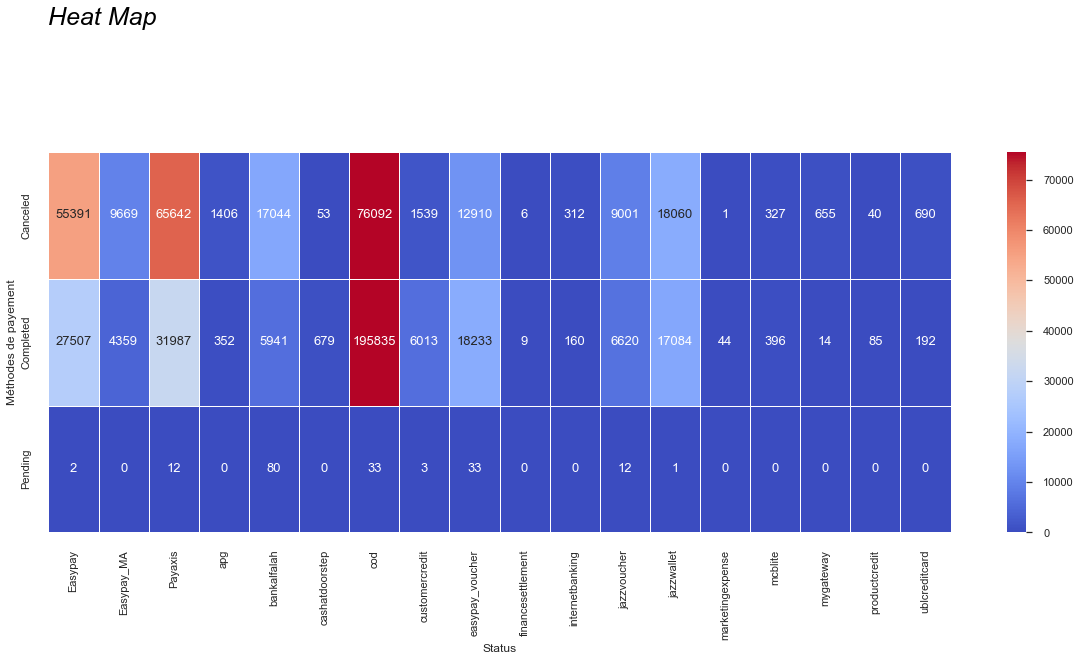

In [212]:
#Trouver une corrélation entre le mode de paiement et le statut de la commande :

%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (18, 7))
sns.set_theme(context = 'notebook', style = 'darkgrid', palette = 'bright', font = 'sans-serif', font_scale = 1, color_codes = True, rc = None)

sns.heatmap(payment_method_status, 
            cmap = 'coolwarm', 
            robust = True, 
            annot = True, 
            annot_kws = {'size':13}, 
            fmt = ".0f", 
            linecolor = 'white', 
            linewidths = 1, 
            cbar = True, 
            square = False,
            xticklabels = True,
            yticklabels = True) 

plt.xlabel("Status")
plt.ylabel("Méthodes de payement")
plt.text(0,-1, "Heat Map", fontsize = 25, color = 'Black', fontstyle = 'italic')
plt.show()

Nous observons la relation entre le mode de paiement et le statut et constatons que les méthodes COD, Payaxis et Easypay sont les méthodes de paiement les plus populaires avec respectivement les états annulé et terminé. Surtout, les deux méthodes Payaxis et Easypay ont un taux d'annulation très élevé

### 5.4.2 Corrélation entre les chiffres d'affaires avec la promotion (Discount)

En plus d'analyser les ventes quotidiennes, nous pouvons analyser les revenus accumulés au fil des ans

In [213]:
df['customer_id'] = df['customer_id'].astype(str)
df['item_id'] = df['item_id'].astype(str)
df['qty_ordered'] = df['qty_ordered'].astype(int)  
df['Year'] = df['Year'].astype(int)  
df['Month'] = df['Month'].astype(int) 

In [214]:
dfg = df.groupby('created_at')['grand_total'].sum().reset_index()
dfq = df.groupby('created_at')['qty_ordered'].sum().reset_index()
dfd = df.groupby('created_at')['discount_amount'].sum().reset_index()
# calcul du nombre de valeurs non numériques
dfs = df.groupby('created_at')['sku'].count().reset_index() 
dfst = df.groupby('created_at')['status'].count().reset_index()

In [215]:
p = pd.DataFrame(dfg) 
p['qty_ordered'] = dfq['qty_ordered']
p['discount_amount'] = dfd['discount_amount']
p['sku'] = dfs['sku']
p['status'] = dfst['status']

In [216]:
#Cumulative Sum
p['cum_grand_total'] = p['grand_total'].cumsum()
p['cum_qty_ordered'] = p['qty_ordered'].cumsum()
p['cum_discount_amount'] = p['discount_amount'].cumsum()
p['cum_sku_cnt'] = p['sku'].cumsum()
p['cum_status_cnt'] = p['status'].cumsum()


In [217]:
import plotly.graph_objs as go
fig = go.Figure()

# ajout des traces
fig.add_trace(go.Scatter(x=p['created_at'], y=p['grand_total'],
                    mode='lines+markers',
                    name='Chiffre d\'affaire'))
fig.add_trace(go.Scatter(x=p['created_at'], y=p['discount_amount'],
                    mode='lines+markers',
                    name='Montant de promotion'))
fig.show()

Le graphique ci-dessus est un graphique montrant le chiffre d'affaires quotidien des ventes et le montant de la remise accordée aux clients. Grâce à l'observation, nous voyons qu'il y a un certain nombre de fois où les ventes ont monté en flèche comme novembre 2017, juillet 2017, novembre 2016 et avril 2018.

In [218]:
#Pour faciliter l'observation d'une manière spécifique, nous utilisons la fonction Rolling means sur 30 jours 
#...pour afficher un graphique permettant d'observer les revenus sur différentes périodes.
p['rolling_grand_total'] = p['grand_total'].rolling(30).mean()
p['rolling_discount_amount'] = p['discount_amount'].rolling(30).mean()

fig = go.Figure()

fig.add_trace(go.Scatter(x=p['created_at'], y=p['rolling_grand_total'],
                    mode='lines+markers',
                    name='grand_total'))
fig.add_trace(go.Scatter(x=p['created_at'], y=p['rolling_discount_amount'],
                    mode='lines+markers',
                    name='discount_amount'))
fig.show()

In [219]:
fig = go.Figure()

# un graphique montrant les ventes et les remises cumulées pour les clients au fil du temps.
fig.add_trace(go.Scatter(x=p['created_at'], y=p['cum_grand_total'],
                    mode='lines+markers',
                    name='chiffres d\'affaires cumulées'))
fig.add_trace(go.Scatter(x=p['created_at'], y=p['cum_discount_amount'],
                    mode='lines+markers',
                    name='promotion cumulée'))
fig.show()

À travers les trois graphiques, nous voyons une certaine relation entre les ventes et le montant de la remise accordée aux clients. Surtout les moments où les ventes montent en flèche, c'est le moment de lancer des promotions attrayantes pour attirer les clients. Nous devons donc trouver plus de coefficient de corrélation entre les ventes et le montant de la remise pour les clients est de 0,12461, bien supérieur à 0 mais la valeur est assez proche de 0 montrant que la corrélation linéaire positive n'est pas proche.

### 5.4.3 Corrélation entre la date de commande et la catégorie d'article

In [220]:
#Rechercher la corrélation entre la date de commande et la catégorie d'article
df_cat_orderDate = pd.DataFrame(df[['category_name', 'Year', 'Month']])
df_cat_orderDate = df_cat_orderDate.sort_values(by = ['Year', 'Month'])
df_cat_orderDate

category_name  Year  Month
0         Women's Fashion  2016      7
1       Beauty & Grooming  2016      7
2         Women's Fashion  2016      7
3       Beauty & Grooming  2016      7
4                 Soghaat  2016      7
...                   ...   ...    ...
584519    Women's Fashion  2018      8
584520  Mobiles & Tablets  2018      8
584521  Mobiles & Tablets  2018      8
584522  Mobiles & Tablets  2018      8
584523  Mobiles & Tablets  2018      8

[584524 rows x 3 columns]

In [221]:
df_cat_orderDate['Year'] =  df_cat_orderDate['Year'].apply(lambda x: str(x))
df_cat_orderDate['Month'] = df_cat_orderDate['Month'].apply(lambda x: str(x))

df_cat_orderDate['Order_Date'] = df_cat_orderDate['Year'] + "-" + df_cat_orderDate['Month']
df_cat_orderDate = pd.crosstab(df_cat_orderDate.category_name, df_cat_orderDate.Order_Date) #, margins = True
df_cat_orderDate

Order_Date          2016-10  2016-11  2016-12  2016-7  2016-8  2016-9  2017-1  \
category_name                                                                   
Appliances              616     6279      860     381     339    1226     636   
Beauty & Grooming      1390     5754     1080    2425    1846    1405     880   
Books                    73       89       52      22     165      37      39   
Computing               237     2616      330     214     203     487     293   
Entertainment           291     1893      334      64      91     851     267   
Health & Sports         532     1972      671     181     371     433     511   
Home & Living           619     2984      451     389     427     760     360   
Kids & Baby             578     1116      591     168     509     461     497   
Men's Fashion          1954    15760     2840    1003    2587    1264    2022   
Mobiles & Tablets      1724    11839     2796     820    1792    3318    3045   
Others                  971     3932      374     766     232    1366     483   
School & Education      177      311      203     177     241      94     162   
Soghaat                2754     6382     1748    1746    1853    1771    1706   
Superstore              242     4889      237      12     251     993    1012   
Women's Fashion         966     5712      885     469     628     967    1282   

Order_Date          2017-10  2017-11  2017-12  ...  2017-8  2017-9  2018-1  \
category_name                                  ...                           
Appliances              672    14495     1751  ...    1423     475    1237   
Beauty & Grooming      1089     5003     1884  ...    1660     696    1290   
Books                   106      113       62  ...      47      68      94   
Computing               680     2643      437  ...     726     170     370   
Entertainment          1312     5657      289  ...     952     456     485   
Health & Sports         307     1054      321  ...     555     289     483   
Home & Living           472     6034      957  ...     832     344     728   
Kids & Baby             384     1842      635  ...     683     229     422   
Men's Fashion          2267    16315     2931  ...    3681    1675    1596   
Mobiles & Tablets      3956    19404     2458  ...    4254    1967    2694   
Others                 1603      441      117  ...     306      62      91   
School & Education       52      143       32  ...     186      75      77   
Soghaat                 642     1064      908  ...    1159     532     661   
Superstore             1825     2105      698  ...    5043     339     952   
Women's Fashion        2132     7615     2267  ...    3576    1214    1692   

Order_Date          2018-2  2018-3  2018-4  2018-5  2018-6  2018-7  2018-8  
category_name                                                               
Appliances            2926    2895     986    4274    1341     812    1106  
Beauty & Grooming     1101    1274     873    1685    1192     780     958  
Books                   49      49      52     109      36      36      37  
Computing              677     871     312     821     402     318     379  
Entertainment         2605    2058     285    2192     484     410    1101  
Health & Sports        630    1031     965    1276     821     785     417  
Home & Living         1208     833     724     808     596     595     600  
Kids & Baby            760     422     485     432     307     283     257  
Men's Fashion         3658    3438    1921    2168    1775    1253    1506  
Mobiles & Tablets     5738    5989    2217    7351    3757    3443    2512  
Others                4030   19249     287     289      97      69      66  
School & Education     143     158      75      78      74      91      86  
Soghaat                328     339     340    1197     642     257     257  
Superstore            1101    1178     639    2375    1793     700    1240  
Women's Fashion       1962    2171    2252    2812    1420    1

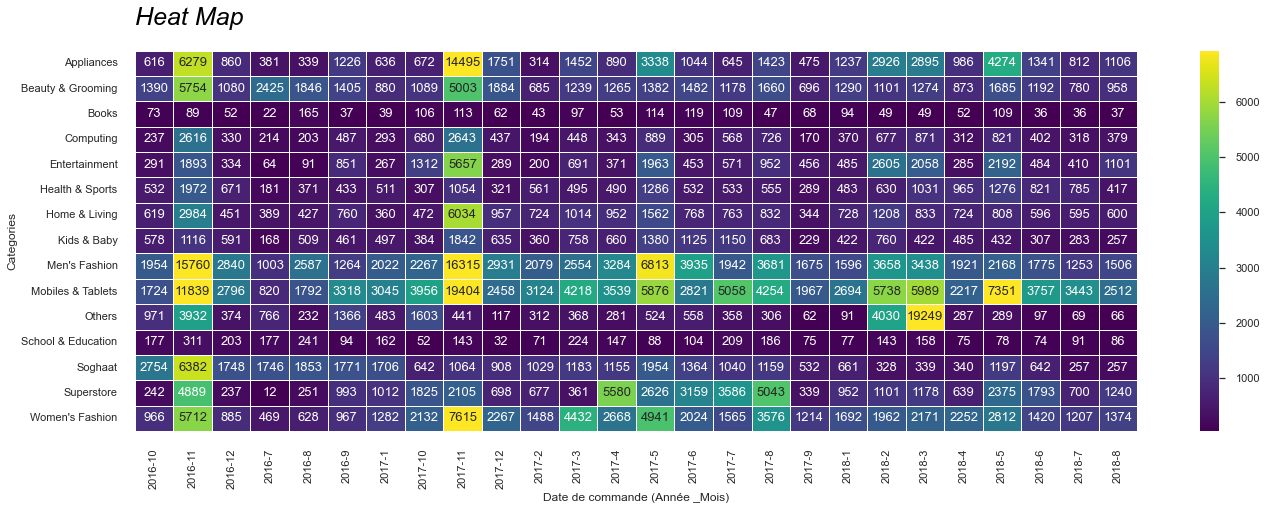

In [222]:
plt.figure(figsize = (20, 7))
sns.set_theme(context = 'notebook', style = 'darkgrid', palette = 'bright', font = 'sans-serif', font_scale = 1, color_codes = True, rc = None)

sns.heatmap(df_cat_orderDate, 
            cmap = 'viridis', 
            robust = True, 
            annot = True, 
            annot_kws = {'size':13}, 
            fmt = ".0f", 
            linecolor = 'white', 
            linewidths = 1, 
            cbar = True, 
            square = False,
            xticklabels = True,
            yticklabels = True) 

plt.xlabel("Date de commande (Année _Mois)")
plt.ylabel("Categories")
plt.text(0,-1, "Heat Map", fontsize = 25, color = 'Black', fontstyle = 'italic')
plt.show()

Le nombre de marchandises commandées est concentré dans les périodes de promotion telles que novembre 2016, novembre 2017 et mars 2018

## 5.3 Taux de rachat 

Le taux de rachat est le pourcentage de votre clientèle qui a effectué un achat répété sur une période donnée.

Le taux d'achats répétés est une donnée précieuse car les clients réguliers sont extrêmement rentables. Avoir une idée de votre taux de rachat vous permet de repérer et de comprendre les facteurs transformant certains clients en acheteurs réguliers et d'appliquer cette connaissance à vos futures campagnes commerciales pour augmenter votre taux de conversion de prospects.

In [224]:
# détermine les nombres des clients uniques
total_customers = df['customer_id'].nunique()
total_customers

115327

In [225]:
# détermine les nombres des clientes fréquents (les clients fidèles)
list_customer = df['customer_id'].value_counts()
customers_non_rachat = list(list_customer.value_counts()[:1])[0]
customers_non_rachat

50399

In [226]:
customers_rachat = total_customers - customers_non_rachat
customers_rachat

64928

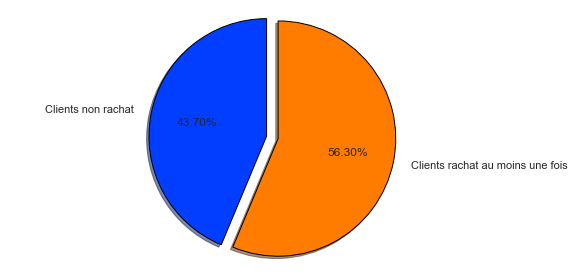

In [227]:
plt.figure(figsize = (8, 4))

values = [customers_non_rachat, customers_rachat]
labels = ['Clients non rachat', 'Clients rachat au moins une fois']


plt.pie(values, 
        labels = labels, 
        labeldistance = 1.15, 
        explode = (0, 0.1), 
        wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'black'},#
        autopct = '%1.2f%%',
        shadow = True, 
        startangle = 90)

plt.axis('equal') 
plt.tight_layout()
plt.show()

Ici, nous avons constaté que le pourcentage de clients qui effectuent un achat unique minimum est de 56,30 %. Nous approfondirons l'analyse avec le taux de fidélisation de la clientèle et la méthode RFM.

Étapes RFM

Calculer la récence, la fréquence et le montant pour tous les clients
Déterminer quatre quartiles pour la récence, la fréquence et le montant
Calculer Rscore, Fscore et Mscore à partir des quartiles respectifs. Rscore haut pour le premier quartile tandis que Fscore haut et Mscore haut pour le dernier quartile et vice versa
RFM score = Rscore + Fscore + Mscore
La segmentation des clients est basée sur RFM score
Pour calculer la récence, nous suivrons les étapes ci-dessous : • Définissez la date de référence comme la dernière date dans les données • Filtrez la date d'achat la plus récente pour chaque client • Calculez la récence en soustrayant la date d'achat la plus récente de la date de référence • Supprimez la colonne de la date d'achat la plus récente

In [228]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 584524 entries, 0 to 584523
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   item_id                584524 non-null  object        
 1   status                 584524 non-null  object        
 2   created_at             584524 non-null  datetime64[ns]
 3   sku                    584524 non-null  object        
 4   price                  584524 non-null  float64       
 5   qty_ordered            584524 non-null  int32         
 6   grand_total            584524 non-null  float64       
 7   increment_id           584524 non-null  object        
 8   category_name          584524 non-null  object        
 9   sales_commission_code  584524 non-null  object        
 10  discount_amount        584524 non-null  float64       
 11  payment_method         584524 non-null  object        
 12  Working Date           584524 non-null  date

In [229]:
ref_date = df['Working Date'].max()

In [230]:
df['Date'] = df['Working Date'].apply(lambda x: x.date())

In [231]:
df['Most_Recent_Purchase'] = df.groupby('customer_id')['Date'].transform(max)
df['Récence'] = (ref_date.date() - df.Most_Recent_Purchase).astype('timedelta64[D]')

In [232]:
df = df.drop('Most_Recent_Purchase', axis=1)

In [233]:
df['Fréquence'] = df.groupby('customer_id')['increment_id'].transform('nunique')
df['Montant'] = df.groupby('customer_id')['grand_total'].transform(sum)
RFM_df = df[['customer_id', 'Récence', 'Fréquence', 'Montant']].drop_duplicates()
RFM_df.head()

customer_id  Récence  Fréquence     Montant
0         1.0    788.0          1     1950.00
1         2.0    641.0          2      510.00
2         3.0    466.0          2     7430.00
3         4.0      1.0        387  2567596.45
4         5.0    788.0          1     1110.00

In [234]:
import matplotlib.style as style

style.use('seaborn-poster')
style.use("fivethirtyeight")
plt.rcParams['font.family'] = 'serif'
sns.set(rc={'axes.facecolor':'#e5ecf6', 'figure.facecolor':'#636efa', 'axes.grid' : True})

5.3.1 Récence
Ensuite, on détermine quatre quartiles pour la récence, la fréquence et le montant :
La segmentation : 

    • Champion : Acheté récemment, achetez souvent et dépensez le plus
    • Clients fidèles : Dépensez beaucoup d'argent. Réactif aux promotions
    • Prometteur : Acheteurs récents, mais qui n'ont pas dépensé beaucoup
    • A risque : Dépensé beaucoup d'argent, acheté souvent mais il y a longtemps
    • Hibernating : Faibles dépenses, faible fréquence, achetés il y a longtemps
    • Client perdu : Récence, fréquence et scores monétaires les plus bas

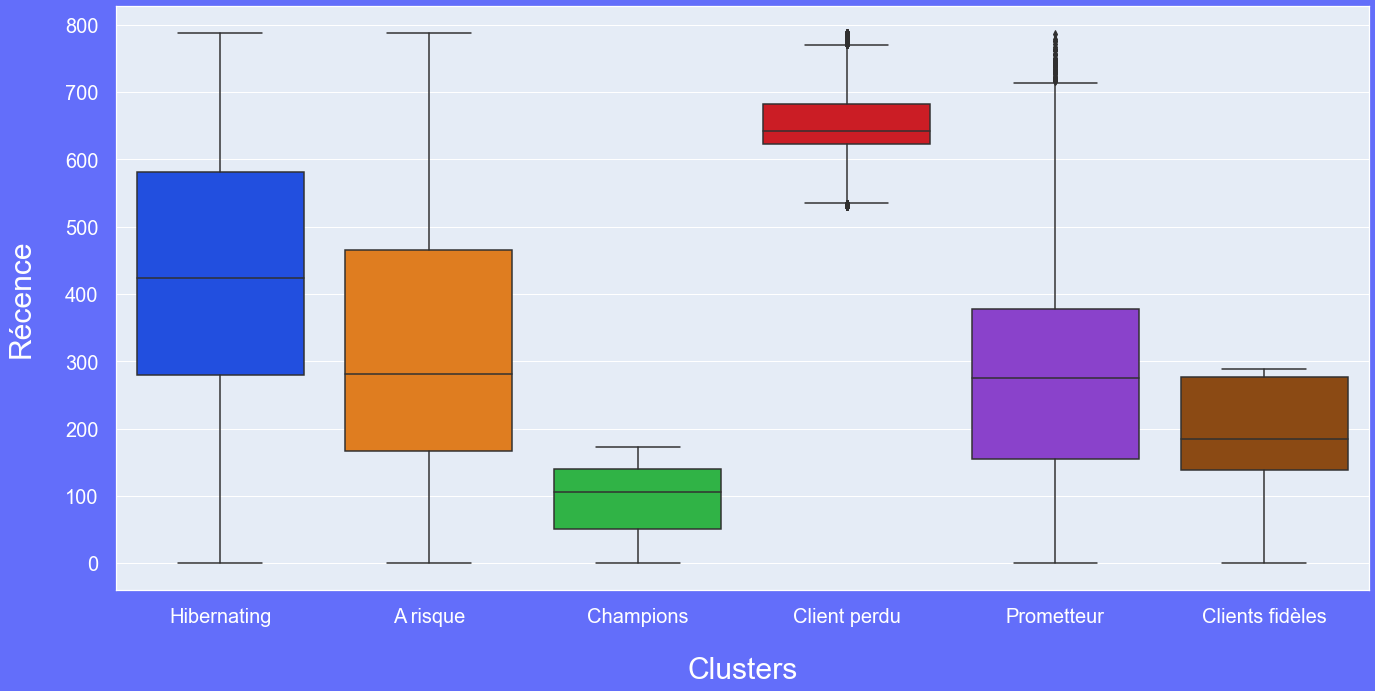

In [235]:
RFM_quantiles = RFM_df[['Récence', 'Fréquence', 'Montant']].quantile(q = [0.25, 0.5, 0.75])

RFM_df.loc[(RFM_df['Récence'] <= RFM_quantiles.Récence[0.25]), 'Rscore'] = 4.0
RFM_df.loc[(RFM_df['Récence'] > RFM_quantiles.Récence[0.25]) & (RFM_df.Récence <= RFM_quantiles.Récence[0.5]), 'Rscore'] = 3.0
RFM_df.loc[(RFM_df['Récence'] > RFM_quantiles.Récence[0.5]) & (RFM_df.Récence <= RFM_quantiles.Récence[0.75]), 'Rscore'] = 2.0
RFM_df.loc[(RFM_df['Récence'] > RFM_quantiles.Récence[0.75]), 'Rscore'] = 1.0

RFM_df.loc[(RFM_df['Fréquence'] <= RFM_quantiles.Fréquence [0.25]), 'Fscore'] = 1.0
RFM_df.loc[(RFM_df['Fréquence'] > RFM_quantiles.Fréquence [0.25]) & (RFM_df['Fréquence'] <= RFM_quantiles.Fréquence [0.5]), 'Fscore'] = 2.0
RFM_df.loc[(RFM_df['Fréquence'] > RFM_quantiles.Fréquence [0.5]) & (RFM_df['Fréquence'] <= RFM_quantiles.Fréquence [0.75]), 'Fscore'] = 3.0
RFM_df.loc[(RFM_df['Fréquence'] > RFM_quantiles.Fréquence [0.75]), 'Fscore'] = 4.0

RFM_df.loc[(RFM_df['Montant'] <= RFM_quantiles.Montant[0.25]), 'Mscore'] = 1.0
RFM_df.loc[(RFM_df['Montant'] > RFM_quantiles.Montant[0.25]) & (RFM_df['Montant'] <= RFM_quantiles.Montant[0.5]), 'Mscore'] = 2.0
RFM_df.loc[(RFM_df['Montant'] > RFM_quantiles.Montant[0.5]) & (RFM_df['Montant'] <= RFM_quantiles.Montant[0.75]), 'Mscore'] = 3.0
RFM_df.loc[(RFM_df['Montant'] > RFM_quantiles.Montant[0.75]), 'Mscore'] = 4.0

RFM_df['RFM_score'] = RFM_df.Rscore + RFM_df.Fscore + RFM_df.Mscore
RFM_df.loc[(RFM_df['RFM_score'] == 12.0), 'Cluster'] = 'Champions'
RFM_df.loc[(RFM_df['RFM_score'] == 11.0), 'Cluster'] = 'Clients fidèles'
RFM_df.loc[(RFM_df['RFM_score'] >= 9.0) & (RFM_df['RFM_score'] <= 10.0), 'Cluster'] = 'Prometteur'
RFM_df.loc[(RFM_df['RFM_score'] >= 7.0) & (RFM_df['RFM_score'] <= 8.0), 'Cluster'] = 'A risque'
RFM_df.loc[(RFM_df['RFM_score'] >= 4.0) & (RFM_df['RFM_score'] <= 6.0), 'Cluster'] = 'Hibernating'
RFM_df.loc[(RFM_df['RFM_score'] == 3.0), 'Cluster'] = 'Client perdu'
plt.figure(figsize=(20,10))

ax = sns.boxplot(data=RFM_df, x='Cluster', y = 'Récence', palette='bright');
plt.xticks( fontsize=20)
plt.yticks( fontsize=20)
plt.xlabel('Clusters', fontsize=30, labelpad=30, color='white')
plt.ylabel('Récence', fontsize=30, labelpad=30, color='white');
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white');

En termes de moment d'achat, les champions sont un groupe de clients qui achètent en permanence aux moments les plus récents, tandis que d'autres groupes de clients ont un large éventail de moments d'achat. Particulièrement pour le groupe de clients perdus qui n'ont pas acheté depuis longtemps

5.3.2 Fréquence

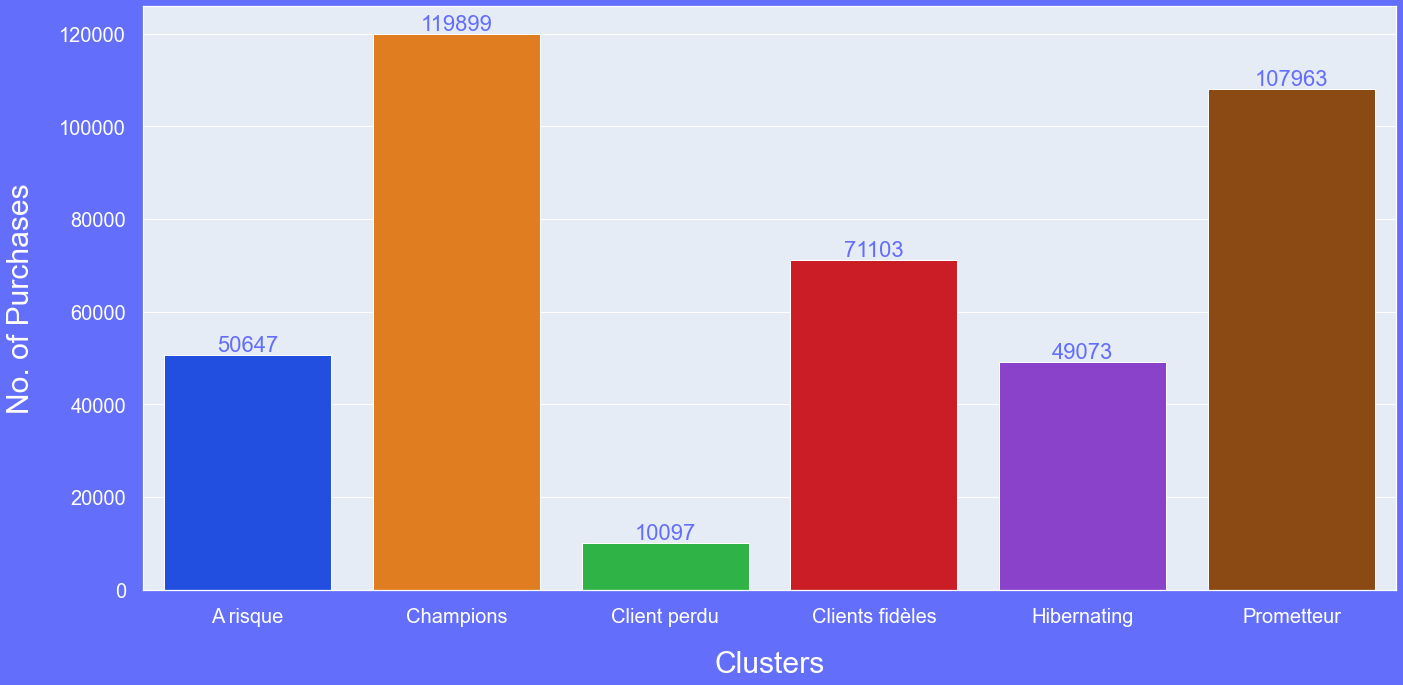

In [236]:
frequency = RFM_df.groupby('Cluster')['Fréquence'].sum()
frequency_df = pd.DataFrame(list(frequency.items()), columns=['Cluster', 'Number_of_Purchases'])

plt.figure(figsize=(20,10))

ax = sns.barplot(data=frequency_df, x='Cluster', y='Number_of_Purchases', palette='bright')
ax.bar_label(container = ax.containers[0], padding = 0, fontsize = 22, color='#636efa')
plt.xticks( fontsize=20)
plt.yticks( fontsize=20)
plt.xlabel('Clusters', fontsize=30, labelpad=24, color='white')
plt.ylabel('No. of Purchases', fontsize=30, labelpad=24, color='white');
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white');

En termes de commandes, les champions arrivent en tête, suivis des promoteurs et des clients fidèles. La différence n'est pas trop différente dans le nombre de commandes, mais dans le montant dépensé, il y a une nette différence

5.3.3 Montant

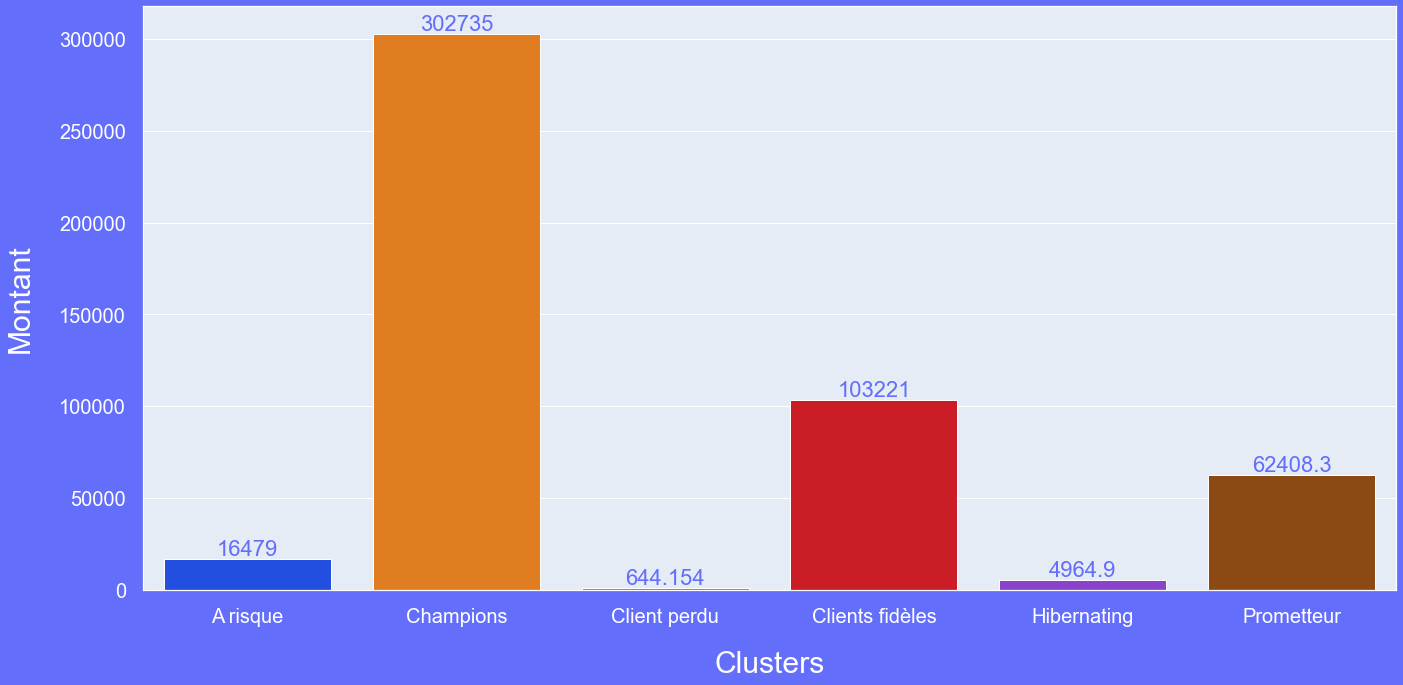

In [237]:
frequency = RFM_df.groupby('Cluster')['Montant'].mean()
frequency_df = pd.DataFrame(list(frequency.items()), columns=['Cluster', 'Montant'])

plt.figure(figsize=(20,10))

ax = sns.barplot(data=frequency_df, x='Cluster', y='Montant', palette='bright')
ax.bar_label(container = ax.containers[0], padding = 0, fontsize = 22, color='#636efa')
plt.xticks( fontsize=20)
plt.yticks( fontsize=20)
plt.xlabel('Clusters', fontsize=30, labelpad=24, color='white')
plt.ylabel('Montant', fontsize=30, labelpad=24, color='white');
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white');

Les clients qui dépensent le plus sont les champions, les clients fidèles et les promoteurs. On peut voir que le champion est toujours le meilleur client générateur de revenus pour la late-forme de commerce électronique

Cartographier les clusters sur les données d'origine et effectuer une analyse exploratoire des données pour obtenir des informations significatives

In [238]:
cluster_mapping = pd.Series(RFM_df.Cluster.values, index=RFM_df['customer_id']).to_dict()

df['Cluster'] = df['customer_id'].map(cluster_mapping)

In [239]:
cluster_counts = RFM_df.Cluster.value_counts()

cluster_counts_df = pd.DataFrame(list(cluster_counts.items()), columns=['Cluster', 'Number_of_Customers'])


fig = px.pie(cluster_counts_df, 
             values = cluster_counts_df.Number_of_Customers, 
             names = cluster_counts_df.Cluster,
             template = 'plotly_dark')
fig.update_traces(textposition='inside', textinfo='percent+label', textfont_size=20,
                  marker = dict(line = dict(color = 'white', width = 6)))
fig.show()

La plupart des clients sont en hibernation ou se trouvent dans le groupe à risque, c'est-à-dire 40 % et 23 % respectivement Les clients prometteurs, fidèles et champions qui ont dépensé le plus d'argent et effectué le plus d'achats représentent environ 27 % du nombre total de clients.

5.3.4 RFM par catégorie

In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 584524 entries, 0 to 584523
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   item_id                584524 non-null  object        
 1   status                 584524 non-null  object        
 2   created_at             584524 non-null  datetime64[ns]
 3   sku                    584524 non-null  object        
 4   price                  584524 non-null  float64       
 5   qty_ordered            584524 non-null  int32         
 6   grand_total            584524 non-null  float64       
 7   increment_id           584524 non-null  object        
 8   category_name          584524 non-null  object        
 9   sales_commission_code  584524 non-null  object        
 10  discount_amount        584524 non-null  float64       
 11  payment_method         584524 non-null  object        
 12  Working Date           584524 non-null  date

In [243]:
cluster1 = df[df.Cluster == 'Champions'].groupby('category_name')['grand_total'].sum().to_frame().reset_index()
cluster1.columns = ['Category', 'Grand_total_Cluster1']

cluster2 = df[df.Cluster == 'Clients fidèles'].groupby('category_name')['grand_total'].sum().to_frame().reset_index()
cluster2.columns = ['Category', 'Grand_total_Cluster2']

cluster3 = df[df.Cluster == 'Prometteur'].groupby('category_name')['grand_total'].sum().to_frame().reset_index()
cluster3.columns = ['Category', 'Grand_total_Cluster3']

cluster4 = df[df.Cluster == 'A risque'].groupby('category_name')['grand_total'].sum().to_frame().reset_index()
cluster4.columns = ['Category', 'Grand_total_Cluster4']

cluster5 = df[df.Cluster == 'Hibernating'].groupby('category_name')['grand_total'].sum().to_frame().reset_index()
cluster5.columns = ['Category', 'Grand_total_Cluster5']

cluster6 = df[df.Cluster == 'Client perdu'].groupby('category_name')['grand_total'].sum().to_frame().reset_index()
cluster6.columns = ['Category', 'Grand_total_Cluster6']

merged = cluster1.merge(cluster2, how='left').merge(cluster3, how='left').merge(cluster4, how='left').merge(cluster5, how='left').merge(cluster6, how='left')

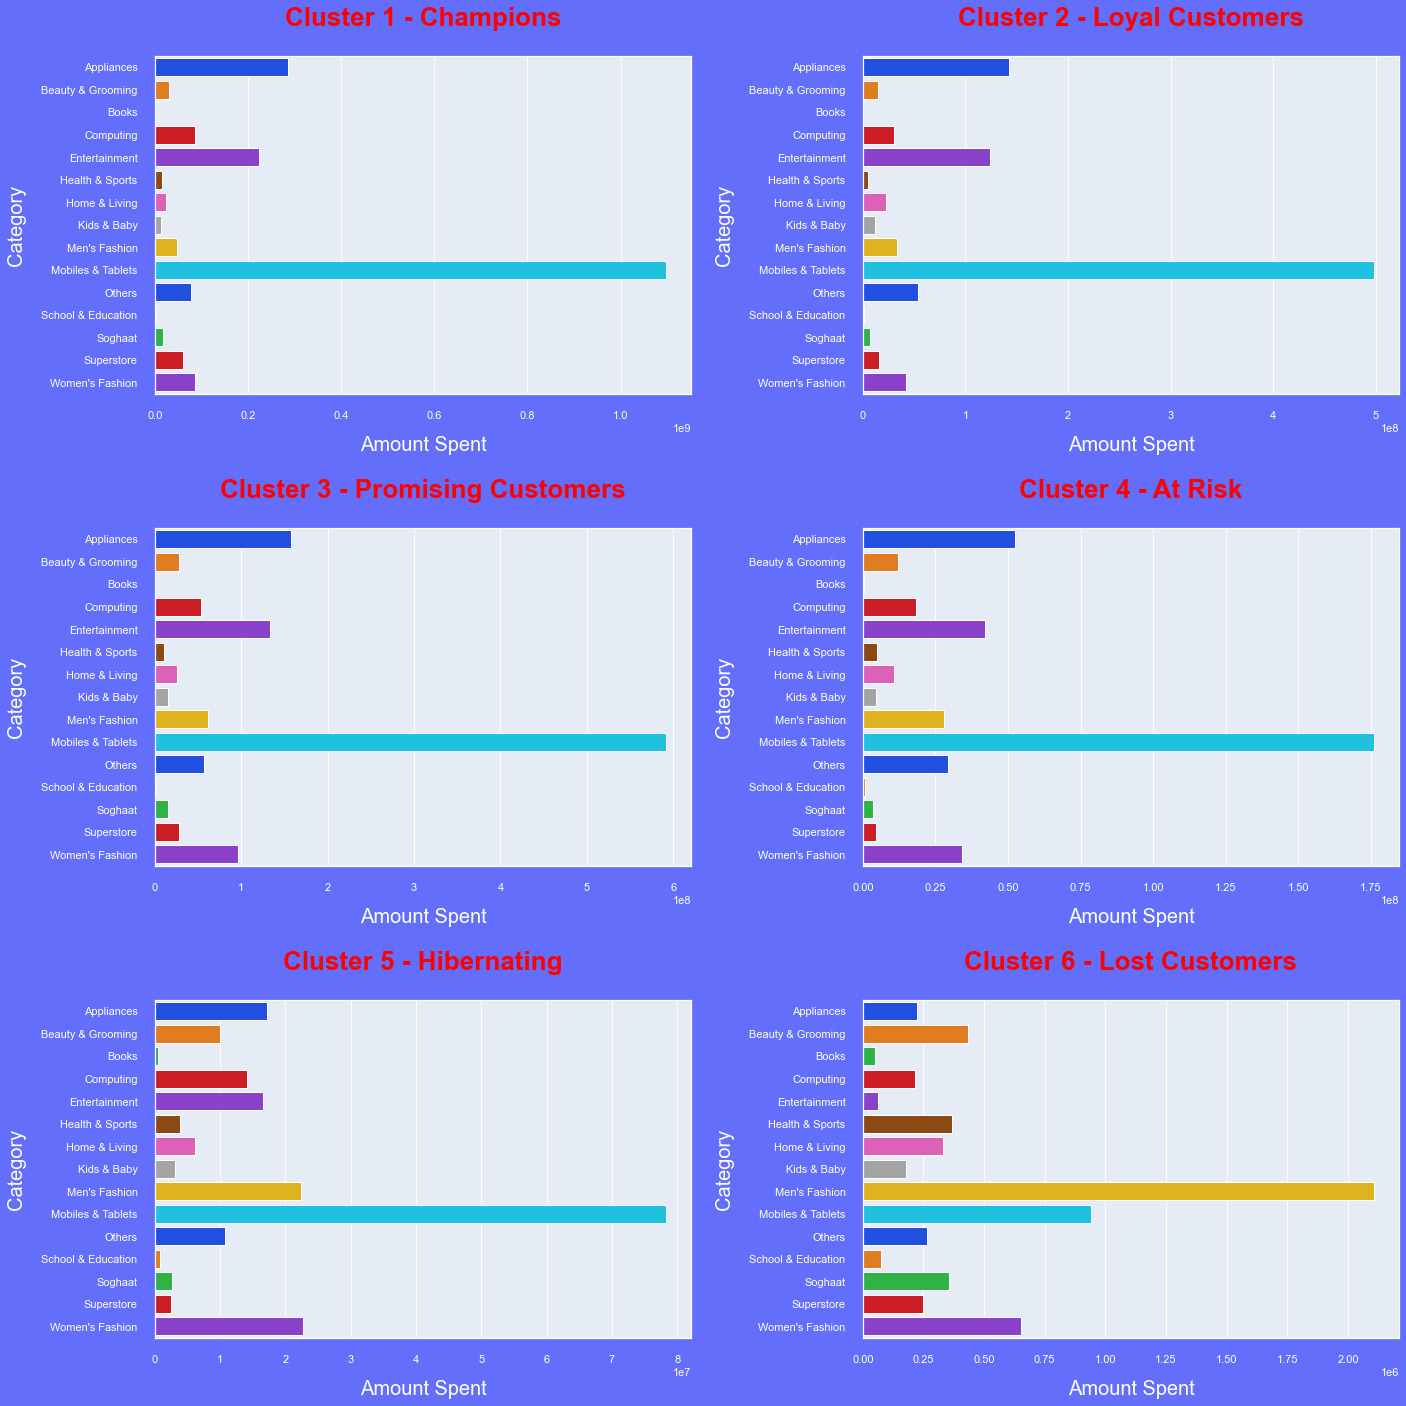

In [244]:
sns.set(rc={'axes.facecolor':'#e5ecf6', 'figure.facecolor':'#636efa', 'axes.grid' : True})

fig, ax = plt.subplots(3,2, figsize = (20,20))
sns.barplot(ax = ax[0,0], data = cluster1, y=cluster1.Category, x=cluster1.Grand_total_Cluster1, palette= 'bright')
sns.barplot(ax = ax[0,1], data = cluster2, y=cluster2.Category, x=cluster2.Grand_total_Cluster2, palette= 'bright')
sns.barplot(ax = ax[1,0], data = cluster3, y=cluster3.Category, x=cluster3.Grand_total_Cluster3, palette= 'bright')
sns.barplot(ax = ax[1,1], data = cluster4, y=cluster4.Category, x=cluster4.Grand_total_Cluster4, palette= 'bright')
sns.barplot(ax = ax[2,0], data = cluster5, y=cluster5.Category, x=cluster5.Grand_total_Cluster5, palette= 'bright')
sns.barplot(ax = ax[2,1], data = cluster6, y=cluster6.Category, x=cluster6.Grand_total_Cluster6, palette= 'bright')

ax[0,0].set_title("Cluster 1 - Champions", fontsize = 26, pad = 30, color='red', fontweight='bold')
ax[0,0].set_xlabel("Amount Spent", fontsize = 20, labelpad = 15, color='white')
ax[0,0].set_ylabel("Category", fontsize = 20, labelpad = 15, color='white')
ax[0,0].tick_params(axis='x', colors='white')
ax[0,0].tick_params(axis='y', colors='white')

ax[0,1].set_title("Cluster 2 - Loyal Customers", fontsize = 26, pad = 30, color='red', fontweight='bold')
ax[0,1].set_xlabel("Amount Spent", fontsize = 20, labelpad = 15, color='white')
ax[0,1].set_ylabel("Category", fontsize = 20, labelpad = 15, color='white')
ax[0,1].tick_params(axis='x', colors='white')
ax[0,1].tick_params(axis='y', colors='white')

ax[1,0].set_title("Cluster 3 - Promising Customers", fontsize = 26, pad = 30, color='red', fontweight='bold')
ax[1,0].set_xlabel("Amount Spent", fontsize = 20, labelpad = 15, color='white')
ax[1,0].set_ylabel("Category", fontsize = 20, labelpad = 15, color='white')
ax[1,0].tick_params(axis='x', colors='white')
ax[1,0].tick_params(axis='y', colors='white')

ax[1,1].set_title("Cluster 4 - At Risk", fontsize = 26, pad = 30, color='red', fontweight='bold')
ax[1,1].set_xlabel("Amount Spent", fontsize = 20, labelpad = 15, color='white')
ax[1,1].set_ylabel("Category", fontsize = 20, labelpad = 15, color='white')
ax[1,1].tick_params(axis='x', colors='white')
ax[1,1].tick_params(axis='y', colors='white')

ax[2,0].set_title("Cluster 5 - Hibernating", fontsize = 26, pad = 30, color='red', fontweight='bold')
ax[2,0].set_xlabel("Amount Spent", fontsize = 20, labelpad = 15, color='white')
ax[2,0].set_ylabel("Category", fontsize = 20, labelpad = 15, color='white')
ax[2,0].tick_params(axis='x', colors='white')
ax[2,0].tick_params(axis='y', colors='white')

ax[2,1].set_title("Cluster 6 - Lost Customers", fontsize = 26, pad = 30, color='red', fontweight='bold')
ax[2,1].set_xlabel("Amount Spent", fontsize = 20, labelpad = 15, color='white')
ax[2,1].set_ylabel("Category", fontsize = 20, labelpad = 15, color='white')
ax[2,1].tick_params(axis='x', colors='white')
ax[2,1].tick_params(axis='y', colors='white')

plt.tight_layout(pad=2);

Les deux principaux groupes de dépenses, les clients Champions et les Clients fidèles, ont dépensé la majeure partie de leur argent dans les téléphones portables et les tablettes, les appareils électroménagers et les divertissements
Les groupes de dépenses assez bons, les clients prometteurs et à risque, ont également dépensé de l'argent pour la mode masculine et féminine, à l'exception des mobiles et tablettes, des appareils électroménagers et du divertissement
Les clusters les moins dépensiers, les clients en hibernation et les clients perdus, ont dépensé plus pour les mobiles et les tablettes et la mode masculine

5.3.5 RFM par payement

In [246]:
cluster1_payment = df[df.Cluster == 'Champions'].payment_method.value_counts().to_frame().reset_index()
cluster1_payment.columns = ['Category', 'Payment_method_Cluster1']

cluster2_payment = df[df.Cluster == 'Clients fidèles'].payment_method.value_counts().to_frame().reset_index()
cluster2_payment.columns = ['Category', 'Payment_method_Cluster2']

cluster3_payment = df[df.Cluster == 'Prometteur'].payment_method.value_counts().to_frame().reset_index()
cluster3_payment.columns = ['Category', 'Payment_method_Cluster3']

cluster4_payment = df[df.Cluster == 'A risque'].payment_method.value_counts().to_frame().reset_index()
cluster4_payment.columns = ['Category', 'Payment_method_Cluster4']

cluster5_payment = df[df.Cluster == 'Hibernating'].payment_method.value_counts().to_frame().reset_index()
cluster5_payment.columns = ['Category', 'Payment_method_Cluster5']

cluster6_payment = df[df.Cluster == 'Client perdu'].payment_method.value_counts().to_frame().reset_index()
cluster6_payment.columns = ['Category', 'Payment_method_Cluster6']

merged_payment = cluster1_payment.merge(cluster2_payment, how='left').merge(cluster3_payment, how='left').merge(cluster4_payment, how='left').merge(cluster5_payment, how='left').merge(cluster6_payment, how='left')

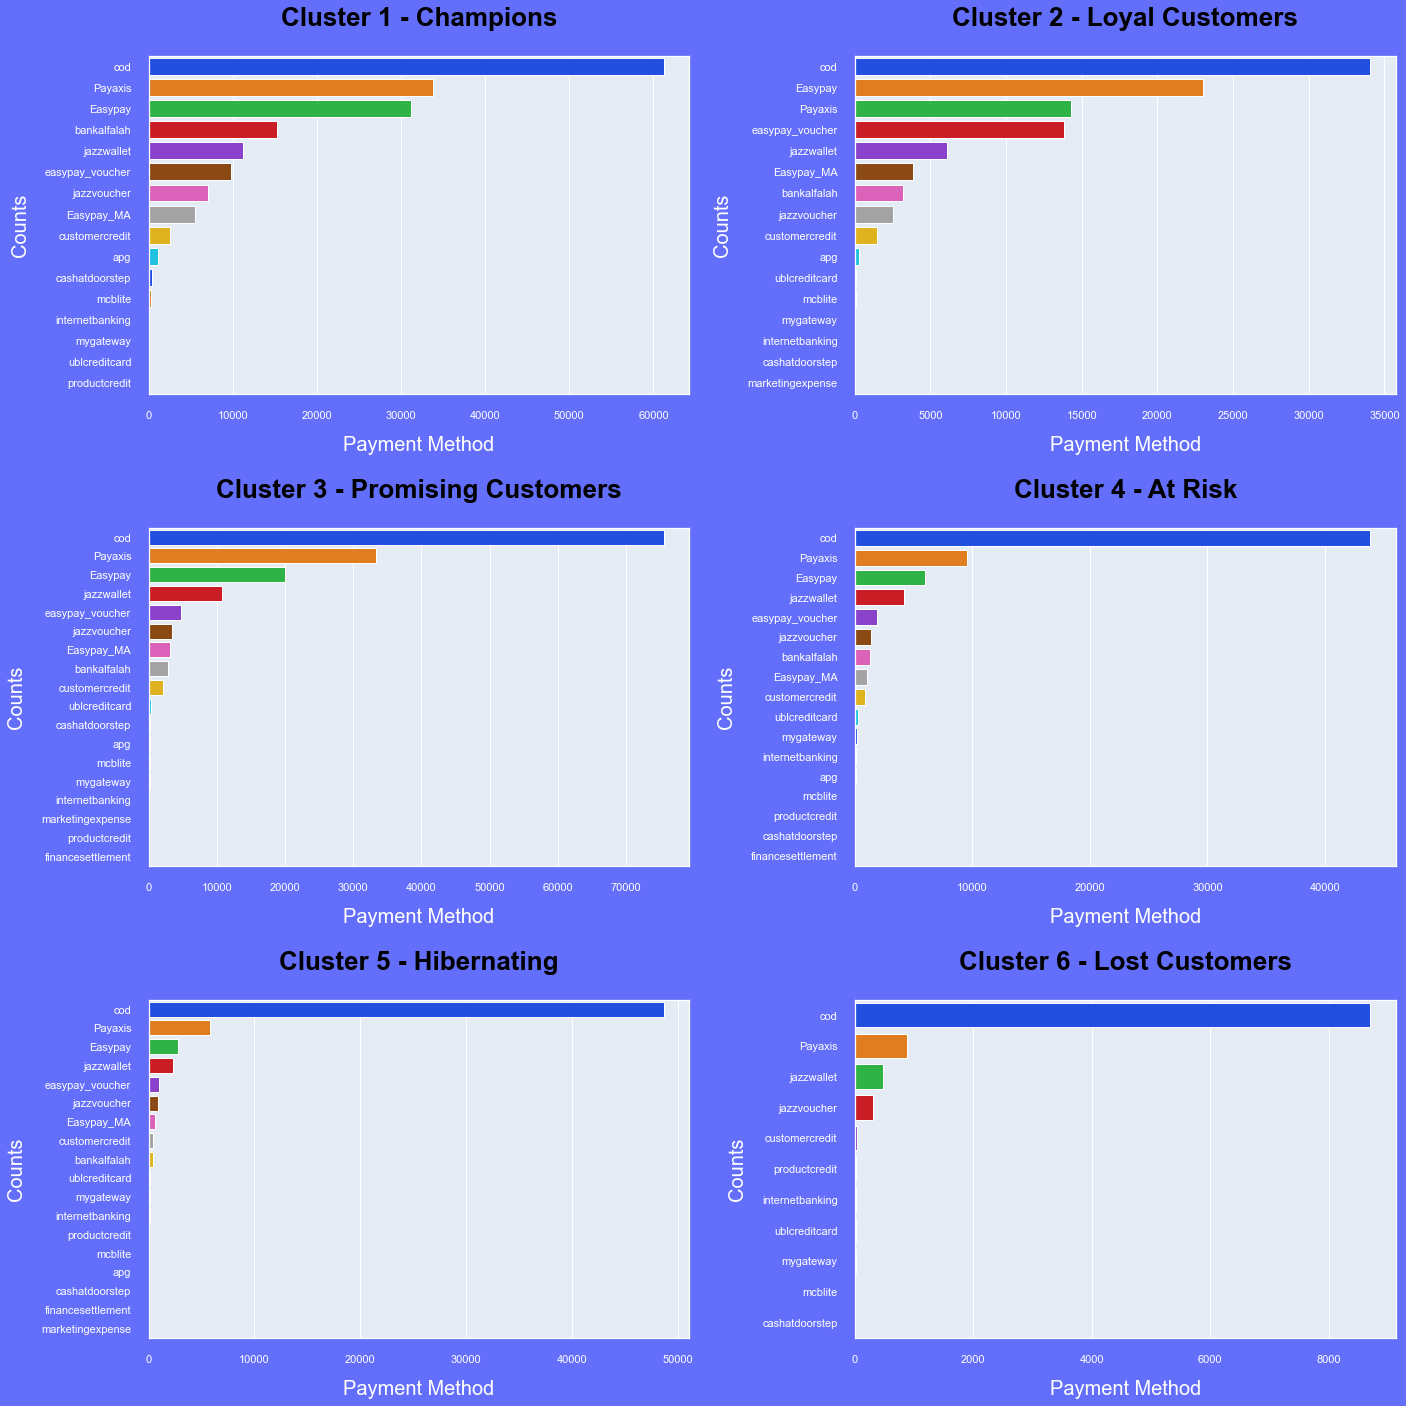

In [247]:
sns.set(rc={'axes.facecolor':'#e5ecf6', 'figure.facecolor':'#636efa', 'axes.grid' : True})

fig, ax = plt.subplots(3,2, figsize = (20,20))
sns.barplot(ax = ax[0,0], data = cluster1_payment, y=cluster1_payment.Category, x=cluster1_payment.Payment_method_Cluster1, palette= 'bright')
sns.barplot(ax = ax[0,1], data = cluster2_payment, y=cluster2_payment.Category, x=cluster2_payment.Payment_method_Cluster2, palette= 'bright')
sns.barplot(ax = ax[1,0], data = cluster3_payment, y=cluster3_payment.Category, x=cluster3_payment.Payment_method_Cluster3, palette= 'bright')
sns.barplot(ax = ax[1,1], data = cluster4_payment, y=cluster4_payment.Category, x=cluster4_payment.Payment_method_Cluster4, palette= 'bright')
sns.barplot(ax = ax[2,0], data = cluster5_payment, y=cluster5_payment.Category, x=cluster5_payment.Payment_method_Cluster5, palette= 'bright')
sns.barplot(ax = ax[2,1], data = cluster6_payment, y=cluster6_payment.Category, x=cluster6_payment.Payment_method_Cluster6, palette= 'bright')

ax[0,0].set_title("Cluster 1 - Champions", fontsize = 26, pad = 30, color='black', fontweight='bold')
ax[0,0].set_xlabel("Payment Method", fontsize = 20, labelpad = 15, color='white')
ax[0,0].set_ylabel("Counts", fontsize = 20, labelpad = 15, color='white')
ax[0,0].tick_params(axis='x', colors='white')
ax[0,0].tick_params(axis='y', colors='white')

ax[0,1].set_title("Cluster 2 - Loyal Customers", fontsize = 26, pad = 30, color='black', fontweight='bold')
ax[0,1].set_xlabel("Payment Method", fontsize = 20, labelpad = 15, color='white')
ax[0,1].set_ylabel("Counts", fontsize = 20, labelpad = 15, color='white')
ax[0,1].tick_params(axis='x', colors='white')
ax[0,1].tick_params(axis='y', colors='white')

ax[1,0].set_title("Cluster 3 - Promising Customers", fontsize = 26, pad = 30, color='black', fontweight='bold')
ax[1,0].set_xlabel("Payment Method", fontsize = 20, labelpad = 15, color='white')
ax[1,0].set_ylabel("Counts", fontsize = 20, labelpad = 15, color='white')
ax[1,0].tick_params(axis='x', colors='white')
ax[1,0].tick_params(axis='y', colors='white')

ax[1,1].set_title("Cluster 4 - At Risk", fontsize = 26, pad = 30, color='black', fontweight='bold')
ax[1,1].set_xlabel("Payment Method", fontsize = 20, labelpad = 15, color='white')
ax[1,1].set_ylabel("Counts", fontsize = 20, labelpad = 15, color='white')
ax[1,1].tick_params(axis='x', colors='white')
ax[1,1].tick_params(axis='y', colors='white')

ax[2,0].set_title("Cluster 5 - Hibernating", fontsize = 26, pad = 30, color='black', fontweight='bold')
ax[2,0].set_xlabel("Payment Method", fontsize = 20, labelpad = 15, color='white')
ax[2,0].set_ylabel("Counts", fontsize = 20, labelpad = 15, color='white')
ax[2,0].tick_params(axis='x', colors='white')
ax[2,0].tick_params(axis='y', colors='white')

ax[2,1].set_title("Cluster 6 - Lost Customers", fontsize = 26, pad = 30, color='black', fontweight='bold')
ax[2,1].set_xlabel("Payment Method", fontsize = 20, labelpad = 15, color='white')
ax[2,1].set_ylabel("Counts", fontsize = 20, labelpad = 15, color='white')
ax[2,1].tick_params(axis='x', colors='white')
ax[2,1].tick_params(axis='y', colors='white')

plt.tight_layout(pad=2);

 Le paiement à la livraison (cod), Payaxis, Easypay et Jazzwallet sont les méthodes de paiement les plus connues parmi tous les clusters

5.3.6 RFM par status

In [248]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 584524 entries, 0 to 584523
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   item_id                584524 non-null  object        
 1   status                 584524 non-null  object        
 2   created_at             584524 non-null  datetime64[ns]
 3   sku                    584524 non-null  object        
 4   price                  584524 non-null  float64       
 5   qty_ordered            584524 non-null  int32         
 6   grand_total            584524 non-null  float64       
 7   increment_id           584524 non-null  object        
 8   category_name          584524 non-null  object        
 9   sales_commission_code  584524 non-null  object        
 10  discount_amount        584524 non-null  float64       
 11  payment_method         584524 non-null  object        
 12  Working Date           584524 non-null  date

In [249]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

completed_orders = df[df.status == 'Completed'].Cluster.value_counts().to_frame().reset_index()
completed_orders.columns = ['Cluster', 'Order_Counts']

pending_orders = df[df.status == 'Pending'].Cluster.value_counts().to_frame().reset_index()
pending_orders.columns = ['Cluster', 'Order_Counts']


fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]], subplot_titles=['Completed Orders', 'Pending Orders'])

fig.add_trace(go.Pie(labels=completed_orders.Cluster, values=completed_orders.Order_Counts),1, 1)

fig.add_trace(go.Pie(labels=pending_orders.Cluster, values=pending_orders.Order_Counts),1, 2)


fig.update_traces(textposition='inside', textinfo='percent+label', textfont_size=20,
                  marker = dict(line = dict(color = 'white', width = 6)))

fig.update_layout(template='plotly_dark', height=600, width=1000)
fig.show()

Les clients Champions, Fidèles et Prometteurs ont commandé le plus

Conclusions

• La moitié des clients ont passé une seule commande
• Environ 45% des clients ont annulé leurs commandes
• La moitié des commandes ont été annulées
• Parmi les différents groupes de clients, les clients Champions, Fidèles et Prometteurs ont dépensé le plus d'argent, acheté plus fréquemment et dans un passé proche
• 40 % des clients appartiennent au groupe Hibernation
• Les catégories de produits les plus connues parmi tous les clusters sont : les mobiles et les tablettes, la mode masculine, la mode féminine, les grandes surfaces et les appareils électroménagers.
• Les clients ont dépensé la majeure partie de leur argent dans les téléphones portables et les tablettes, la mode masculine, les appareils électroménagers, le divertissement et la mode féminine
• Le paiement à la livraison (cod), Payaxis, Easypay et Jazzwallet sont les méthodes de paiement les plus connues parmi tous les clusters

# 6.La « Segmentation » RFM

**Récence** 

In [250]:
# détermine les nombres et des clients uniques
unique_customers = df['customer_id'].nunique()
print('nombres et des clients uniques:', unique_customers)
# détermine les nombres des clientes fréquents (les clients fidèles)
frequent_customers = len(df['customer_id']) - unique_customers 
print('nombres et des clients fidèles:', frequent_customers)
frequent_customers_IDs = df["customer_id"][df["customer_id"].duplicated(keep = 'first')] #use keep = 'firts' or keep = 'last' #it drops duplicates and keeps only one
print(len(frequent_customers_IDs))


nombres et des clients uniques: 115327
nombres et des clients fidèles: 469197
469197


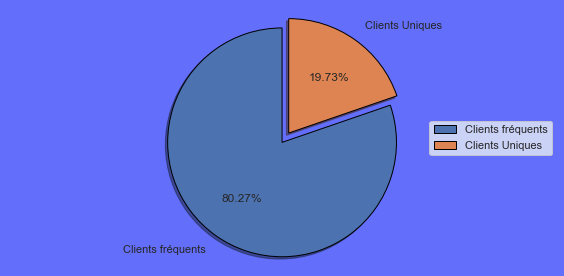

In [251]:
plt.figure(figsize = (8, 4))

values = [frequent_customers, unique_customers]
labels = ['Clients fréquents', 'Clients Uniques']


plt.pie(values, 
        labels = labels, 
        labeldistance = 1.15, 
        explode = (0, 0.1), 
        wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'black'},#
        autopct = '%1.2f%%',
        shadow = True, 
        startangle = 90)

plt.legend(labels, loc = "right")
plt.axis('equal') 
plt.tight_layout()
plt.show()

La date du dernier achat. Notez bien que l’on part du principe qu’une personne qui a acheté récemment chez vous a plus de chances de revenir commander chez nous.
* Customer Since - created_at*

In [252]:
from datetime import datetime
 
df_2["created_at"]= pd.to_datetime(df_2["created_at"]) #transformation en type date
reference_date= pd.to_datetime('1/1/2019')            #on va partir sur analyse à la fin de l'année 2018
RFM_recence = df_2
RFM_recence = RFM_recence.groupby(by = 'customer_id', as_index=False)["created_at"].max() #groupage par customer et max date
RFM_recence.columns = ['customer_id', 'max_Date'] #creation DataFrame par ID avec la date du dernier achat
RFM_recence['Recence'] = RFM_recence['max_Date'].apply(lambda row: (reference_date - row).days)  #calcule de recence 
RFM_recence.drop('max_Date', inplace =True, axis = 1)
RFM_recence

customer_id  Recence
0              0.0      292
1              1.0      914
2              3.0      592
3              4.0      127
4              6.0      914
...            ...      ...
79361     115318.0      126
79362     115320.0      126
79363     115323.0      126
79364     115324.0      126
79365     115325.0      126

[79366 rows x 2 columns]

**Fréquance**

Le nombre d'achat réalisé sur une période donnée. Plus un client achète régulièrement chez nous, de plus il y a de chances pour qu’il achète à nouveau. on analyse ici le niveau de fidélité.

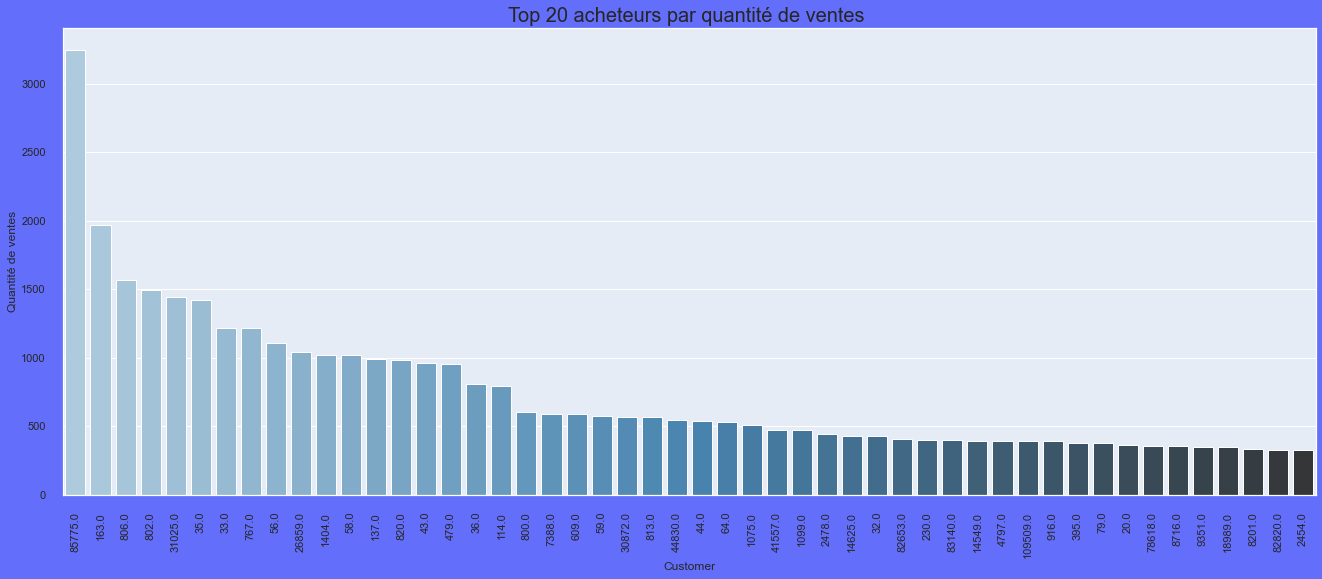

In [253]:
df_2['customer_id'].value_counts()
customer_qty = df_2['qty_ordered'].groupby(df_2['customer_id']).agg('sum').sort_values(ascending=False).head(50)
customer_qty
plt.figure(figsize=(20, 8))
order_list_cus = list(customer_qty.sort_values(ascending=False).index)
sns.barplot(x=customer_qty.index, y=customer_qty.values, order = order_list_cus,   palette='Blues_d')
plt.title(label='Top 20 acheteurs par quantité de ventes ', fontsize=20)
plt.xlabel('Customer', fontsize=12)
plt.ylabel("Quantité de ventes", fontsize=12)

plt.xticks(rotation=90);


In [254]:
qty_cde = df_2.groupby('customer_id')['increment_id'].agg('count').sort_values(ascending=False)  #calcule de nomre d'achat par client

RFM_freq = pd.DataFrame(list(qty_cde.items()), columns=['customer_id', 'Frequance'])
RFM_freq



customer_id  Frequance
0          85775.0       2136
1            163.0       1843
2             35.0       1393
3          31025.0       1062
4             33.0       1032
...            ...        ...
79361      68862.0          1
79362      28315.0          1
79363      28312.0          1
79364      28311.0          1
79365          0.0          1

[79366 rows x 2 columns]

**Montant**

 Montant : la somme des achats cumulés sur une période donnée. Les gros acheteurs répondent mieux que les petits. On mesure ici la valeur client.
 *  grand_total* 

Analyse des CA par client = montant

In [255]:
RFM_mont = df_2.groupby(by = 'customer_id', as_index=False)["total_price_wt_disc"].sum()
RFM_mont = RFM_mont.rename(columns = {'total_price_wt_disc':'Montant'})
RFM_mont


customer_id     Montant
0              0.0    160.0000
1              1.0     19.5000
2              3.0     12.4500
3              4.0  12897.8825
4              6.0      1.7000
...            ...         ...
79361     115318.0     16.3875
79362     115320.0      6.9900
79363     115323.0    441.9900
79364     115324.0      3.9900
79365     115325.0      8.9900

[79366 rows x 2 columns]

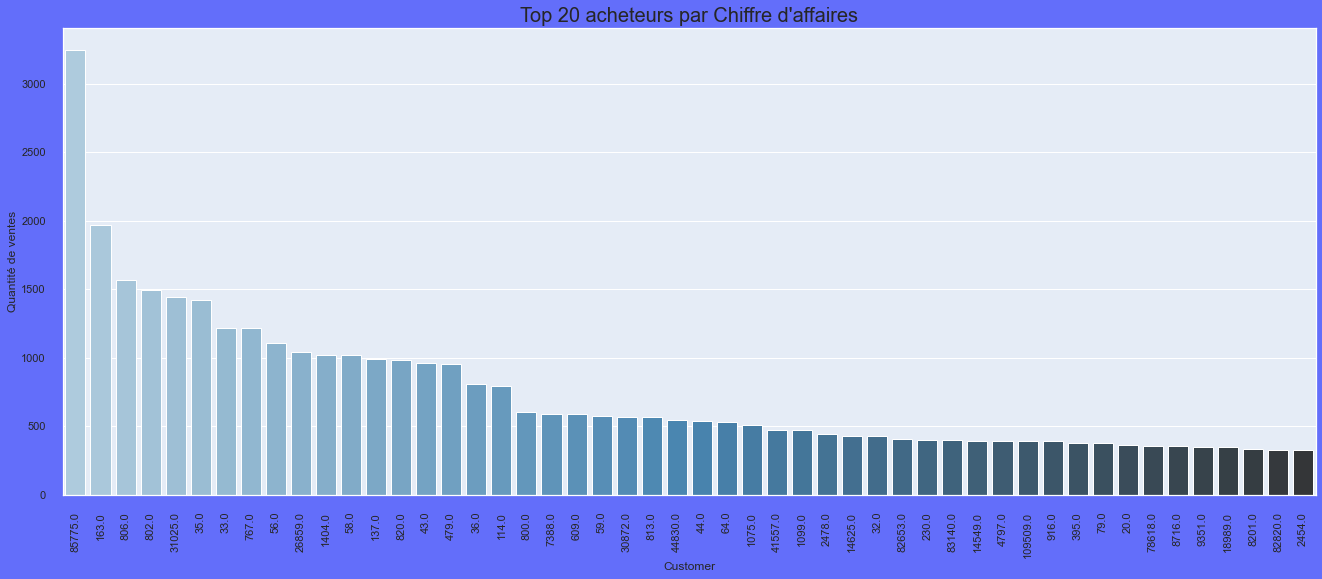

In [256]:
df_2['customer_id'].value_counts()
customer_CA = df_2['total_price_wt_disc'].groupby(df_2['customer_id']).agg('sum').sort_values(ascending=False).head(50)

plt.figure(figsize=(20, 8))
order_list_cus = list(customer_qty.sort_values(ascending=False).index)
sns.barplot(x=customer_qty.index, y=customer_qty.values, order = order_list_cus,   palette='Blues_d')
plt.title(label="Top 20 acheteurs par Chiffre d'affaires", fontsize=20)
plt.xlabel('Customer', fontsize=12)
plt.ylabel("Quantité de ventes", fontsize=12)

plt.xticks(rotation=90);


In [258]:
RFM_fin = RFM_recence.merge(RFM_freq,  on  = 'customer_id')


In [259]:
RFM = RFM_fin.merge(RFM_mont,  on  = 'customer_id')
RFM.set_index('customer_id', inplace = True)
RFM

Recence  Frequance     Montant
customer_id                                
0.0              292          1    160.0000
1.0              914          1     19.5000
3.0              592          4     12.4500
4.0              127        264  12897.8825
6.0              914          1      1.7000
...              ...        ...         ...
115318.0         126          1     16.3875
115320.0         126          1      6.9900
115323.0         126          1    441.9900
115324.0         126          1      3.9900
115325.0         126          2      8.9900

[79366 rows x 3 columns]

In [260]:
RFM['Frequance'].unique()

array([   1,    4,  264,    2,    3,  133,   32,   74,   10,  257,    9,
          8,   35,   97,  382, 1032, 1393,  750,    7,  212,  915,  507,
         52,    5,   30,  744,  904,  487,   19,  437,  259,   59,    6,
         70,  365,   48,  215,   12,   26,   41,   29,   64,   82,  664,
         37,   91,   63,   22,  570,   11,  104,   78,   18, 1843,  182,
         25,   24,  151,   34,   80,   13,  202,  166,  162,   45,  360,
         44,   14,  115,   57,   16,   15,   49,  139,   81,  121,   36,
         43,   23,   28,  100,   51,  375,   17,  219,   20,  106,  398,
         21,   86,   65,  231,  148,   31,   27,  928,   33,  560,  322,
        936,   66,  538,  901,   47,  363,  149,   58,  200,  412,  461,
         79,   89,   60,   62,  210,  945,   42,  123,   40,  122,   56,
         39,  138,   38,   93,   55,   53,   95,   67,   50,  156,  185,
        237,  346,   88,  147,  225,  129,   87,  112,   46,   92,   72,
        105,  102,  136,   76,  101,  132,  286,  1

In [261]:
RFM['F_score'] = pd.cut(RFM['Frequance'], [0, 100, 250, 600,  np.inf], labels=['1', '2','3', '4']) #attribution de scor de 1 à 3 pour la frequance 1 = le nombre d'achat moins important
RFM

Recence  Frequance     Montant F_score
customer_id                                        
0.0              292          1    160.0000       1
1.0              914          1     19.5000       1
3.0              592          4     12.4500       1
4.0              127        264  12897.8825       3
6.0              914          1      1.7000       1
...              ...        ...         ...     ...
115318.0         126          1     16.3875       1
115320.0         126          1      6.9900       1
115323.0         126          1    441.9900       1
115324.0         126          1      3.9900       1
115325.0         126          2      8.9900       1

[79366 rows x 4 columns]

In [262]:
RFM['Montant'].describe()

count    79366.000000
mean       151.439102
std        631.146051
min         -8.900000
25%          9.500000
50%         22.773750
75%         95.677500
max      33786.265700
Name: Montant, dtype: float64

In [263]:
RFM['M_score'] = pd.qcut(RFM['Montant'], q=4,  labels=['1', '2', '3', '4']) #attribution de score de 1 à 3 pour le montant 1 = les montants les moins élevé 
RFM

Recence  Frequance     Montant F_score M_score
customer_id                                                
0.0              292          1    160.0000       1       4
1.0              914          1     19.5000       1       2
3.0              592          4     12.4500       1       2
4.0              127        264  12897.8825       3       4
6.0              914          1      1.7000       1       1
...              ...        ...         ...     ...     ...
115318.0         126          1     16.3875       1       2
115320.0         126          1      6.9900       1       1
115323.0         126          1    441.9900       1       4
115324.0         126          1      3.9900       1       1
115325.0         126          2      8.9900       1       1

[79366 rows x 5 columns]

In [264]:
RFM['R_score'] = pd.qcut(RFM['Recence'], q=4,  labels=['4', '3', '2','1']) #attribution de score de 1 à 3 pour le recence 1 = les dates d'achat le plus éloigné
RFM

Recence  Frequance     Montant F_score M_score R_score
customer_id                                                        
0.0              292          1    160.0000       1       4       4
1.0              914          1     19.5000       1       2       1
3.0              592          4     12.4500       1       2       2
4.0              127        264  12897.8825       3       4       4
6.0              914          1      1.7000       1       1       1
...              ...        ...         ...     ...     ...     ...
115318.0         126          1     16.3875       1       2       4
115320.0         126          1      6.9900       1       1       4
115323.0         126          1    441.9900       1       4       4
115324.0         126          1      3.9900       1       1       4
115325.0         126          2      8.9900       1       1       4

[79366 rows x 6 columns]

In [265]:
RFM['RFM_score'] = RFM['R_score'].astype('int') + RFM['F_score'].astype('int') + RFM['M_score'].astype('int')
RFM


Recence  Frequance     Montant F_score M_score R_score  RFM_score
customer_id                                                                   
0.0              292          1    160.0000       1       4       4          9
1.0              914          1     19.5000       1       2       1          4
3.0              592          4     12.4500       1       2       2          5
4.0              127        264  12897.8825       3       4       4         11
6.0              914          1      1.7000       1       1       1          3
...              ...        ...         ...     ...     ...     ...        ...
115318.0         126          1     16.3875       1       2       4          7
115320.0         126          1      6.9900       1       1       4          6
115323.0         126          1    441.9900       1       4       4          9
115324.0         126          1      3.9900       1       1       4          6
115325.0         126          2      8.9900       1       1       4          6

[79366 rows x 7 columns]

In [266]:
display(RFM['RFM_score'].describe())
display(RFM['RFM_score'].unique())

count    79366.000000
mean         6.003503
std          1.799868
min          3.000000
25%          5.000000
50%          6.000000
75%          7.000000
max         12.000000
Name: RFM_score, dtype: float64

array([ 9,  4,  5, 11,  3,  7,  8, 12, 10,  6])

**Création des  segments  **
`/n`
   

*   Champions = 12
*   Clients fidèles = 9-11
*   Clients prometteurs = 6-8
*   Clients à risque = 4-5
*   Clients perdus = 3   













In [267]:
RFM.loc[(RFM['RFM_score'] == 12.0), 'Segment'] = 'Champions'
RFM.loc[(RFM['RFM_score'] >= 9) & (RFM['RFM_score'] <= 11), 'Segment'] = 'Clients fidèles'
RFM.loc[(RFM['RFM_score'] >= 6) & (RFM['RFM_score'] <= 8), 'Segment'] = 'Clients prometteurs'
RFM.loc[(RFM['RFM_score'] >= 4) & (RFM['RFM_score'] <= 5), 'Segment'] = 'Clients à risque'
RFM.loc[(RFM['RFM_score'] == 3), 'Segment'] = 'Clients perdus'

RFM

Recence  Frequance     Montant F_score M_score R_score  \
customer_id                                                           
0.0              292          1    160.0000       1       4       4   
1.0              914          1     19.5000       1       2       1   
3.0              592          4     12.4500       1       2       2   
4.0              127        264  12897.8825       3       4       4   
6.0              914          1      1.7000       1       1       1   
...              ...        ...         ...     ...     ...     ...   
115318.0         126          1     16.3875       1       2       4   
115320.0         126          1      6.9900       1       1       4   
115323.0         126          1    441.9900       1       4       4   
115324.0         126          1      3.9900       1       1       4   
115325.0         126          2      8.9900       1       1       4   

             RFM_score              Segment  
customer_id                                  
0.0                  9      Clients fidèles  
1.0                  4     Clients à risque  
3.0                  5     Clients à risque  
4.0                 11      Clients fidèles  
6.0                  3       Clients perdus  
...                ...                  ...  
115318.0             7  Clients prometteurs  
115320.0             6  Clients prometteurs  
115323.0             9      Clients fidèles  
115324.0             6  Clients prometteurs  
115325.0             6  Clients prometteurs  

[79366 rows x 8 columns]

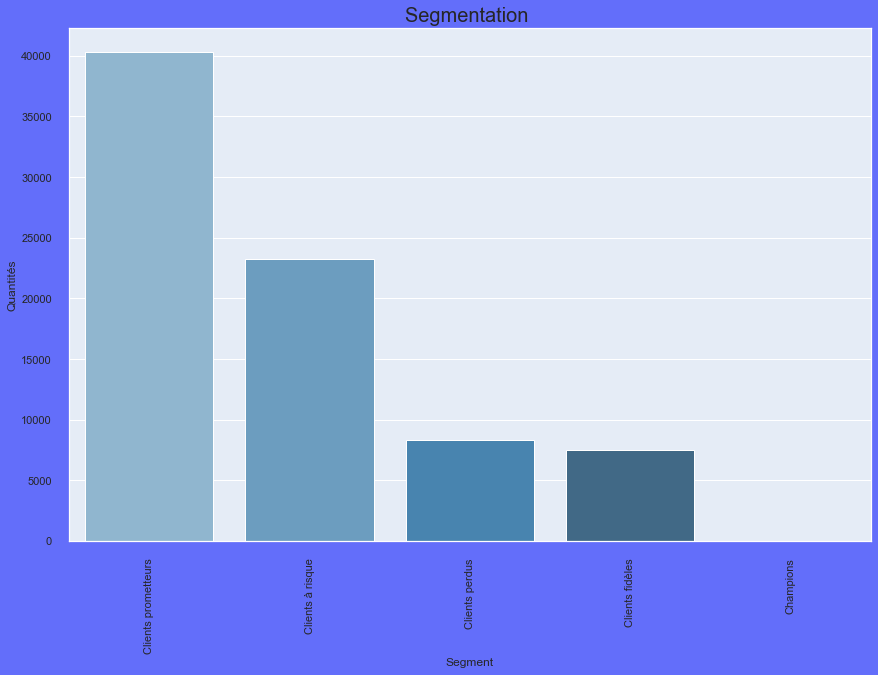

In [268]:
seg = RFM['Segment'].value_counts()

sns.barplot(x=seg.index, y=seg.values,  palette='Blues_d')
plt.title(label='Segmentation ', fontsize=20)
plt.xlabel('Segment', fontsize=12)
plt.ylabel("Quantités", fontsize=12)

plt.xticks(rotation=90);


In [270]:
RFM['Segment'].value_counts()

Clients prometteurs    40309
Clients à risque       23261
Clients perdus          8298
Clients fidèles         7491
Champions                  7
Name: Segment, dtype: int64

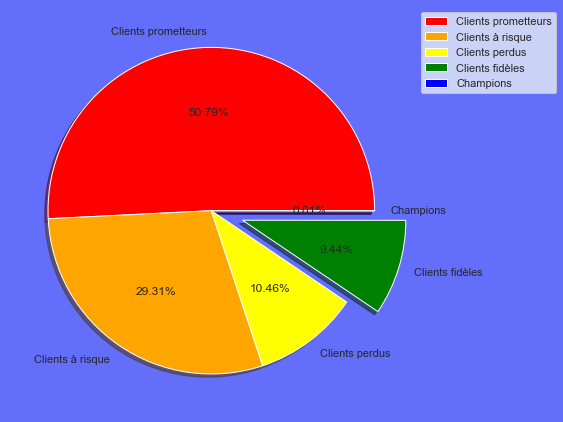

In [271]:
plt.figure(figsize = (7, 7))
plt.pie(x = seg.values, labels = seg.index,
       colors =['red', 'orange', 'yellow', 'green', 'blue', 'purple'],
        explode = [0, 0, 0, 0.2, 0],
        autopct = lambda x: str(round(x, 2)) + '%',
        pctdistance = 0.6, labeldistance = 1.1,
        shadow = True)
plt.legend(loc="upper left", bbox_to_anchor=(1, 1));


# 7.Machine learning timeseries

In [272]:
!pip install statsmodels --upgrade

In [273]:
!pip install --upgrade --no-deps seasonal

In [274]:
import sys
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm

import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
from scipy.optimize import minimize

import matplotlib.pyplot as plt

In [275]:
#creation d'un DataFrame avec les ventes
df_gr = df_2['qty_ordered'].groupby(df_2['created_at']).agg('sum')
df_prev = pd.DataFrame(list(df_gr.items()), columns=['created_at', 'qty_ordered'])
df_prev['created_at'] = pd.to_datetime(df_prev['created_at'])
df_prev



created_at  qty_ordered
0   2016-07-01        410.0
1   2016-07-02        165.0
2   2016-07-03        102.0
3   2016-07-04        165.0
4   2016-07-05        108.0
..         ...          ...
783 2018-08-24        197.0
784 2018-08-25        213.0
785 2018-08-26        109.0
786 2018-08-27        204.0
787 2018-08-28         34.0

[788 rows x 2 columns]

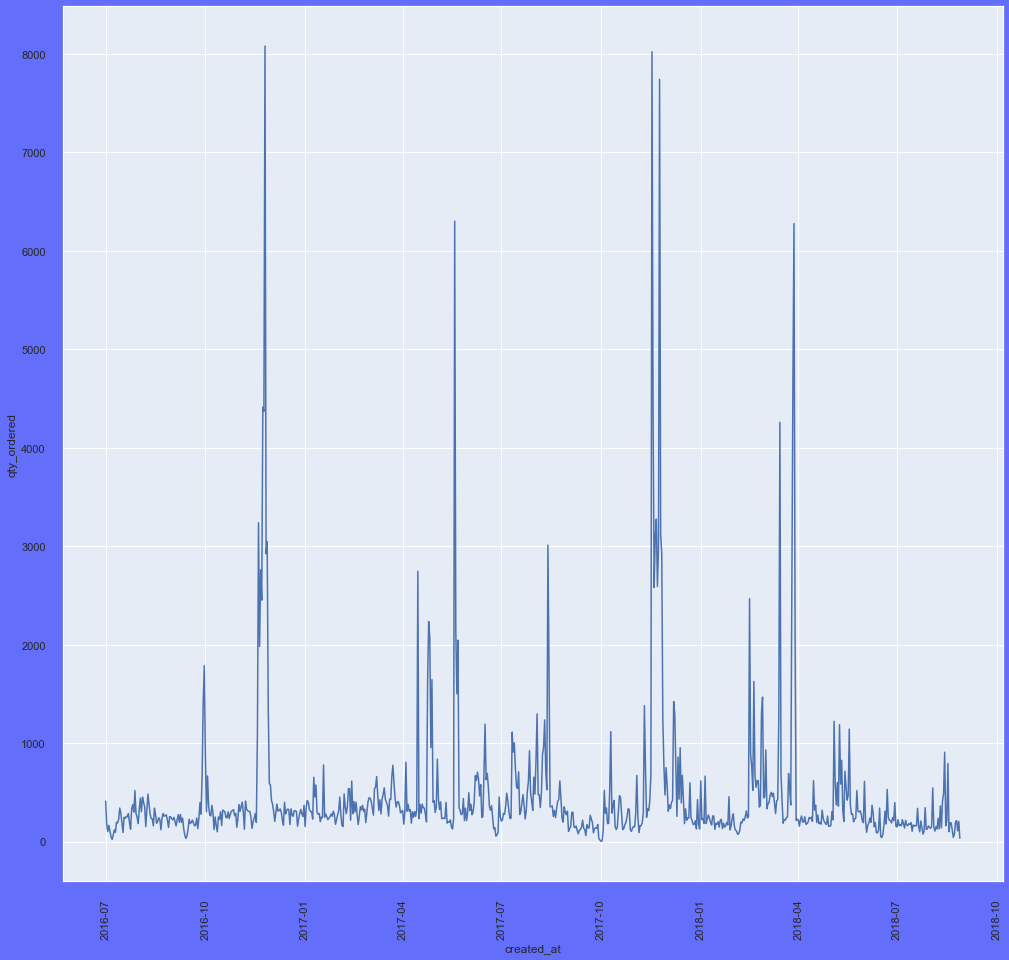

In [276]:
#affichage d'un graphique de ventes 
plt.figure(figsize=(15, 15))
sns.lineplot(x = "created_at", y = "qty_ordered",data= df_prev)
plt.xticks(rotation=90)
plt.show()

Recherche des tendances

In [277]:
from statsmodels.tsa.tsatools import detrend
notrend = detrend(df_prev['qty_ordered'])#La fonction detrend retourne la tendance. On l’obtient en réalisant une régression linéaire de Y sur le temps t.
df_prev["notrend"] = notrend
df_prev["trend"] = df_prev['qty_ordered'] - notrend
df_prev.tail()

created_at  qty_ordered     notrend       trend
783 2018-08-24        197.0 -272.303127  469.303127
784 2018-08-25        213.0 -256.295053  469.295053
785 2018-08-26        109.0 -360.286979  469.286979
786 2018-08-27        204.0 -265.278905  469.278905
787 2018-08-28         34.0 -435.270831  469.270831

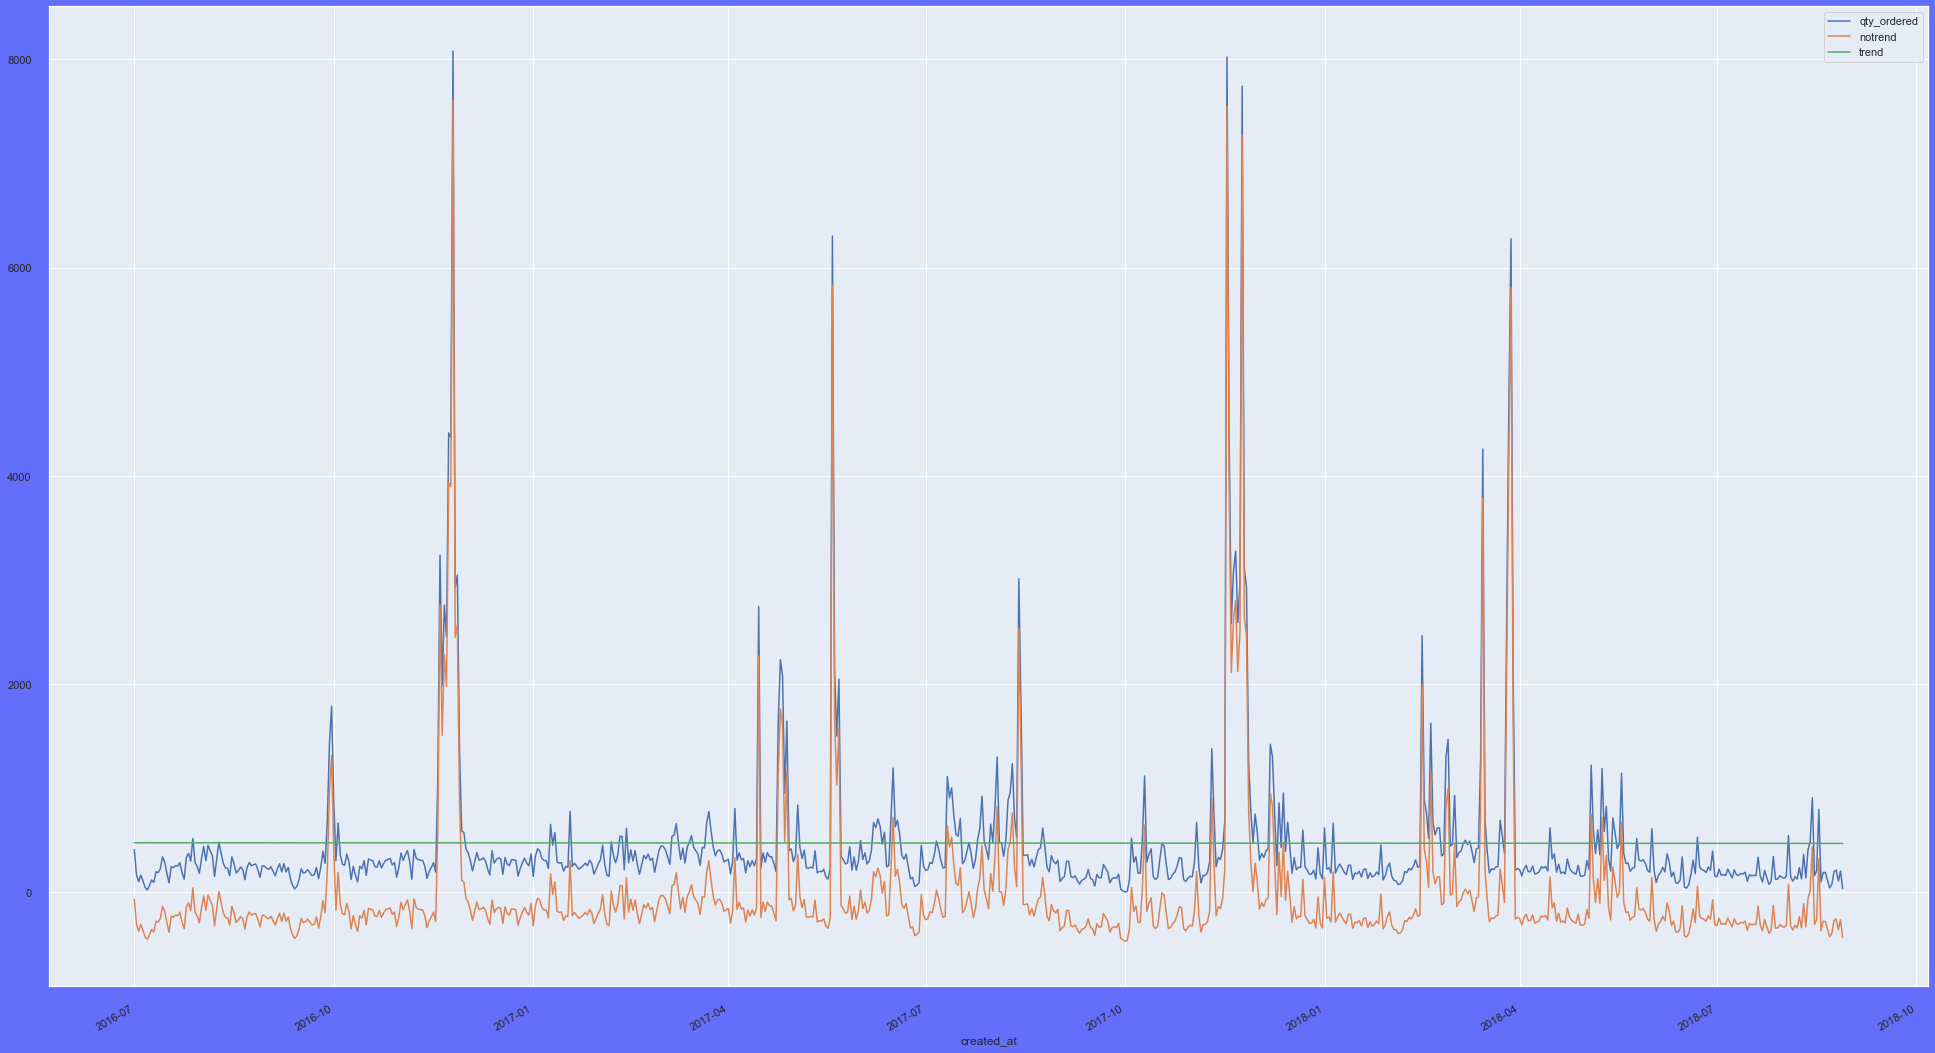

In [278]:
df_prev.plot( x= "created_at" , y=["qty_ordered", "notrend", "trend"], figsize=(30,20)); #affichage des trend et no trend

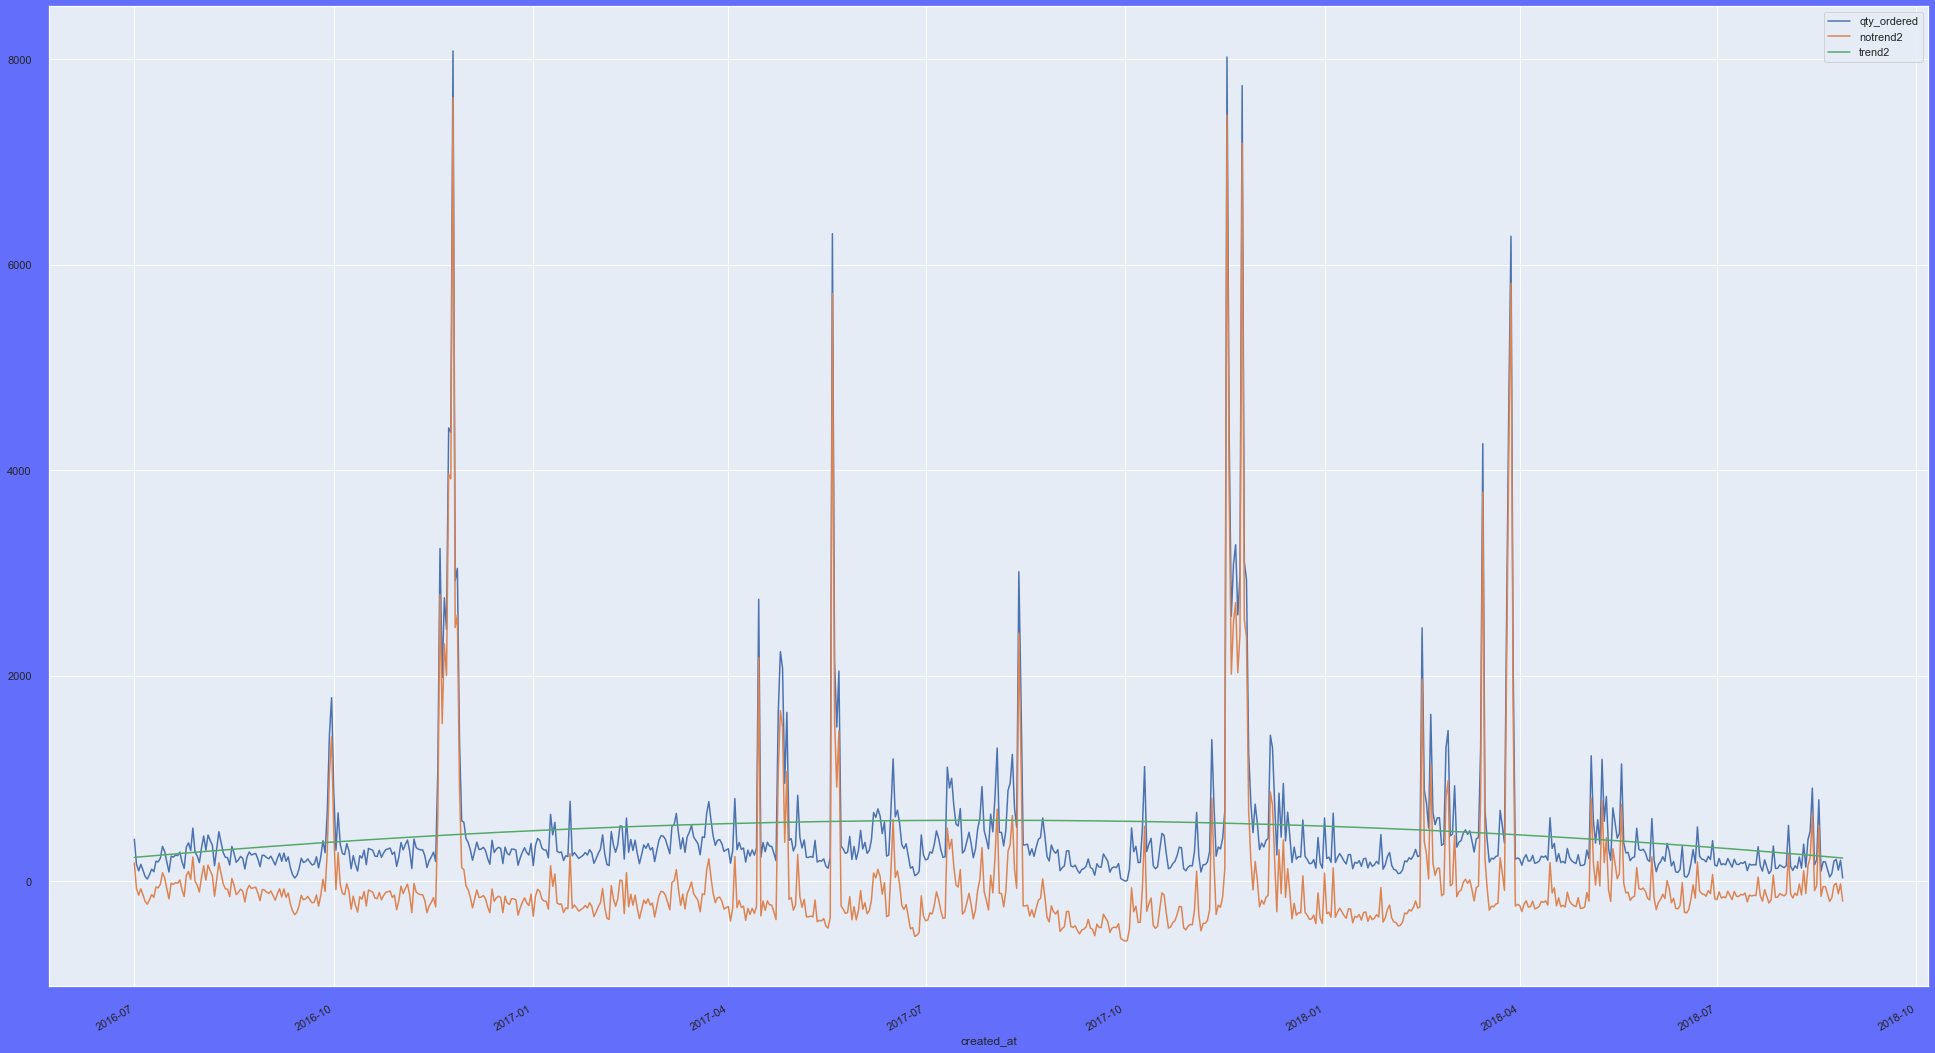

In [279]:
notrend2 = detrend(df_prev['qty_ordered'], order=2)    #On essaye de calculer une tendance en minimisant : Y=\alpha + \beta t + \gamma t^2
df_prev["notrend2"] = notrend2
df_prev["trend2"] = df_prev['qty_ordered'] - df_prev["notrend2"]
df_prev.plot( x= "created_at" , y=["qty_ordered", "notrend2", "trend2"], figsize=(30,20));

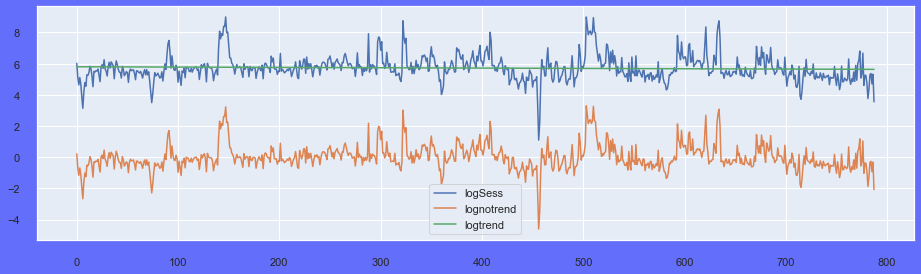

In [280]:
import numpy
df_prev["logSess"] = df_prev["qty_ordered"].apply(lambda x: numpy.log(x+1))
lognotrend = detrend(df_prev['logSess'])
df_prev["lognotrend"] = lognotrend
df_prev["logtrend"] = df_prev["logSess"] - df_prev["lognotrend"]
df_prev.plot(y=["logSess", "lognotrend", "logtrend"], figsize=(14,4));

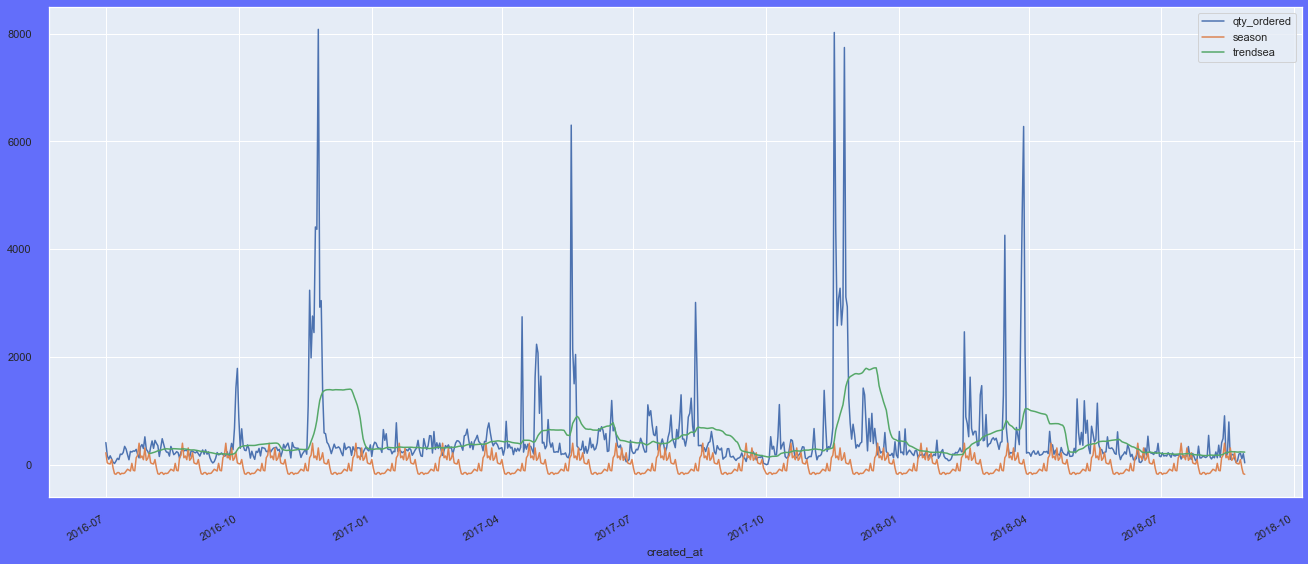

In [281]:
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
#si erreur changer period par freq:
res = seasonal_decompose(df_prev['qty_ordered'].values.ravel(), period=30, two_sided=False)  #extra la composante saisonnière
df_prev["season"] = res.seasonal
df_prev["trendsea"] = res.trend
df_prev.plot(x= "created_at", y=['qty_ordered', "season", "trendsea"], figsize=(20,10));

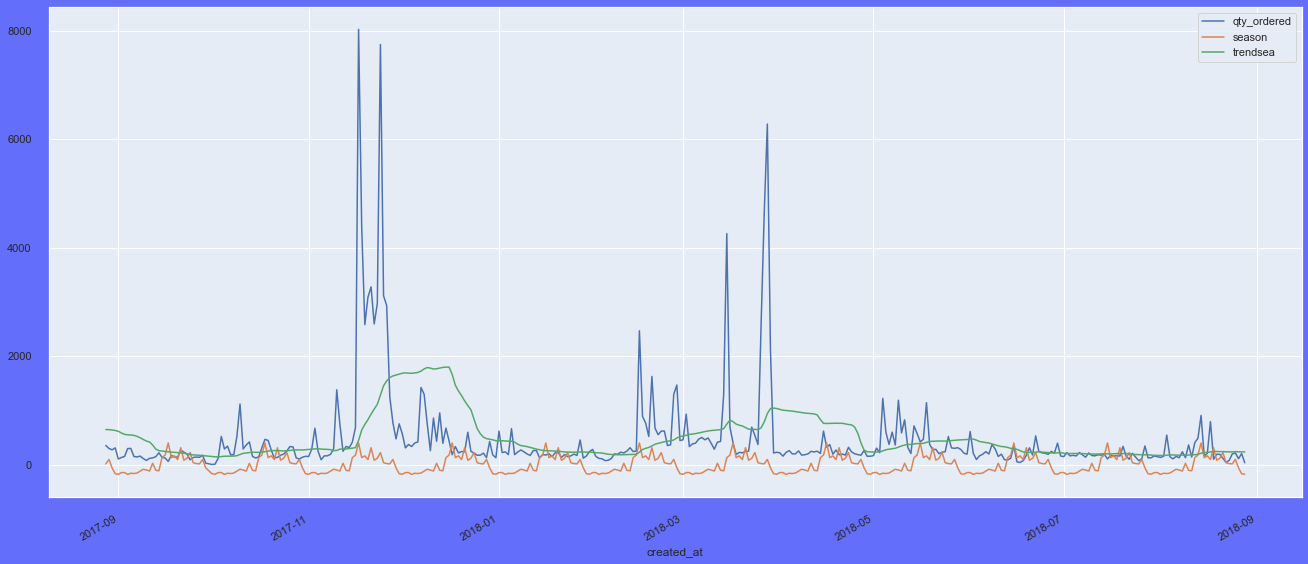

In [282]:
df_prev[-365:].plot(x= "created_at", y=['qty_ordered', "season", "trendsea"], figsize=(20,10)); #la projection sur une année

In [283]:
!pip install --upgrade --no-deps seasonal

None


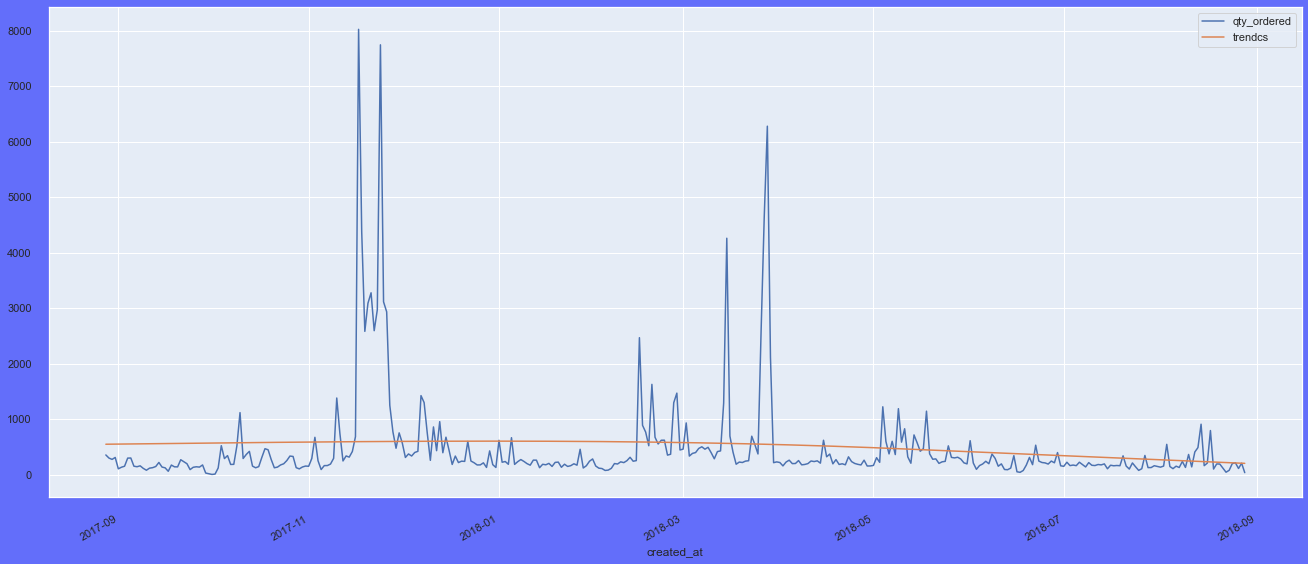

In [284]:
from seasonal import fit_seasons
cv_seasons, trend = fit_seasons(df_prev['qty_ordered'])    #Enlever la saisonnalité sans la connaître
print(cv_seasons)
df_prev["cs_seasons"] = cv_seasons
df_prev["trendcs"] = trend
df_prev[-365:].plot(x= "created_at", y=['qty_ordered', "cs_seasons", "trendcs"], figsize=(20,10));

In [285]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df_prev.qty_ordered)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -7.677054
p-value: 0.000000
Critical Values:
	1%: -3.439
	5%: -2.865
	10%: -2.569


In [286]:
df_prev['qty_ordered'] = np.log(df_prev.qty_ordered)

In [287]:
df_prev['qty_ordered']=df_prev['qty_ordered'].ewm(alpha=0.5).mean()

In [288]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df_prev.qty_ordered)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -4.185598
p-value: 0.000697
Critical Values:
	1%: -3.439
	5%: -2.865
	10%: -2.569



ADF statistics est -4.36 , p -value 0.000510 < 0.05 
on peut donc légitimement rejeter l'hypothèse H0 nous avons stationnarisé notre serie

In [289]:
df_prev.index = pd.date_range(start='2016-07-01',periods=788, freq='D')

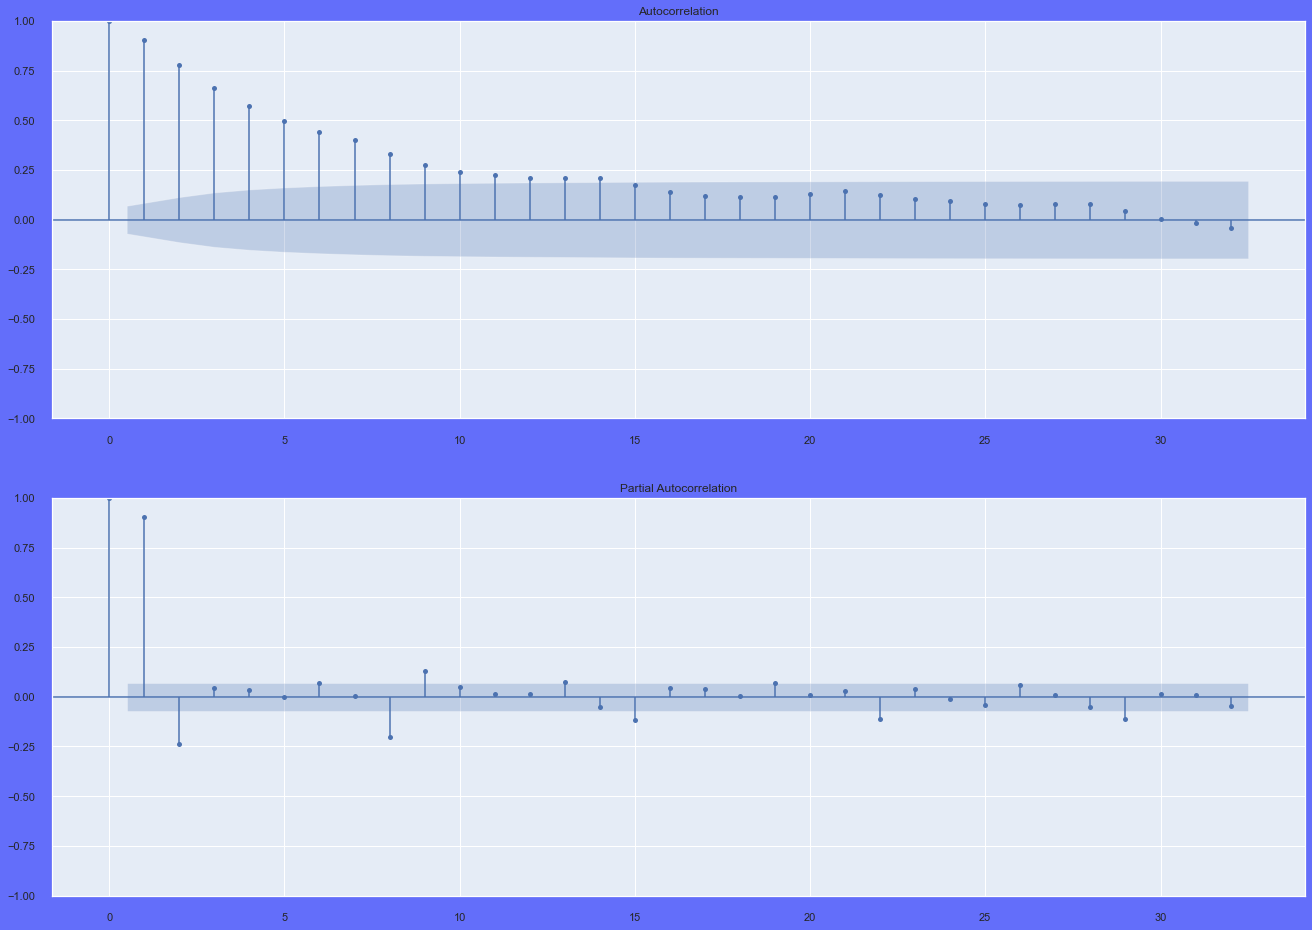

In [290]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig = plt.figure(figsize=(20,15))
ax1 = fig.add_subplot(211)
fig = plot_acf(df_prev['qty_ordered'], lags=32, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(df_prev['qty_ordered'], lags=32, ax=ax2);

Sans information, la meilleure prédiction est la valeur de la veille (où celle dans le passé à l’horizon de prédiction considéré). Dans notre cas, c’est simplement la variance de la série différenciée

In [291]:
# Installing pmdarima for auto arima
!pip install pmdarima


In [292]:
#Pour choisir les meilleurs p,q et d parameters pour ARIMA on va utiliser fonction  autorima 

import pmdarima as pm

ar_model = pm.auto_arima(df_prev.qty_ordered, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(ar_model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=316.333, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=4996.925, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.11 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=3936.316, Time=0.14 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=317.802, Time=0.40 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=317.277, Time=0.12 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=3131.348, Time=0.28 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.07 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=311.499, Time=0.64 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=296.805, Time=0.79 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=inf, Time=0.59 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=295.282, Time=0.75 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=inf, Time=0.70 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=262.429, Time=1.51 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=264.996, Time=1.70

In [293]:
!pip3 install statsmodels

In [294]:
# Aplication de model ARIMA 
from statsmodels.tsa.arima.model import ARIMA
ar_model = ARIMA(df_prev.qty_ordered, order=(3,0,3))
ar_model_fit = ar_model.fit()
print(ar_model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:            qty_ordered   No. Observations:                  788
Model:                 ARIMA(3, 0, 3)   Log Likelihood                -104.232
Date:                Wed, 14 Sep 2022   AIC                            224.463
Time:                        14:01:07   BIC                            261.819
Sample:                    07-01-2016   HQIC                           238.824
                         - 08-27-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.7715      0.114     50.567      0.000       5.548       5.995
ar.L1          0.4357      0.018     24.499      0.000       0.401       0.471
ar.L2         -0.5800      0.018    -31.967      0.0

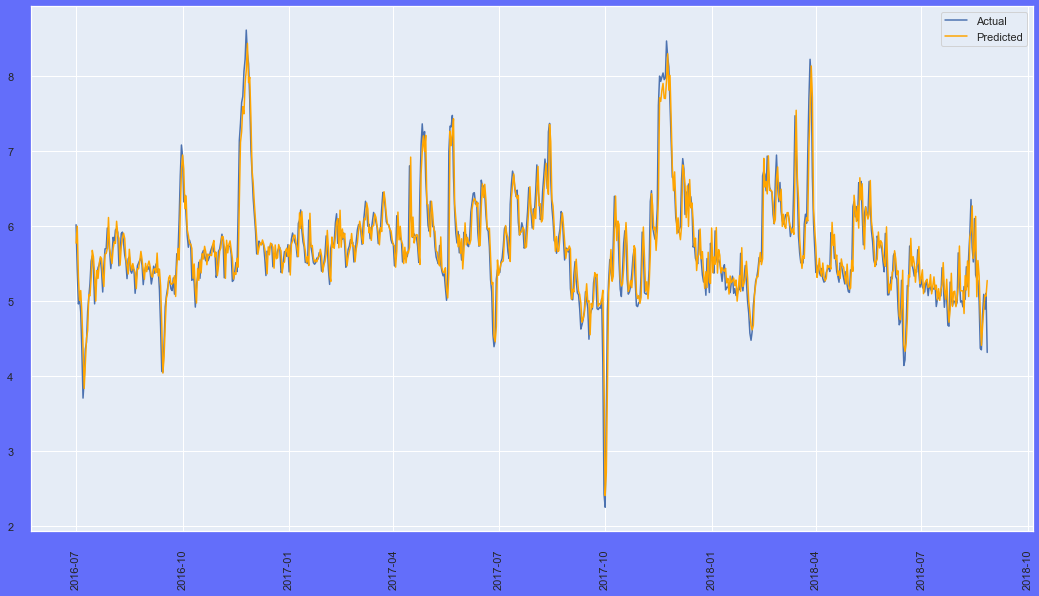

In [295]:
from math import sqrt
from sklearn.metrics import mean_squared_error
plt.rcParams["figure.figsize"] = [16,9]
plt.plot(df_prev.qty_ordered, color='b')
plt.plot(ar_model_fit.predict(dynamic=False),color='orange')
plt.legend(['Actual', 'Predicted'])
plt.xticks(rotation=90);


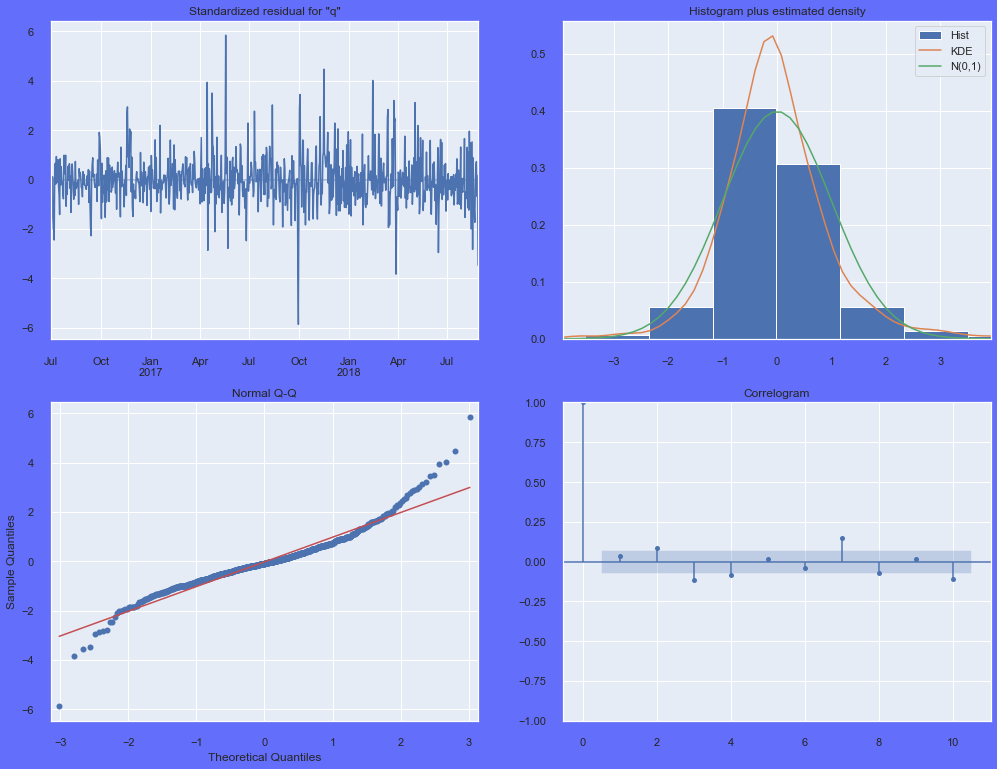

In [296]:
#verification des resultats
ar_model_fit.plot_diagnostics(figsize=(15, 12))
plt.show()

In [297]:
train_data = df_prev['qty_ordered'].iloc[:630]
test_data = df_prev['qty_ordered'].iloc[630:]

In [298]:
start = len(train_data)
end = len(train_data) + len(test_data) - 1
  
df_prev['ar_pred'] = ar_model_fit.predict(start, end,
                             typ = 'levels').rename("Predictions")
  


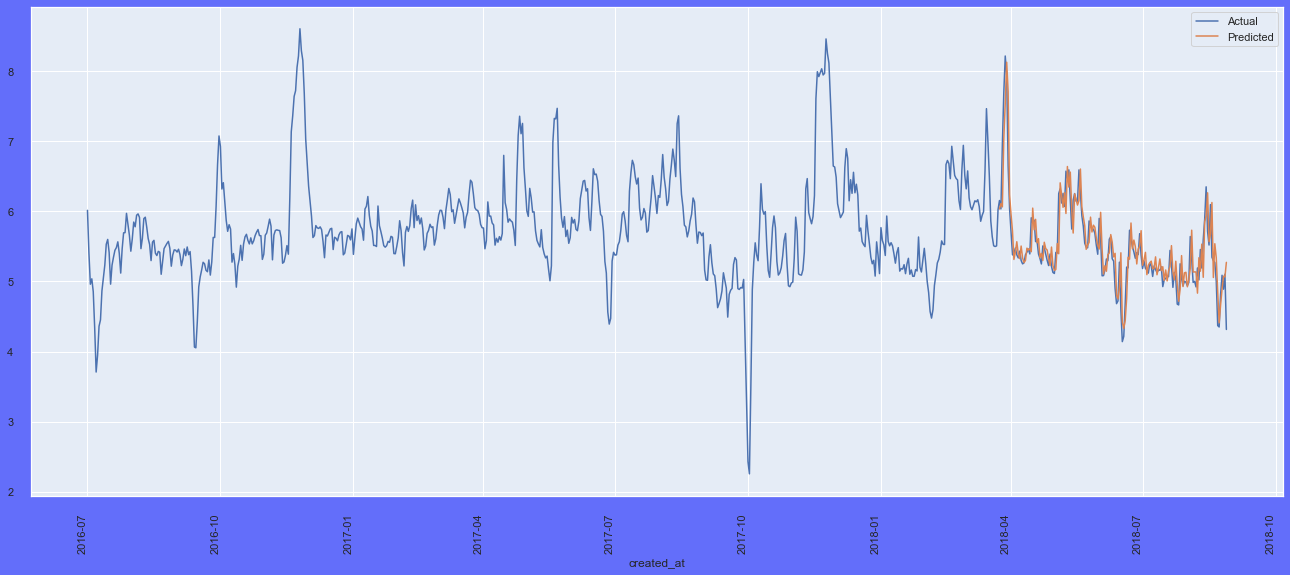

In [299]:
from math import sqrt
from sklearn.metrics import mean_squared_error
df_prev.plot(x= "created_at", y=['qty_ordered', "ar_pred"], figsize=(20,10));
plt.legend(['Actual', 'Predicted'])
plt.xticks(rotation=90);



NameError: name 'prediction' is not defined

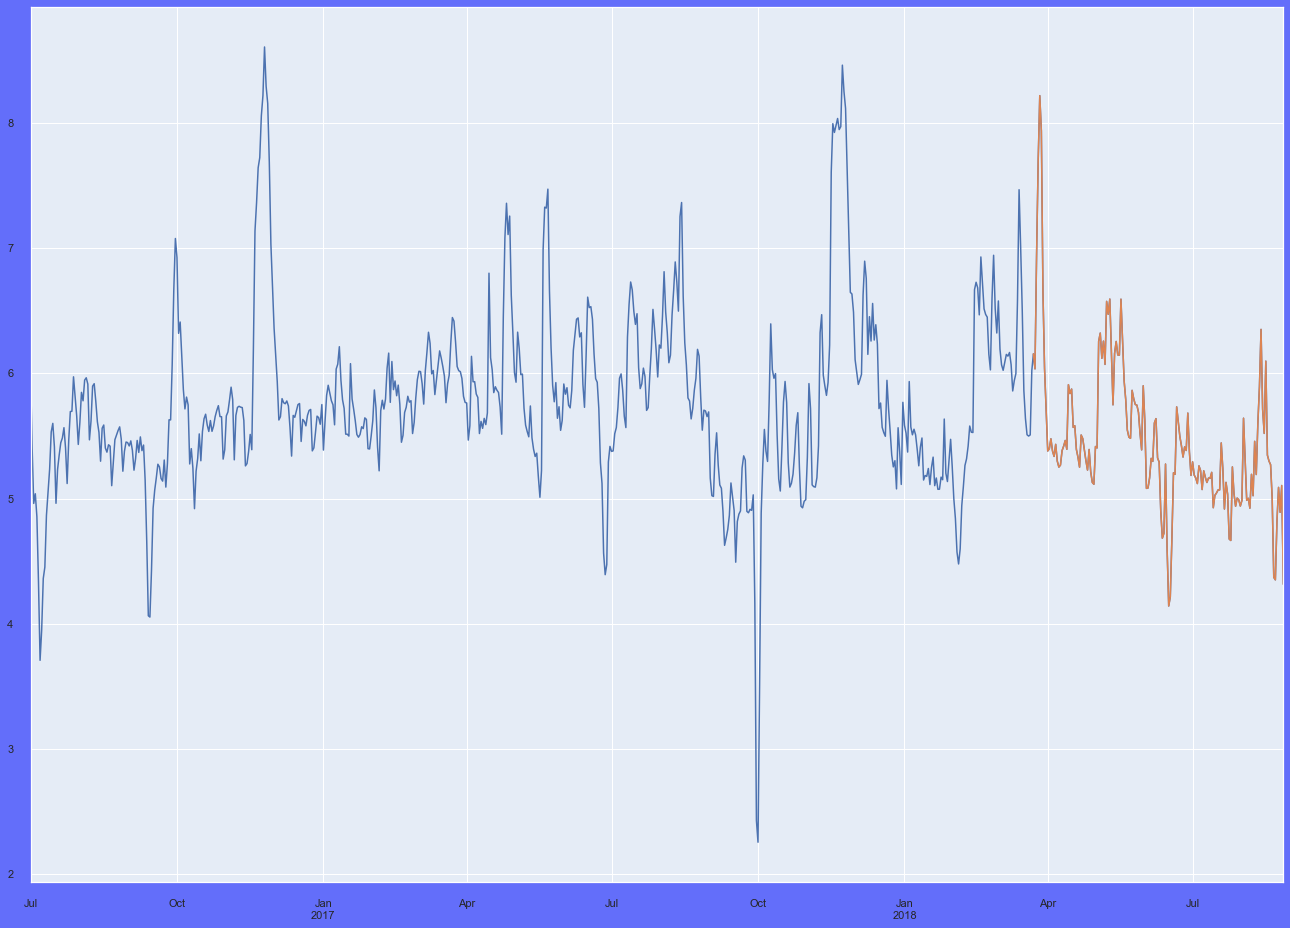

In [300]:
fig, ax = plt.subplots()
ax = df_prev.qty_ordered.plot(label='observed', figsize=(20, 15))

ax = test_data.plot(ax=ax) 
ax = prediction.plot(ax=ax) 

forecast = ar_model_fit.predict(start=end, end=end+157, dynamic=True)
forecast.plot(ax=ax) 

In [301]:
mean_absolute_error(test_data, forecast)

NameError: name 'forecast' is not defined

## SARIMA

In [302]:
import sys
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm

from sklearn.metrics import mean_absolute_error, mean_squared_error

import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
from scipy.optimize import minimize

In [303]:
df_gr = df_2['qty_ordered'].groupby(df_2['created_at']).agg('sum')

df_gr

created_at
2016-07-01    410.0
2016-07-02    165.0
2016-07-03    102.0
2016-07-04    165.0
2016-07-05    108.0
              ...  
2018-08-24    197.0
2018-08-25    213.0
2018-08-26    109.0
2018-08-27    204.0
2018-08-28     34.0
Name: qty_ordered, Length: 788, dtype: float64

In [304]:
df_prev2 = pd.DataFrame(list(df_gr.items()), columns=['created_at', 'qty_ordered'])
df_prev2['created_at'] = pd.to_datetime(df_prev2['created_at'])
df_prev2


created_at  qty_ordered
0   2016-07-01        410.0
1   2016-07-02        165.0
2   2016-07-03        102.0
3   2016-07-04        165.0
4   2016-07-05        108.0
..         ...          ...
783 2018-08-24        197.0
784 2018-08-25        213.0
785 2018-08-26        109.0
786 2018-08-27        204.0
787 2018-08-28         34.0

[788 rows x 2 columns]

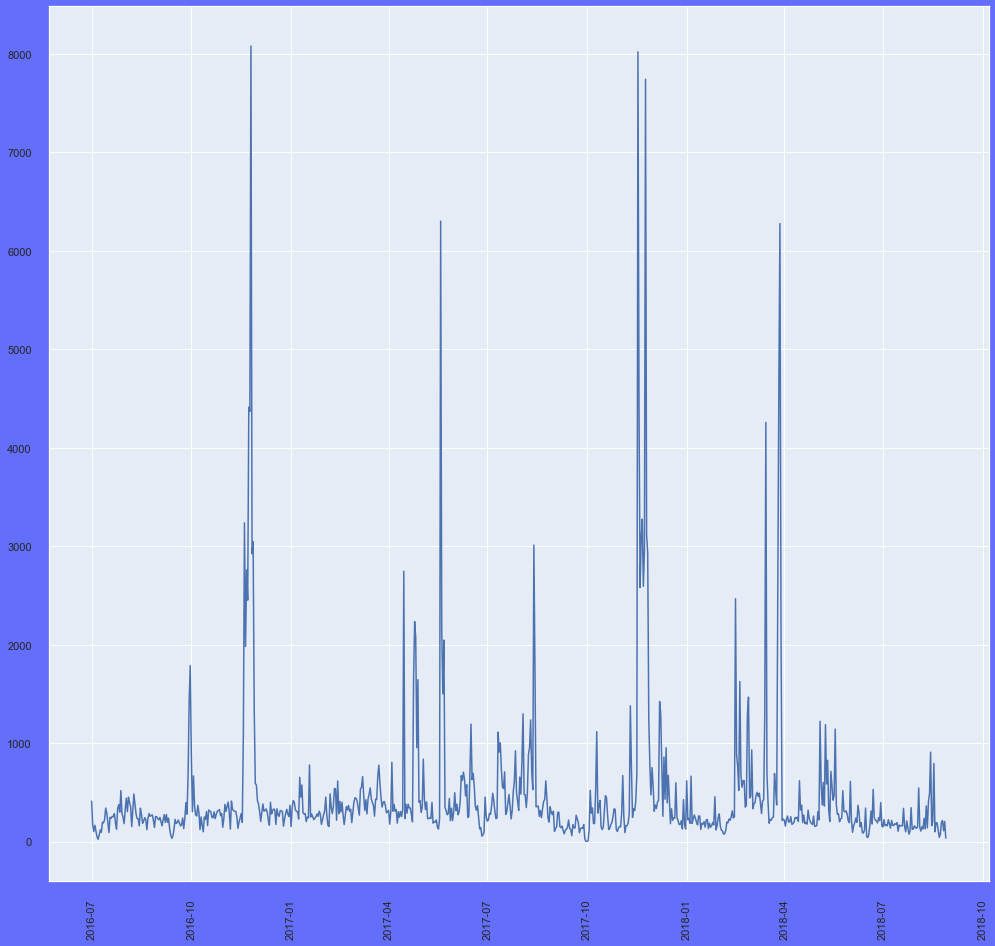

In [305]:
plt.figure(figsize=(15, 15))
df_prev2 = df_prev2.set_index('created_at').asfreq('D')
df_prev2 = df_prev2.fillna(method='bfill').fillna(method='ffill')
plt.plot(df_prev2)
plt.xticks(rotation=90);

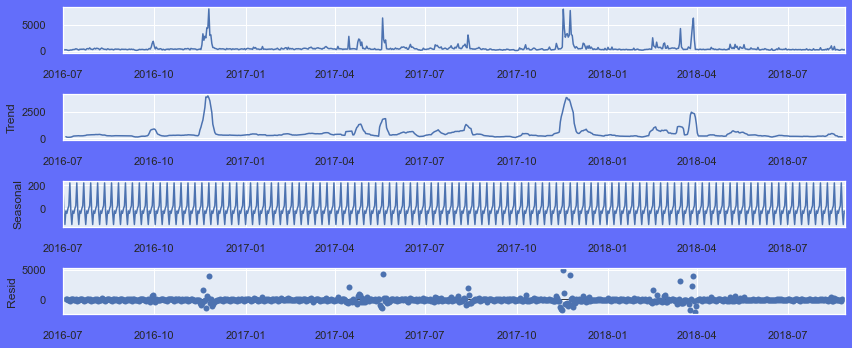

In [306]:
from statsmodels.tsa.seasonal import seasonal_decompose #La décomposition d'une série temporelle avec une modèle additif

result = seasonal_decompose(df_prev2, model = 'ad')

from pylab import rcParams
rcParams['figure.figsize'] = 12,5
result.plot()
plt.show();

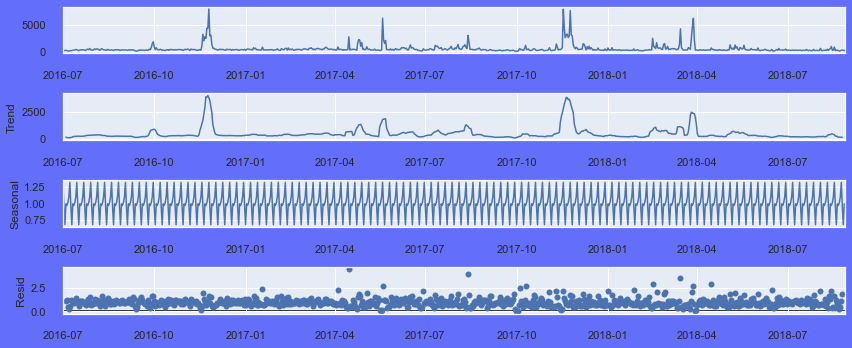

In [307]:
from statsmodels.tsa.seasonal import seasonal_decompose #La décomposition d'une série temporelle avec une modèle multiplicative

result = seasonal_decompose(df_prev2, model = 'multiplicative')

from pylab import rcParams
rcParams['figure.figsize'] = 12,5
result.plot()
plt.show();

In [308]:
df_gr_log = np.log(df_gr) #on transorme en log afin de nous ramener à un modèle additif

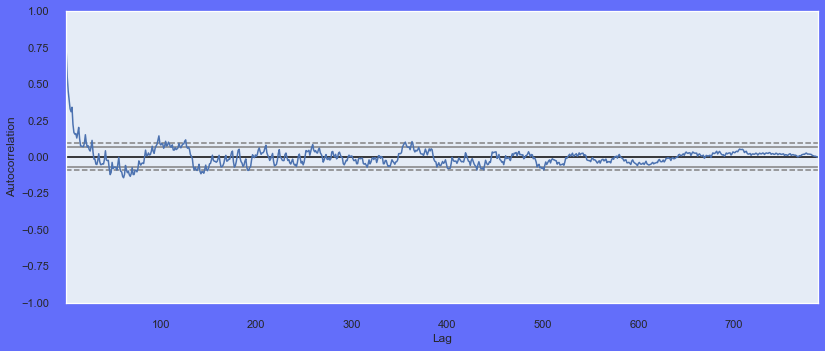

In [309]:
pd.plotting.autocorrelation_plot(df_gr_log); #stationnarisation  notre série temporelle, c'est-à-dire estimer les paramètres

L'autocorrélation simple semble tendre vers 0 mais présente des pics saisonniers importants

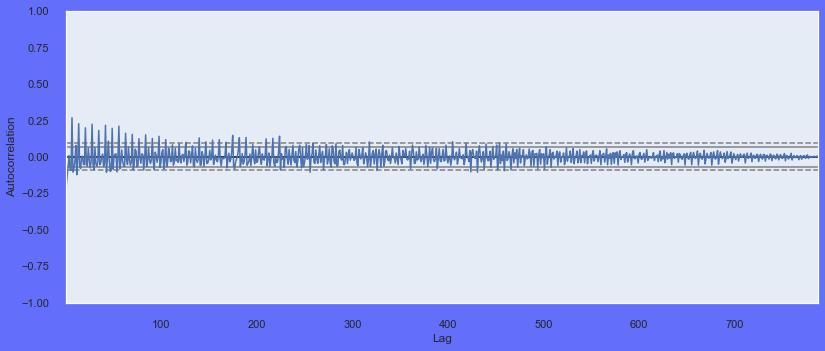

In [310]:
df_gr_log_1 = df_gr_log.diff().dropna()
pd.plotting.autocorrelation_plot(df_gr_log_1); #on applique donc une différenciation d'ordre 1 sur notre série temporelle afin de voir si cela nous permet de la stationnariser.

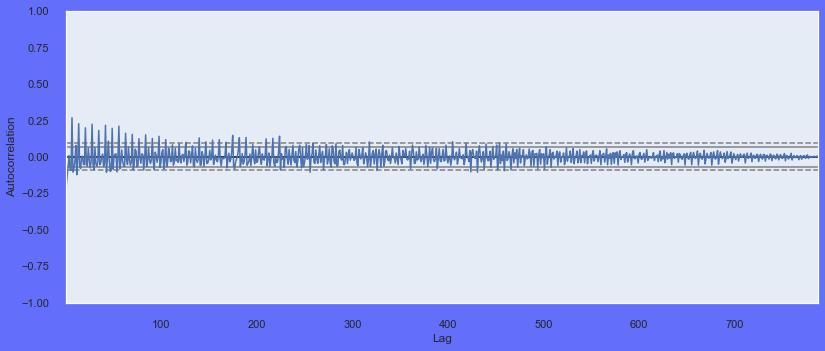

In [311]:
df_gr_log_2 = df_gr_log.diff(periods = 12).dropna() #on supposé que la série temporelle comportait une saisonnalité de période 12 et cette hypothèse semble se confirmer au vu de la fréquence des pics
pd.plotting.autocorrelation_plot(df_gr_log_1);

On arrive ici à un résultat assez satisfaisant malgré les quelques pics irréguliers, on peut dire que les valeurs décroissent suffisamment rapidement pour qu'on puisse considérer le processus comme probablement stationnaire. On peut donc considérer que l'on a ici un estimateur de l'autocorrélogramme simple de notre processus.

In [312]:
import statsmodels.api as sm
sm.tsa.stattools.adfuller(df_gr_log_2)

(-7.125817078149656,
 3.622753456691611e-10,
 21,
 754,
 {'1%': -3.439052522969989,
  '5%': -2.8653808299915013,
  '10%': -2.5688152592363274},
 1502.8792952608278)

point 1 : -7,179 valeur critique dans notre cas

point 2: 2.672 -10 p_value  < 0.05 H0 est rejetée et la série est stationnaire

Point 3 : 21: Nombre de  lags utilisé en regression  determine t-statistic. 

Point 4: 762: Les observations

Point 5: {'10%': -3.439052522969989, '1%': -2.5688152592363274, '5%': -2.8653808299915013}: T les valuers de adfuller test.

Les valeurs critiques -7.13 <-3.439,-2.569,-2.865 (t-values at 1%,5%and 10% confidence intervals), Donnné sont stationnaire

Also p-value of 2.051974201e-10 < 0.05 H0 est rejetée et la série est stationnaire

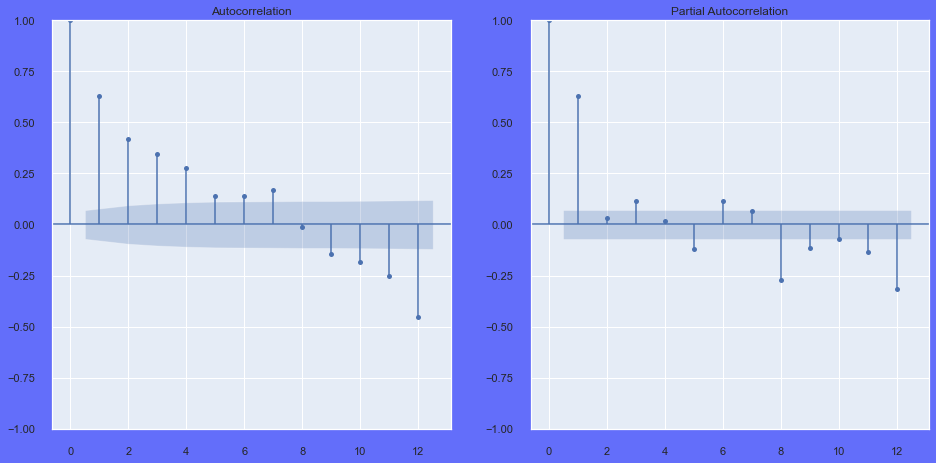

In [313]:
# Insérez votre code ici
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.figure(figsize= (14,7))
plt.subplot(121)
plot_acf(df_gr_log_2, lags = 12, ax=plt.gca())
plt.subplot(122)
plot_pacf(df_gr_log_2, lags = 12, ax=plt.gca())
plt.show()

In [314]:
!pip install pmdarima
import warnings 
warnings.filterwarnings('ignore')

In [315]:
from pmdarima import auto_arima
auto_arima(df_gr_log_2, seasonal=True, m=12, trace=True).summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=2.92 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=2311.214, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1634.453, Time=0.39 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=inf, Time=1.46 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=2309.220, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=1917.522, Time=0.20 sec
 ARIMA(1,0,0)(2,0,0)[12] intercept   : AIC=1570.017, Time=1.03 sec
 ARIMA(1,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=3.45 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=1.84 sec
 ARIMA(0,0,0)(2,0,0)[12] intercept   : AIC=2087.744, Time=0.47 sec
 ARIMA(2,0,0)(2,0,0)[12] intercept   : AIC=1567.801, Time=1.39 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=1635.791, Time=0.47 sec
 ARIMA(2,0,0)(2,0,1)[12] intercept   : AIC=inf, Time=4.87 sec
 ARIMA(2,0,0)(1,0,1)[12] intercept   : AIC=inf, Time=2.52 sec
 ARIMA(3,0,0)(2,0,0)[12] intercept   : AIC=1568.6

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  776
Model:             SARIMAX(2, 0, 1)x(2, 0, [], 12)   Log Likelihood                -774.972
Date:                             Wed, 14 Sep 2022   AIC                           1561.944
Time:                                     14:03:10   BIC                           1589.869
Sample:                                          0   HQIC                          1572.687
                                             - 776                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3650      0.158      8.643      0.000       1.055       1.674
ar.L2         -0.4252      0.120     -3.549      0.000      -0.660      -0.190
ma.L1         -0.7211      0.149     -4.835      0.000      -1.013      -0.429
ar.S.L12      -0.7430      0.030    -24.432      0.000      -0.803      -0.683
ar.S.L24      -0.3068      0.030    -10.110      0.000      -0.366      -0.247
sigma2         0.4273      0.016     27.124      0.000       0.396       0.458
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               161.07
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               1.84   Skew:                             0.27
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [316]:
sm_model=sm.tsa.SARIMAX(df_gr_log, order=(2,0,1),seasonal_order=(2,0,0,12))
results=sm_model.fit()
print(results.summary())

                                      SARIMAX Results                                      
Dep. Variable:                         qty_ordered   No. Observations:                  788
Model:             SARIMAX(2, 0, 1)x(2, 0, [], 12)   Log Likelihood                -677.802
Date:                             Wed, 14 Sep 2022   AIC                           1367.604
Time:                                     14:03:12   BIC                           1395.621
Sample:                                          0   HQIC                          1378.375
                                             - 788                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5783      0.042     37.458      0.000       1.496       1.661
ar.L2         -0.5790      

Cette fois-ci tous les paramètres semblent être significatifs dans le modèle, p -value sont < 0.05 on rejette donc l'hypothèse H0 le modèle est satisfaisante

In [317]:
pred = np.exp(results.predict(729, 787)) #pour comparer le resultat de prédiction on va predire dernier mois AOUT 2018
pred.index = df_gr_log.iloc[729:].index
pred

created_at
2018-07-01    155.174304
2018-07-02    151.701828
2018-07-03    212.293262
2018-07-04    144.299459
2018-07-05    179.960500
2018-07-06    158.186379
2018-07-07    200.482572
2018-07-08    178.263251
2018-07-09    149.113021
2018-07-10    184.351395
2018-07-11    152.106658
2018-07-12    176.409220
2018-07-13    183.361736
2018-07-14    170.515656
2018-07-15    185.196468
2018-07-16    126.256905
2018-07-17    162.521255
2018-07-18    152.432290
2018-07-19    162.560577
2018-07-20    160.987174
2018-07-21    256.123284
2018-07-22    158.863232
2018-07-23    119.213262
2018-07-24    181.418461
2018-07-25    143.805893
2018-07-26     93.735246
2018-07-27    119.993398
2018-07-28    247.676091
2018-07-29    131.327142
2018-07-30    132.167474
2018-07-31    151.660778
2018-08-01    131.095225
2018-08-02    144.792335
2018-08-03    153.501940
2018-08-04    332.326982
2018-08-05    153.952391
2018-08-06    127.269989
2018-08-07    148.584359
2018-08-08    115.568087
2018-08-09    

In [318]:
df_gr_pred = pd.concat([df_gr, pred])
df_gr_pred.iloc[760:]
df_gr_pred.iloc[787:]

created_at
2018-08-28     34.000000
2018-07-01    155.174304
2018-07-02    151.701828
2018-07-03    212.293262
2018-07-04    144.299459
2018-07-05    179.960500
2018-07-06    158.186379
2018-07-07    200.482572
2018-07-08    178.263251
2018-07-09    149.113021
2018-07-10    184.351395
2018-07-11    152.106658
2018-07-12    176.409220
2018-07-13    183.361736
2018-07-14    170.515656
2018-07-15    185.196468
2018-07-16    126.256905
2018-07-17    162.521255
2018-07-18    152.432290
2018-07-19    162.560577
2018-07-20    160.987174
2018-07-21    256.123284
2018-07-22    158.863232
2018-07-23    119.213262
2018-07-24    181.418461
2018-07-25    143.805893
2018-07-26     93.735246
2018-07-27    119.993398
2018-07-28    247.676091
2018-07-29    131.327142
2018-07-30    132.167474
2018-07-31    151.660778
2018-08-01    131.095225
2018-08-02    144.792335
2018-08-03    153.501940
2018-08-04    332.326982
2018-08-05    153.952391
2018-08-06    127.269989
2018-08-07    148.584359
2018-08-08    

In [319]:
df_gr_pred.shape

(847,)

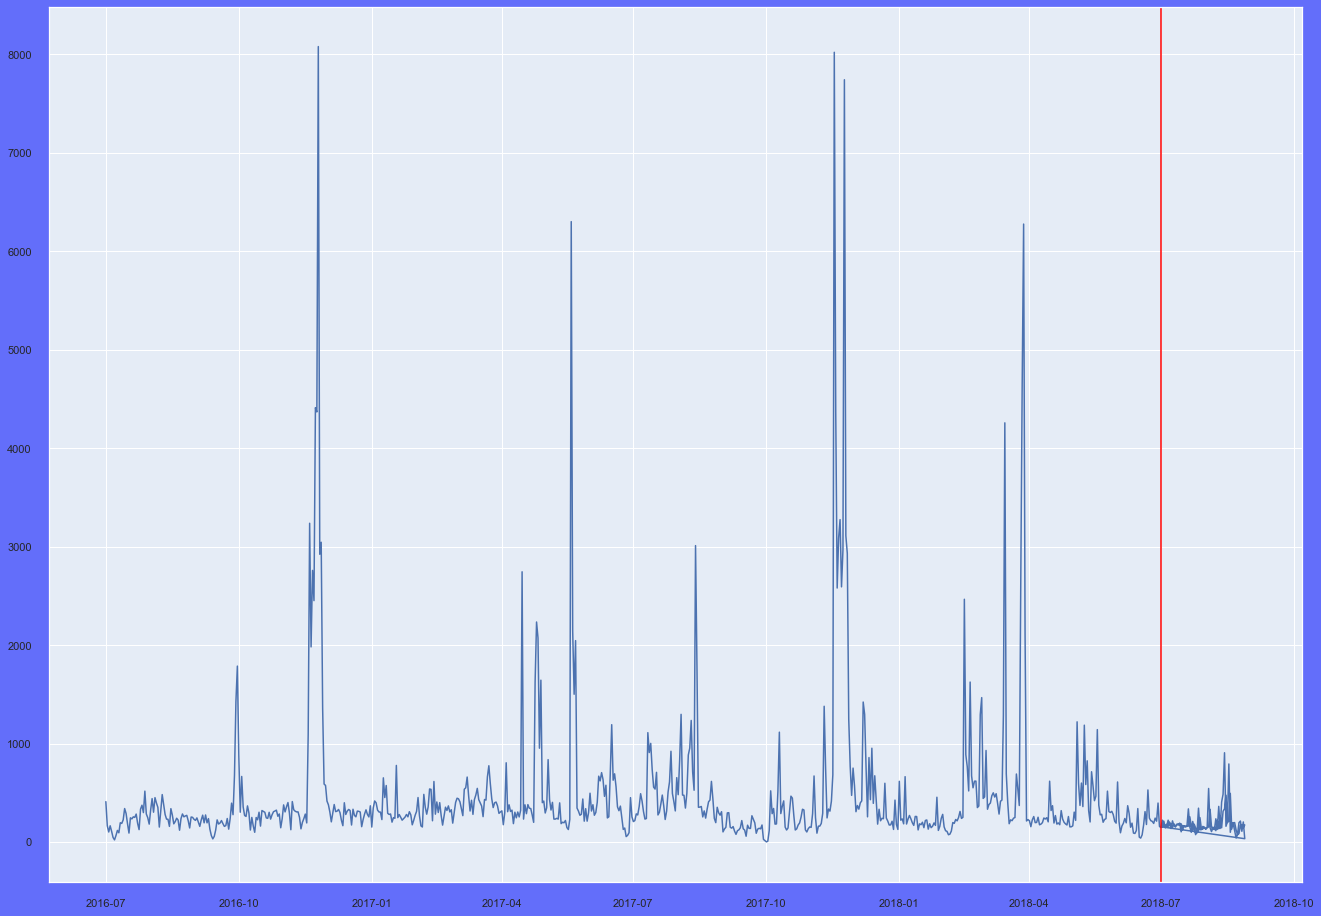

In [320]:
plt.figure(figsize=(20, 15))
plt.plot(df_gr_pred)
plt.axvline(x=pd.to_datetime('2018-07-01'), color='red');

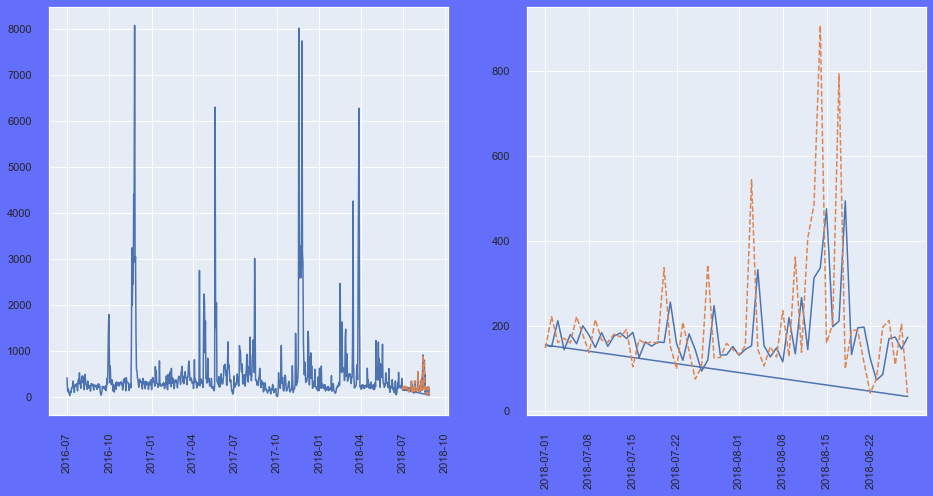

In [321]:
df_test = df_gr.iloc[729:] #les données réel

plt.figure(figsize= (14,7))
plt.subplot(121)
plt.plot(df_gr_pred);
plt.plot(df_test, '--')
plt.xticks(rotation=90);
plt.subplot(122)
plt.plot(df_gr_pred.iloc[787:]); #les resultats predit 
plt.plot(df_test, '--')
plt.xticks(rotation=90)
plt.show()

In [322]:
pred = df_gr_pred.iloc[788:847]
y_true, y_pred = np.array(df_test), np.array(pred)
MAPE = np.mean(np.abs((y_true - y_pred) / y_true))* 100
print("Mean Absolute Prediction Error : %0.2f%%"% MAPE)

Mean Absolute Prediction Error : 53.80%


In [323]:
df_gr_pred

created_at
2016-07-01    410.000000
2016-07-02    165.000000
2016-07-03    102.000000
2016-07-04    165.000000
2016-07-05    108.000000
                 ...    
2018-08-24     85.974312
2018-08-25    170.112327
2018-08-26    173.844305
2018-08-27    145.701023
2018-08-28    173.808235
Length: 847, dtype: float64

In [324]:
train_df = df_gr_log.iloc[:630]
test_df = df_gr_log.iloc[630:]

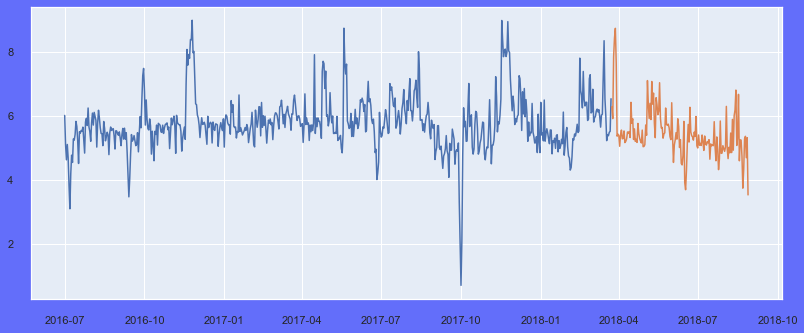

In [325]:
start = len(train_df)
end = len(train_df) + len(test_df) - 1
forecast = results.predict(start, end )
forecast = pd.DataFrame(forecast,index = test_df.index,columns=['Prediction'])
plt.plot(train_df, label='Train')
plt.plot(test_df, label='Test')
plt.plot(forecast, label='Prediction')
plt.show()

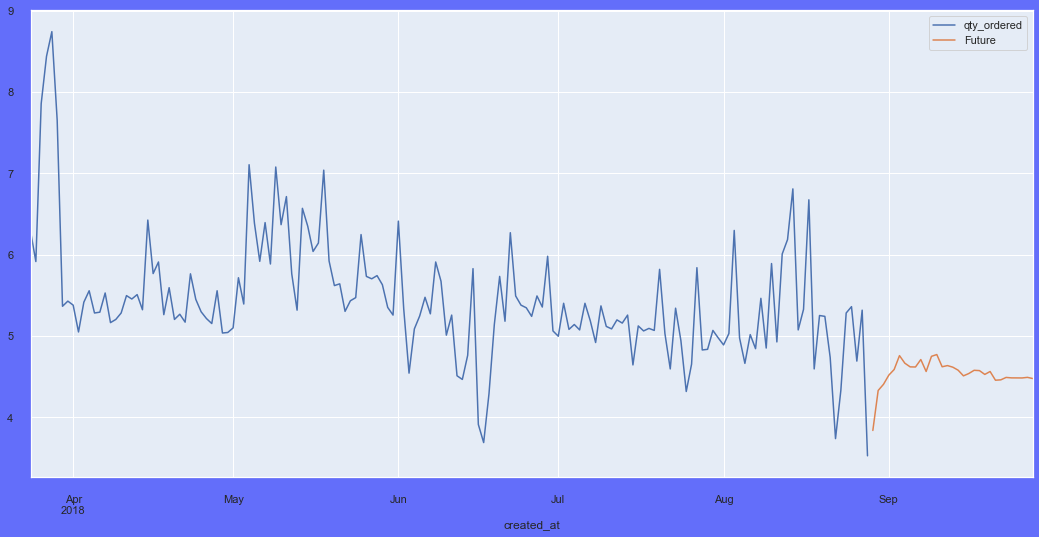

In [326]:
future = results.predict(len(df_gr_log), len(df_gr_log)+30, 
                    typ='levels').rename('Future')
test_df.plot(legend=True, figsize=(16,8))
future.index = pd.date_range(start='2018-08-29',periods=31, freq='D')
future.plot(legend=True);

# RFM Camille

## df_3

In [328]:
#création du df_3 avec les modifications de juillet 2022
# suppression des colonnes 
## item_id correspond à un ancien index
df_3=df_2.drop("item_id",1)
## sales_commission_code n'est pas exploitable
df_3=df_3.drop("sales_commission_code",1)
## bi status n'est pas exploitable
df_3=df_3.drop("bi_status",1)
##payment method ne sera pas exploité, trop de moyen de paiement
df_3=df_3.drop("payment_method",1)
## mv est identique à la colonne price
df_3=df_3.drop("mv",1)

#conversion en USD des prix avec un FX de 100
df_3.price                 =df_3.price/100
df_3.discount_amount       =df_3.discount_amount/100
df_3.total_price_wo_disc   =df_3.total_price_wo_disc/100
df_3.total_price_wt_disc   =df_3.total_price_wt_disc/100
#changement de l'ordre des colonnes par type d'information
df_3=df_3[[ 'created_at','FY', 'qty_ordered', 'sku', 'price','discount_amount',
           'total_price_wo_disc', 'total_price_wt_disc',
       'category_name', 'Customer Since', 'customer_id','increment_id','status']]
#gestion des outliners
## 3 facture ont un total supérieur à 100KUSD. cela ne correspond pas à une activité de B2C 
df_3=df_3[df_3.total_price_wt_disc<10000]
## certaines discount sont supérieur au prix total de la ligne, nous éliminons ces cas
df_3=df_3[df_3.total_price_wo_disc>df_3.discount_amount]
## afin de ne faire l'analyse que sur une année, nous ne retenons que FY18
df_3=df_3[df_3.FY=="FY18"]

KeyError: "['Customer Since'] not in index"

## rfm


In [ ]:
from datetime import timedelta
orders = df_3.groupby(['increment_id', 'created_at', 'customer_id']).agg({'total_price_wt_disc': lambda x: x.sum()}).reset_index()
orders.rename({'increment_id':"InvoiceNo", 
       'created_at':"InvoiceDate",
       'customer_id':"CustomerID", 
       'total_price_wt_disc':"Price"},axis=1,inplace=True)
NOW = orders['InvoiceDate'].max() + timedelta(days=1)
NOW
period = 365
orders['DaysSinceOrder'] = orders['InvoiceDate'].apply(lambda x: (NOW - x).days)
aggr = {
    'DaysSinceOrder': lambda x: x.min(),  # the number of days since last order (Recency)
    'InvoiceDate': lambda x: len([d for d in x if d >= NOW - timedelta(days=period)]), # the total number of orders in the last period (Frequency)
}
rfm = orders.groupby('CustomerID').agg(aggr).reset_index()
rfm.rename(columns={'DaysSinceOrder': 'Recency', 'InvoiceDate': 'Frequency'}, inplace=True)
rfm['Monetary'] = rfm['CustomerID'].apply(lambda x: orders[(orders['CustomerID'] == x) & \
                                                           (orders['InvoiceDate'] >= NOW - timedelta(days=period))]\
                                                           ['Price'].sum())
rfm=rfm.set_index('CustomerID')
rfm.head()

Recency  Frequency  Monetary
CustomerID                              
0.0             108          1   1.60000
4.0             129         14  29.76665
15.0            173          4   0.32330
16.0            327          3   1.10910
20.0              5          7  24.31410

In [ ]:
# filtrage des outliners
# les clients qui depenses plus de 10000 USD sont éliminés, ils osnt trop peu nombreux
rfm=rfm[rfm.Monetary<10000]
# les cients qui ont une fréquence supérieur à 100 sont peu nombreux
rfm=rfm[rfm.Frequency<100]
quintiles = rfm[['Recency', 'Frequency', 'Monetary']].quantile([.2, .4, .6, .8]).to_dict()


def r_score(x):
    if x <= quintiles['Recency'][.2]:
        return 5
    elif x <= quintiles['Recency'][.4]:
        return 4
    elif x <= quintiles['Recency'][.6]:
        return 3
    elif x <= quintiles['Recency'][.8]:
        return 2
    else:
        return 1

def fm_score(x, c):
    if x <= quintiles[c][.2]:
        return 1
    elif x <= quintiles[c][.4]:
        return 2
    elif x <= quintiles[c][.6]:
        return 3
    elif x <= quintiles[c][.8]:
        return 4
    else:
        return 5    
rfm['R'] = rfm['Recency'].apply(lambda x: r_score(x))
rfm['F'] = rfm['Frequency'].apply(lambda x: fm_score(x, 'Frequency'))
rfm['M'] = rfm['Monetary'].apply(lambda x: fm_score(x, 'Monetary'))

rfm['RFM Score'] = rfm['R'].map(str) + rfm['F'].map(str) + rfm['M'].map(str)

segt_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at risk',
    r'[1-2]5': 'can\'t loose',
    r'3[1-2]': 'about to sleep',
    r'33': 'need attention',
    r'[3-4][4-5]': 'loyal customers',
    r'41': 'promising',
    r'51': 'new customers',
    r'[4-5][2-3]': 'potential loyalists',
    r'5[4-5]': 'champions'
}

rfm['Segment'] = rfm['R'].map(str) + rfm['F'].map(str)
rfm['Segment'] = rfm['Segment'].replace(segt_map, regex=True)
rfm.head()



Recency  Frequency  Monetary  R  F  M RFM Score          Segment
CustomerID                                                                  
0.0             108          1   1.60000  4  1  4       414        promising
4.0             129         14  29.76665  4  5  5       455  loyal customers
15.0            173          4   0.32330  3  5  3       353  loyal customers
16.0            327          3   1.10910  1  5  4       154      can't loose
20.0              5          7  24.31410  5  5  5       555        champions

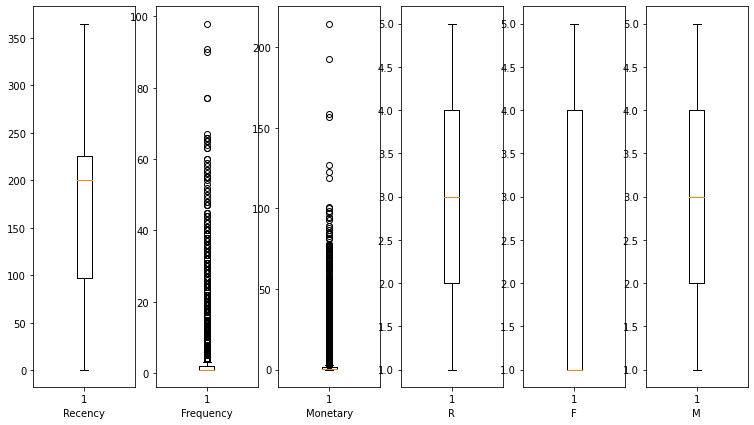

In [ ]:
fig=plt.figure(figsize=(15,7))
for index,column in enumerate(rfm.select_dtypes("number").columns):
    plt.subplot(1,7,(index+1))
    plt.boxplot(rfm[column]) 
    plt.xlabel(column)

In [ ]:
sns.countplot(y=rfm.Segment)

# K Means

In [327]:
# comme les graphiques le montrent, nous devons d'abord faire une standardisation des données
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
Z=pd.DataFrame(scaler.fit_transform(rfm[["Recency","Frequency","Monetary"]]),columns=["Recency","Frequency","Monetary"])


NameError: name 'rfm' is not defined

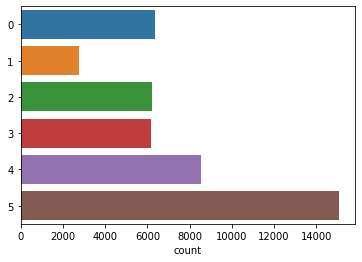

In [ ]:
# puis nous appliquons l'K means avec un nombre de cluster 
#égal à celui trouvé par la méthode du dessu
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 6)
kmeans.fit(Z)

# Centroids and labels
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
sns.countplot(y=labels)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

Text(0.5, 1.0, 'Méthode Guillaume Martin')

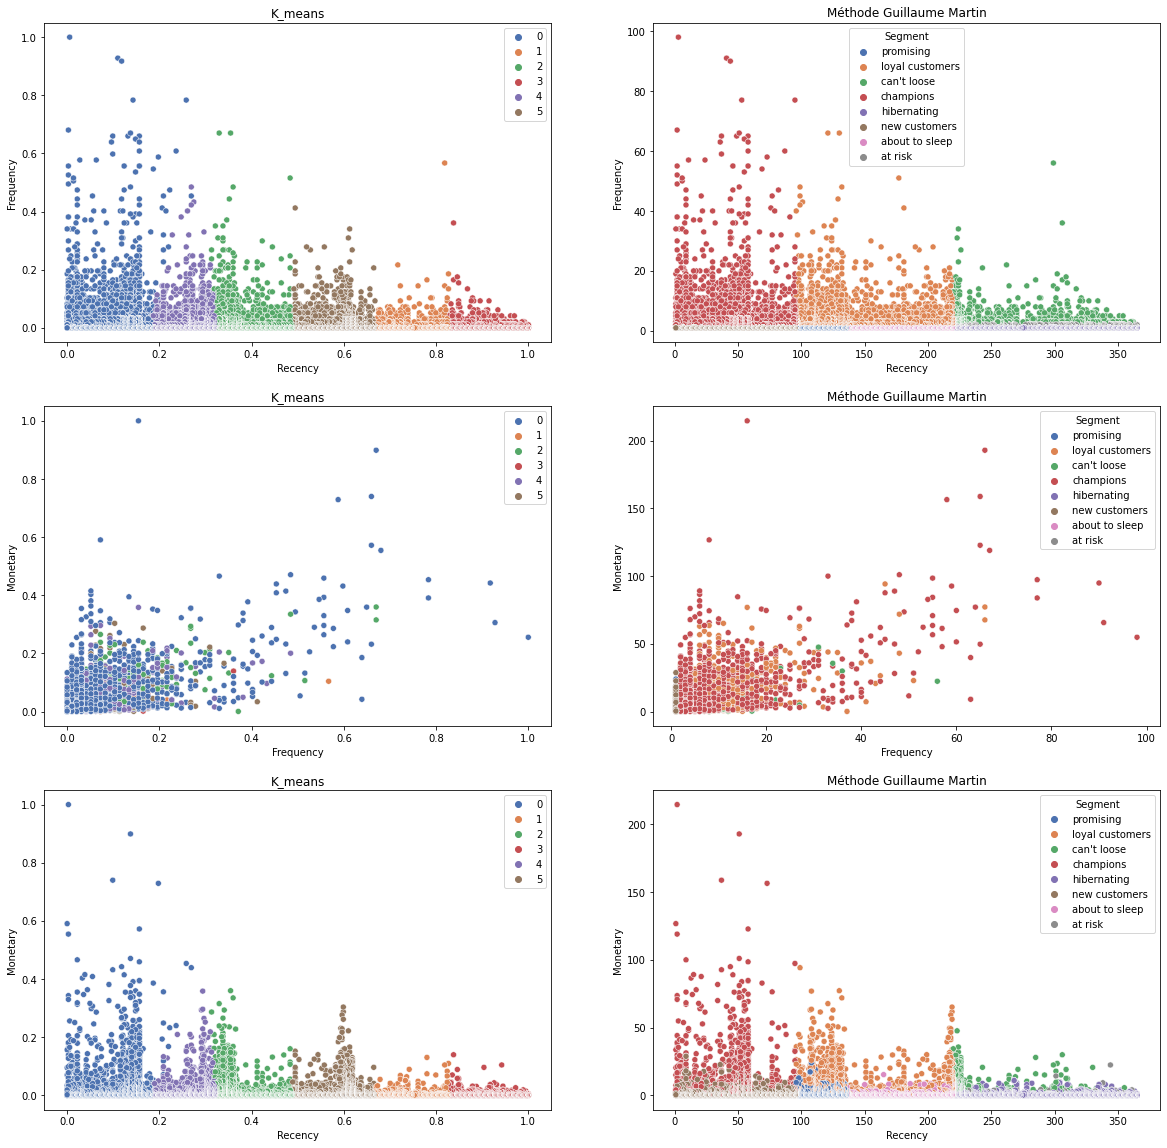

In [ ]:
# Nous comparons les résultats de K-means et celui de la méthode
#création d'une figure avec la méthode classe objet
fig=plt.figure(figsize=(20,20))
#Analyse par Recence et fréquence
ax1=fig.add_subplot(321)
sns.scatterplot(Z.Recency,Z.Frequency, hue=labels, palette="deep",ax=ax1)
ax1.set_title("K_means")
ax2=fig.add_subplot(322)
sns.scatterplot(rfm.Recency,rfm.Frequency, hue=rfm.Segment, palette="deep",ax=ax2)
ax2.set_title("Méthode Guillaume Martin")
#Analyse par Fréquence et Monnaie
ax3=fig.add_subplot(323)
sns.scatterplot(Z.Frequency,Z.Monetary, hue=labels, palette="deep",ax=ax3)
ax3.set_title("K_means")
ax4=fig.add_subplot(324)
sns.scatterplot(rfm.Frequency,rfm.Monetary, hue=rfm.Segment, palette="deep",ax=ax4)
ax4.set_title("Méthode Guillaume Martin")
#Analyse par  Monnaie et Recence;
ax5=fig.add_subplot(325)
sns.scatterplot(Z.Recency,Z.Monetary, hue=labels, palette="deep",ax=ax5)
ax5.set_title("K_means")
ax6=fig.add_subplot(326)
sns.scatterplot(rfm.Recency,rfm.Monetary, hue=rfm.Segment, palette="deep",ax=ax6)
ax6.set_title("Méthode Guillaume Martin")


In [5]:
df.to_csv('new_data_ecommerce.csv')

NameError: name 'df' is not defined